<a href="https://colab.research.google.com/github/tuhinat/wine-quality-classification-n-regression/blob/main/Tomar_Tuhina_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROJECT JUPYTER NOTEBOOK**
## **Abstract:** Two datasets are included in the set. One related to red vinho verde wine samples and one to white vinho verde wine samples, originally from the north of Portugal. The goal is to model wine quality based on physicochemical tests, instead of retail price or region. 

**Data Driven Engineering I**

**Institute of Thermal Turbomachinery (ITS)**

**Karlsruhe Institute of Technology**

**Tuhina Tomar**

**Matr.-Nr.: 1521166**

**E-Mail: upcwq@student.kit.edu**


**Overview of the Dataset:**

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more information, refer to: [Cortez et al., 2009](http://www3.dsi.uminho.pt/pcortez/wine/)

Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.)


The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones, which we shall see later in the project work displayed as well).


**Feature Set Information:**

Input variables (based on physicochemical tests): 

1.  fixed acidity -- primary fixed acids found in wine are tartaric, succinic, citric, and malic. 
2.  volatile acidity -- the gaseous acids present in wine.
3.  citric acid -- the weak organic acid found in citrus fruits naturally.
4.  residual sugar -- amount of sugar left after fermentation.
5.  chlorides --  amount of salt present in wine.
6.  free sulfur dioxide -- used for prevention of wine by oxidation and microbial spoilage.
7.  total sulfur dioxide - the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine.
8.  density -- the mass per unit volume of wine.
9.  pH -- used for checking acidity.
10. sulphates -- preserve freshness and protect wine from oxidation, and bacteria.
11. alcohol -- percent of alcohol present in wine.

Output / Target variable (based on sensory data): 
12.  quality (score between 0 and 10)

# **THE PROBLEM DEFINITION**

Relatively small dataset with relatively low dimensionality. The problem I shall be tackling is two-fold. 
1. Outlier Detection and Normalisation
2. Using a concatenated set to create a larger set of red and white wines where red to do a classification. 
3. Using a simple linear regression method to predict the quality of both white and red wines while doing a real time comparison of feature influence. 
It would be at the end interesting to note if the features that influence classification the most are also the same ones that influence regression-based prediction of quality. 


### **METRICS OF SUCCESS**

RMSE for reg problem, Accuracy Score, Recall, Precission for Classification Problem
### **EVALUATION METHOD**
For classification, loss, accuracy, recall, f1 score, precision
K-fold cross validation scores 



## **Preparing the enviroment**

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 3.12 ms (started: 2022-04-07 09:10:28 +00:00)


In [2]:
#Importing the necessary libraries
import math
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

time: 1.25 s (started: 2022-04-07 09:10:33 +00:00)


In [3]:
# Data Preparation and Scoring
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

time: 635 ms (started: 2022-04-07 09:10:34 +00:00)


In [4]:
# ML Algorithms to be used
import tensorflow as tf
from tensorflow import keras
from keras import optimizers, models, layers, regularizers
tf.__version__

'2.8.0'

time: 2.65 s (started: 2022-04-07 09:10:35 +00:00)


## **Pre-processing**

Loading datasets and creating custom datasets for our classification problem. The way I go about it is to first load the datasets from the the UCI website. 
Since, the number of entries in the red wine dataset is lower than the number of entries in the white wine dataset, I select the same size of sample as the red wine dataset from the white wine dataset. Then, I concatenate the two dataframes to create a new dataframe with an extra column added to the dataframe which stands for the type of wine -- r for red and w for white. 




In [5]:
# Load the data into Colab.
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
names = ['fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol', 'quality', 'type']
wine_r = pd.read_csv(url_red, sep=';')
type_r = ['r'] * 1599
wine_r['type'] = type_r
wine_r.head()
wine_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB
time: 533 ms (started: 2022-04-07 09:10:38 +00:00)


In [6]:
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
names = ['fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol', 'quality', 'type']
wine_w = pd.read_csv(url_white, sep=';')
type_w = ['w'] * 4898 # white wine dataset is 4898 values and is a larger set than red wine
wine_w['type'] = type_w
wine_w.head()
wine_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB
time: 562 ms (started: 2022-04-07 09:10:38 +00:00)


In [7]:
# Concatenating the two data sets for classification between red and wine non-zero values
data = pd.concat([wine_r, wine_w],ignore_index=True) #we don't care about preserving the values of the dataFrame index and want them to be unique values, so we set ignore_index=True.
data.head(3198)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
3193            7.0              0.29         0.49             3.8      0.047   
3194            6.4              0.27         0.49             7.3      0.046   
3195            6.6              0.55         0.01             2.7      0.034   
3196            6.4              0.27         0.49             7.3      0.046   
3197            6.3              0.24         0.74             1.4      0.172   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0   0.9978  3.51       0.56   
1                    25.0                  67.0   0.9968  3.20       0.68   
2                    15.0                  54.0   0.9970  3.26       0.65   
3                    17.0                  60.0   0.9980  3.16       0.58   
4                    11.0                  34.0   0.9978  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
3193                 37.0                 136.0   0.9938  2.95       0.40   
3194                 53.0                 206.0   0.9956  3.24       0.43   
3195                 56.0                 122.0   0.9906  3.15       0.30   
3196                 53.0                 206.0   0.9956  3.24       0.43   
3197                 24.0                 108.0   0.9932  3.27       0.39   

      alcohol  quality type  
0         9.4        5    r  
1         9.8        5    r  
2         9.8        5    r  
3         9.8        6    r  
4         9.4        5    r  
...       ...      ...  ...  
3193      9.4        6    w  
3194      9.2        6    w  
3195     11.9        5    w  
3196      9.2        6    w  
3197      9.9        6    w  

[3198 rows x 13 columns]

time: 31.7 ms (started: 2022-04-07 09:10:39 +00:00)


In [8]:
#Sneak Peak into the new concatenated dataset with a new column "Type" with markers 'r' for red wine and 'w' for white wine
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

time: 70.8 ms (started: 2022-04-07 09:10:39 +00:00)


**Data Visualisation with a pairplot:**

We notice that **'quality'** feature has a linear relationship with every other feature in the feature list:

**'fixed acidity',  'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',  'density', 'pH', 'sulphates',  'alcohol'**

Also, something to notice is the continuous probability density curve of the values each of the features can take. 'Chlorides', 'residual sugar' or 'sulphates' have non-normalised distributions, likely due to the presence of outliers in the dataset. We will undertake that later in this project.

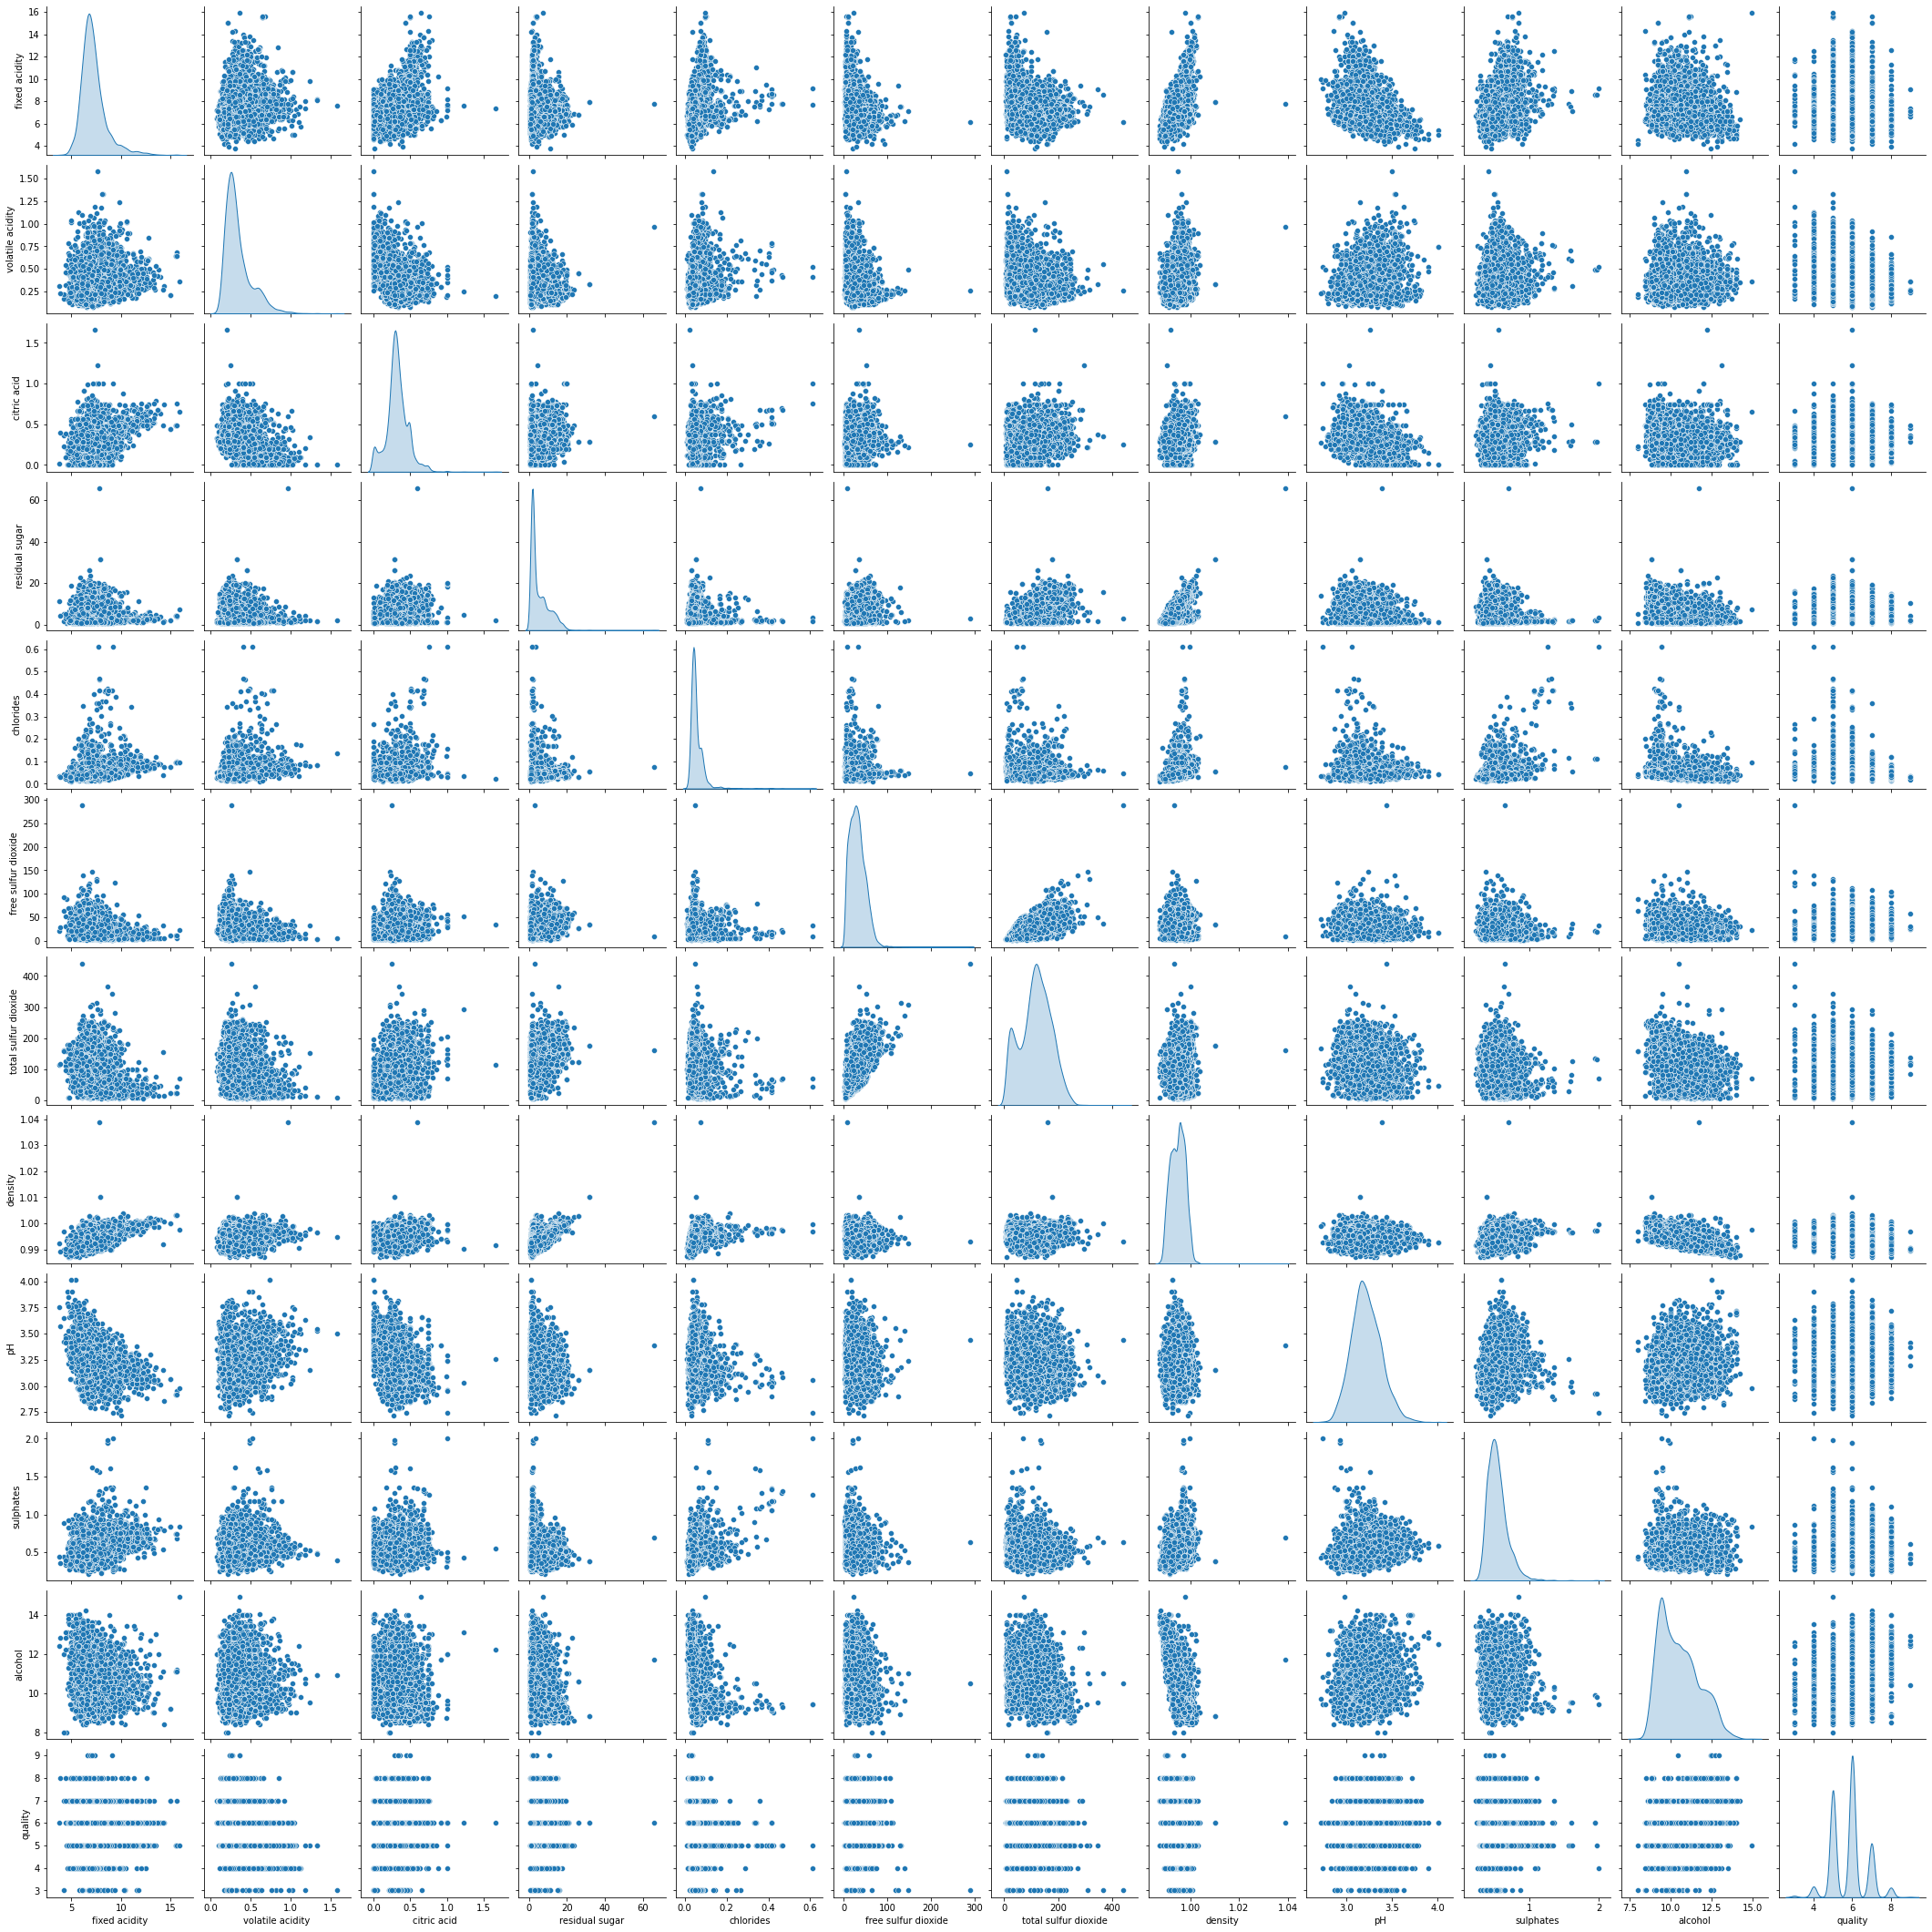

time: 1min 35s (started: 2022-04-07 09:10:39 +00:00)


In [9]:
sns.pairplot(data[['fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol', 'quality', 'type']],diag_kind='kde')
sns.set(rc={'figure.figsize':(8,6)})

**Creating the Feature Matrix and Labels**

In [10]:
data.columns
dataX = data.copy().drop(['type'],axis=1)
dataX.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB
time: 18.8 ms (started: 2022-04-07 09:12:14 +00:00)


In [11]:
dataY = data['type'].copy()
dataY.head()

0    r
1    r
2    r
3    r
4    r
Name: type, dtype: object

time: 8.52 ms (started: 2022-04-07 09:12:14 +00:00)


In [12]:
#We check for non numerical values for the feature matrix only
nanCounter = np.isnan(dataX).sum()
print(nanCounter)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
time: 9.75 ms (started: 2022-04-07 09:12:14 +00:00)


In [13]:
#Checking for the unique values of each variable in the dataset
distinctCounter = data.apply(lambda x: len(x.unique()))
print(distinctCounter)

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
type                      2
dtype: int64
time: 16.2 ms (started: 2022-04-07 09:12:14 +00:00)


Interesting observation here is that:
1. There are no non-numerical values in the dataset and is simple labelled, numerical but unbalanced dataset. 

2. Among quality values between 0 and 10, there are only 7 unique quality values
available.

**Data Normalization**

Here, we rescale the data, take a look at the outliers and create new outlier-free dataframes. 

In [14]:
#Rescaling the data
featuresToScale = dataX.columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])
#Looking into the statistics again:
dataX.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   6.497000e+03      6.497000e+03  6.497000e+03    6.497000e+03   
mean    1.007471e-15      1.002225e-15 -1.753083e-16   -1.693547e-15   
std     1.000077e+00      1.000077e+00  1.000077e+00    1.000077e+00   
min    -2.634589e+00     -1.577330e+00 -2.192833e+00   -1.018034e+00   
25%    -6.289329e-01     -6.661613e-01 -4.723335e-01   -7.657978e-01   
50%    -1.660892e-01     -3.016939e-01 -5.941375e-02   -5.135612e-01   
75%     3.738951e-01      3.664962e-01  4.911459e-01    5.584445e-01   
max     6.699425e+00      7.534354e+00  9.231281e+00    1.268682e+01   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  6.497000e+03         6.497000e+03          6.497000e+03  6.497000e+03   
mean   2.863647e-16         1.009232e-15         -9.658103e-16 -4.469840e-15   
std    1.000077e+00         1.000077e+00          1.000077e+00  1.000077e+00   
min   -1.342639e+00        -1.663583e+00         -1.941780e+00 -2.530192e+00   
25%   -5.147986e-01        -7.620742e-01         -6.855323e-01 -7.859527e-01   
50%   -2.578826e-01        -8.594301e-02          3.990667e-02  6.448888e-02   
75%    2.559494e-01         5.901882e-01          7.122647e-01  7.648525e-01   
max    1.584219e+01         1.456357e+01          5.737257e+00  1.476879e+01   

                 pH     sulphates       alcohol       quality  
count  6.497000e+03  6.497000e+03  6.497000e+03  6.497000e+03  
mean   3.086803e-15  3.102883e-16  1.538147e-15  6.444958e-16  
std    1.000077e+00  1.000077e+00  1.000077e+00  1.000077e+00  
min   -3.100615e+00 -2.091935e+00 -2.089350e+00 -3.227687e+00  
25%   -6.748622e-01 -6.805919e-01 -8.316152e-01 -9.372296e-01  
50%   -5.287424e-02 -1.429373e-01 -1.608231e-01  2.079990e-01  
75%    6.313125e-01  4.619241e-01  6.776670e-01  2.079990e-01  
max    4.923029e+00  9.870879e+00  3.696231e+00  3.643685e+00

time: 108 ms (started: 2022-04-07 09:12:14 +00:00)


## **1. Outlier Exploration, Dataframe Creation without Outliers, and Normalisation**



In [15]:
#Normality Check 
from scipy import stats
def is_normal(x, threshhold = 0.05):
    k2,p = stats.normaltest(x)
    print(p)
    print(p > threshhold)
    print('\n')
    return p > threshhold

for name in list(dataX):
    is_normal(np.array(dataX[name]))

0.0
False


0.0
False


2.6841653491253483e-128
False


0.0
False


0.0
False


0.0
False


4.211103135341336e-13
False


3.398816644368203e-245
False


1.947508707995735e-39
False


0.0
False


1.9599603929034486e-98
False


1.1606148581926138e-11
False


time: 55.1 ms (started: 2022-04-07 09:12:14 +00:00)


None of the features even after standardisation were in a normal distribution. to visualize the distributions in the dataset and to see the outliers

A little about p-value and our rationale for outlier considerations:

A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true, i.e., the feature value with the highest probability density. The lower the p-value, the greater the statistical significance of the observed difference. A p-value of 0.05 or lower is generally considered statistically significant. 

**The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.**



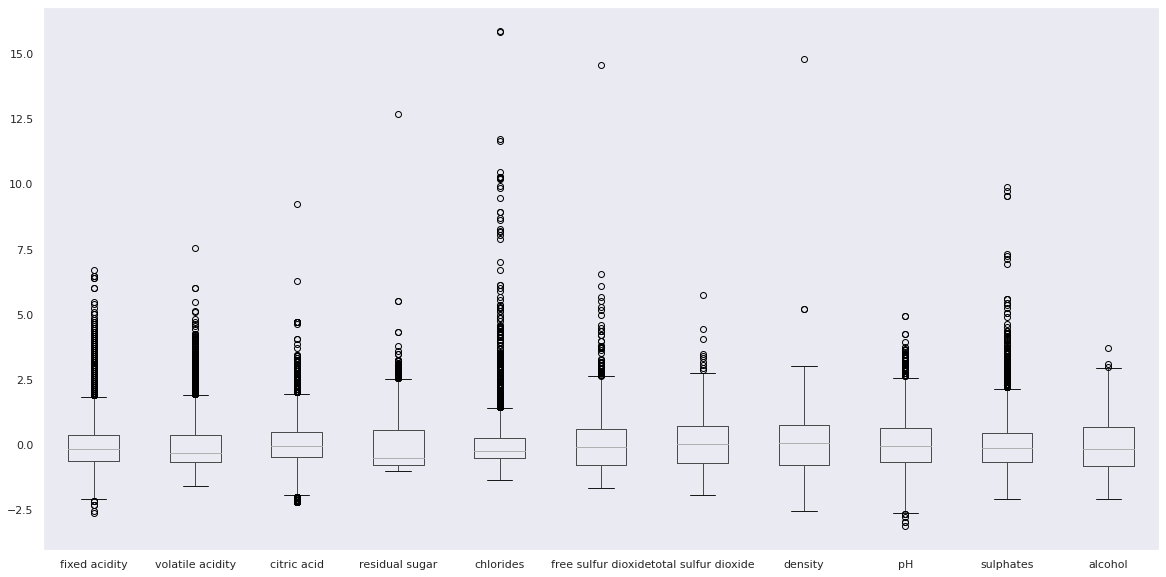

time: 645 ms (started: 2022-04-07 09:12:14 +00:00)


In [16]:
fig = plt.figure(figsize = (20,10))
dataX.boxplot(column=[name for name in list(dataX.drop(columns = ['quality']))], grid=False)

Clearly see many outlier values for every single feature!

In [17]:
def fit_and_plot(name, dist, data):
    upper_bound = len(data)
    params = dist.fit(data) #return (mean, std) tuple
    arg = params[:-2] #The skewness reduces as the value of alpha increases. (for gamma distribution)
    #gamma is class of continuous distributions
    loc = params[0]
    scale = params[1]
    x = np.linspace(min(data), max(data))
    _, ax = plt.subplots(figsize=(15, 10))
    plt.scatter(data, np.linspace(1, 10, upper_bound))
    ax2 = ax.twinx() # instantiate a second axes that shares the same x-axis
    plt.plot(x, dist.pdf(x, loc=0, scale=1), '-', color = "r")
    plt.show()
    print(name)
    print('mean = ' + str(loc), 'std = ' + str(scale))
    print('\n')
    return dist, loc, scale

time: 14 ms (started: 2022-04-07 09:12:15 +00:00)


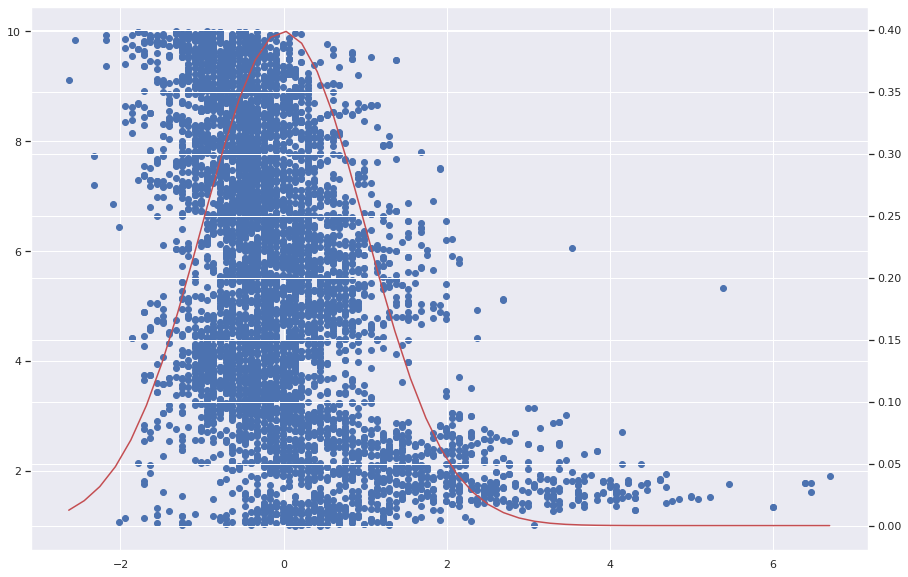

fixed acidity
mean = -3.8496389562498884e-16 std = 1.0




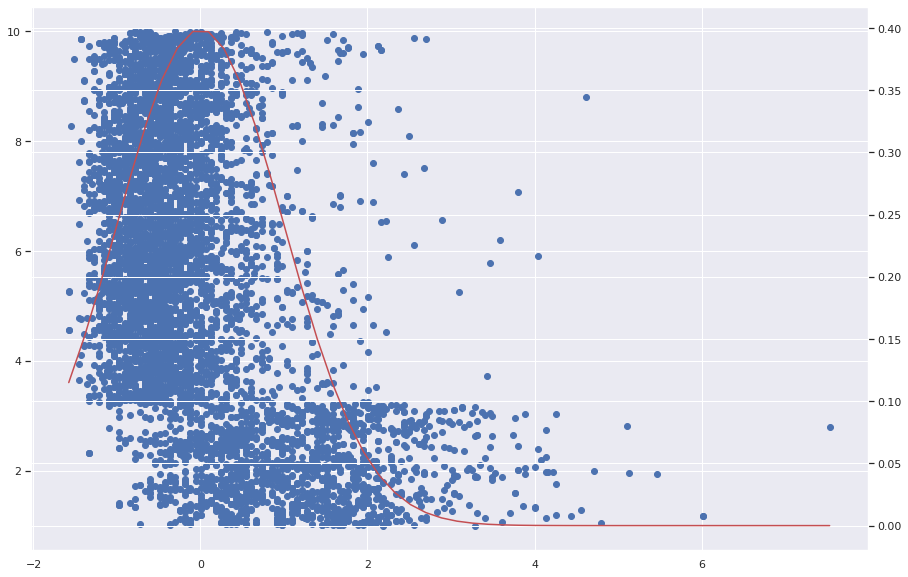

volatile acidity
mean = 1.049901533522697e-16 std = 0.9999999999999999




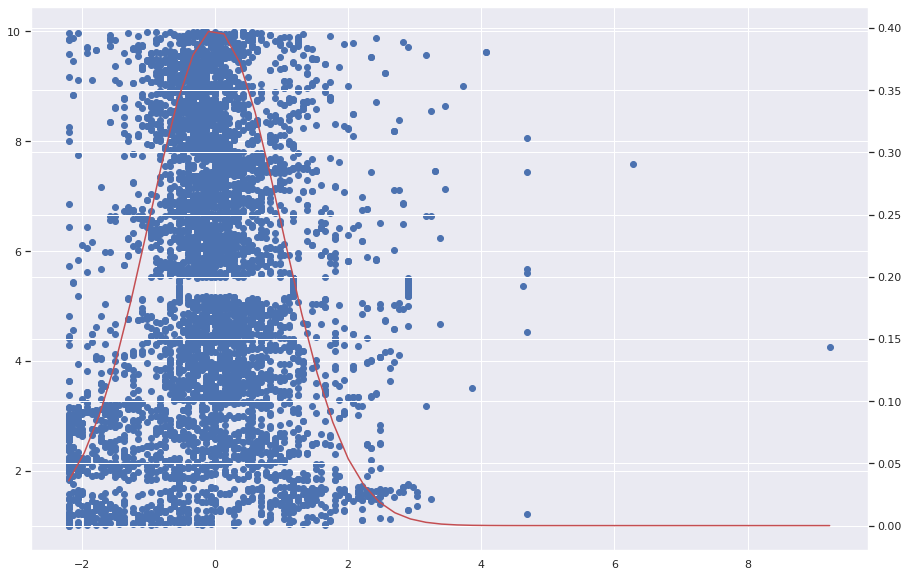

citric acid
mean = 2.1872948615056185e-17 std = 1.0




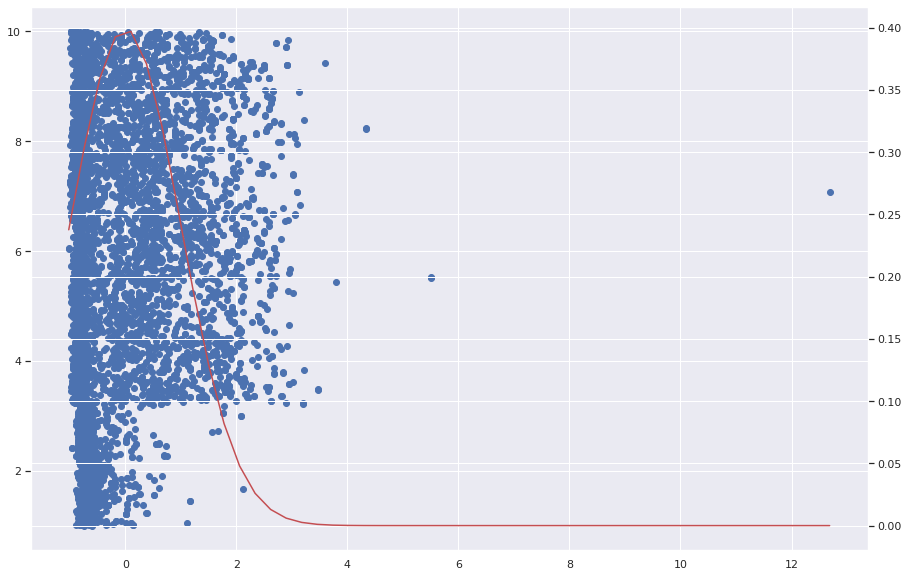

residual sugar
mean = 3.4996717784089897e-17 std = 1.0




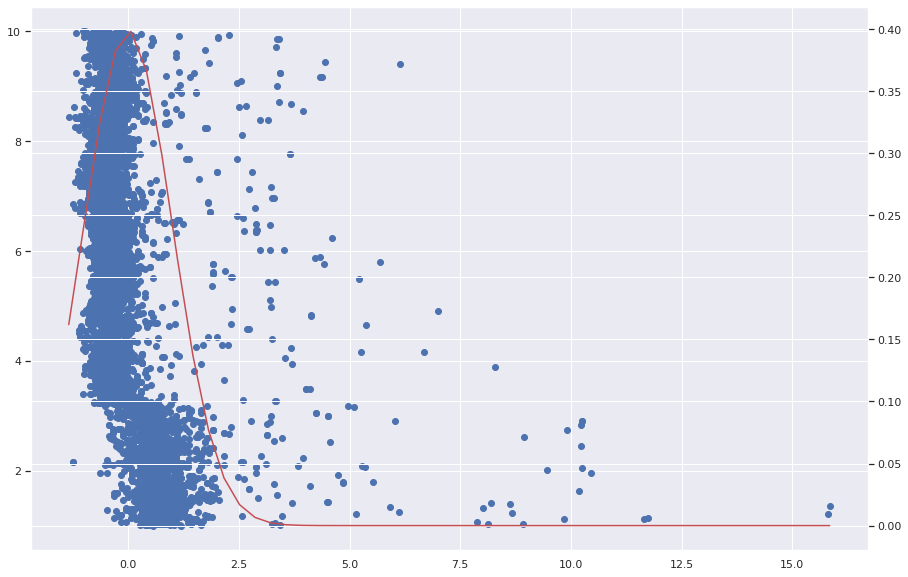

chlorides
mean = 1.7498358892044948e-17 std = 1.0000000000000002




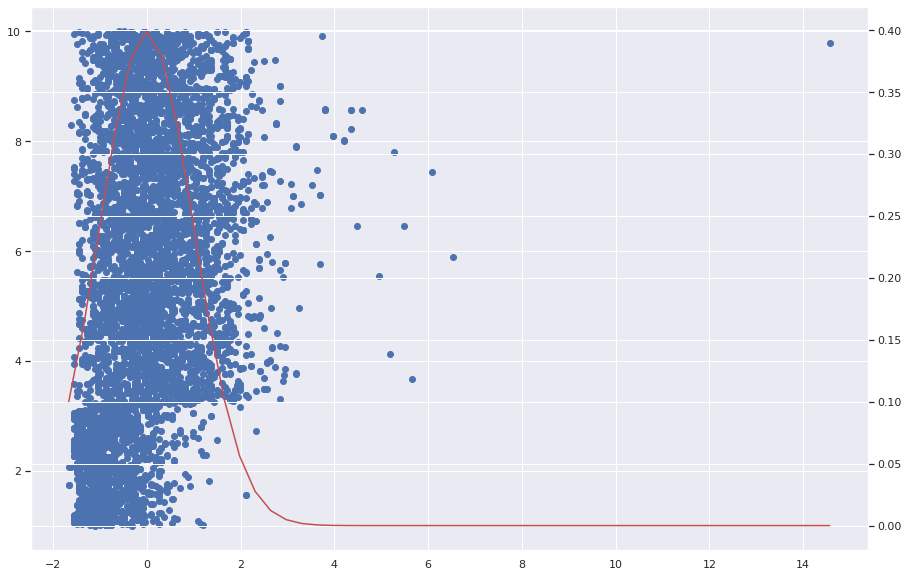

free sulfur dioxide
mean = -8.749179446022474e-17 std = 1.0




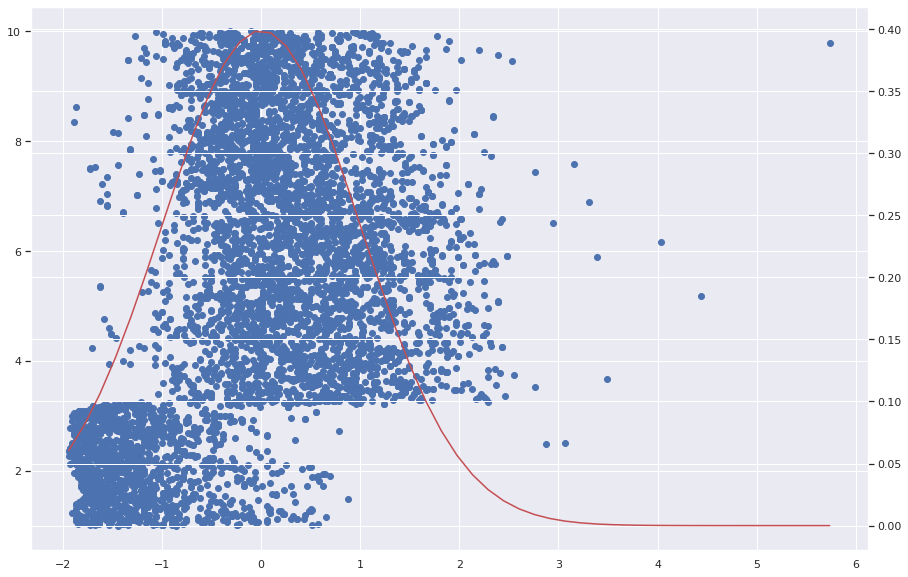

total sulfur dioxide
mean = -6.999343556817979e-17 std = 1.0




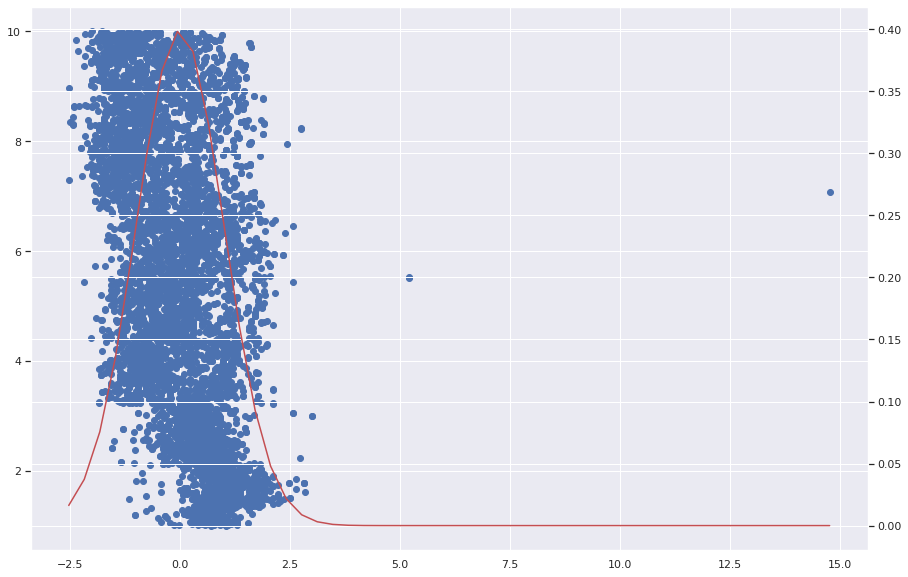

density
mean = -3.5521668550851245e-15 std = 1.0




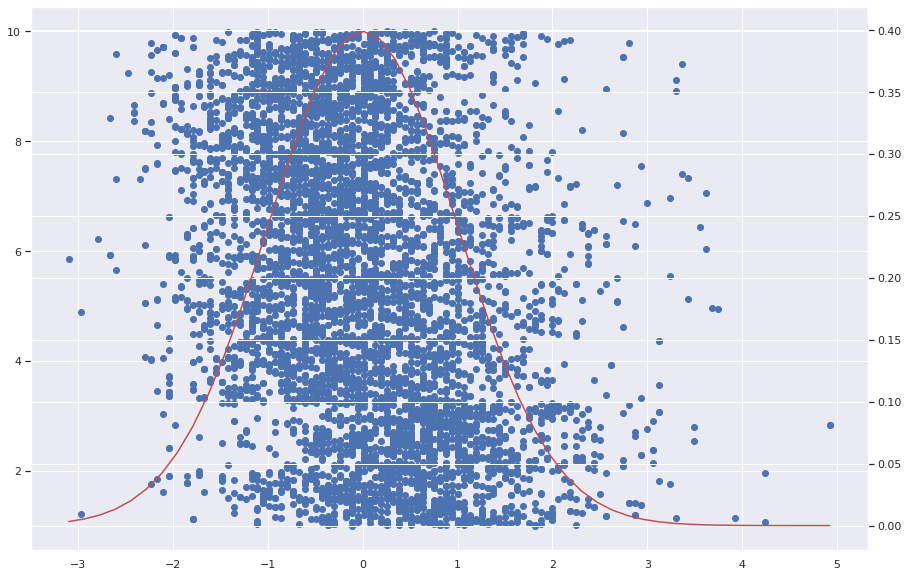

pH
mean = 2.729743987159012e-15 std = 1.0




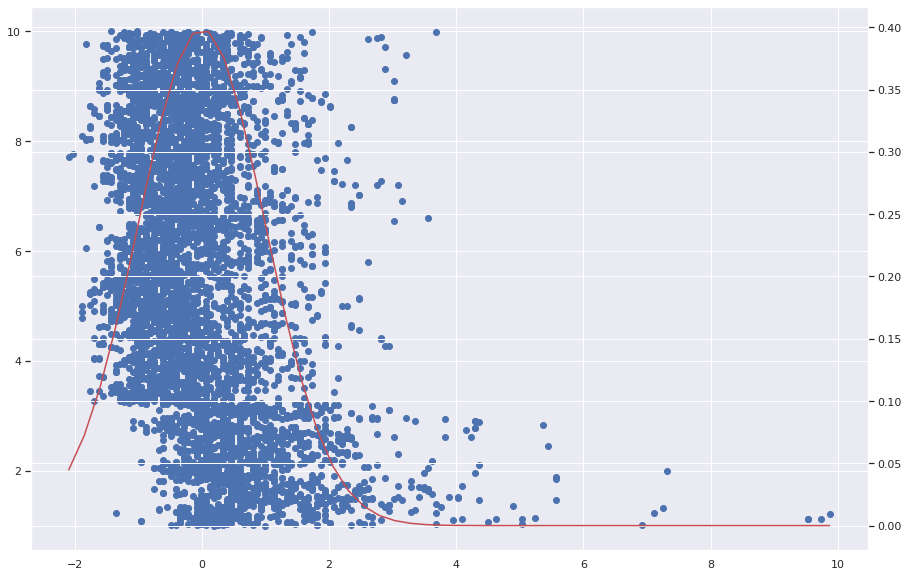

sulphates
mean = -5.424491256533934e-16 std = 1.0




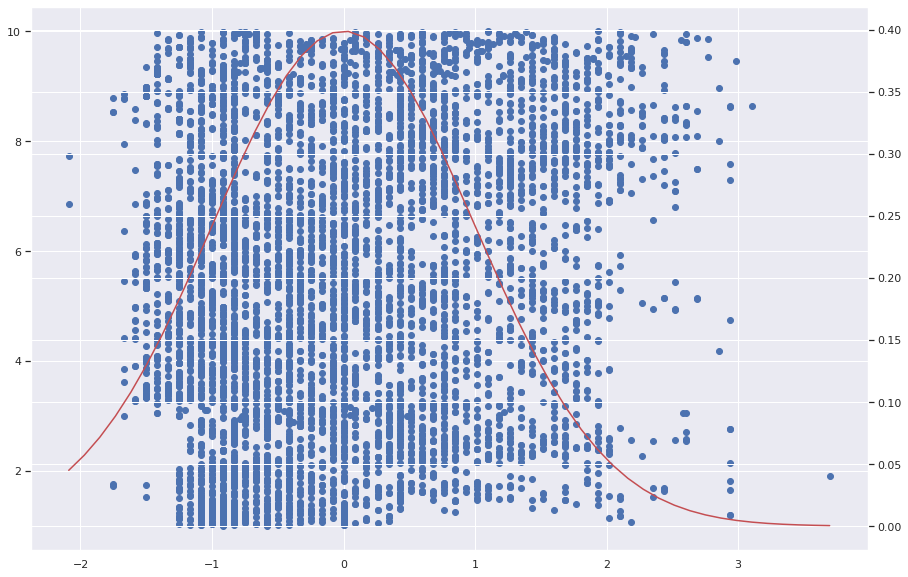

alcohol
mean = 9.97406456846562e-16 std = 0.9999999999999999


time: 6.43 s (started: 2022-04-07 09:12:15 +00:00)


In [18]:
for name in list(dataX.drop(columns=['quality'])):
    fit_and_plot(name, stats.norm, dataX.drop(columns=['quality'])[name])

In these scatter plots, we are able to clearly see that due to the presence of outliers, none of the features holds the null hypothesis currently. 

**Outlier Detection**

In [19]:
#The outliers detection using upper and lower quantities :
def outliers_detection(data):
    data = np.array(data)
    percentile_25 = np.percentile(data, 25)
    percentile_50 = np.percentile(data, 50)
    percentile_75 = np.percentile(data, 75)
    lower_bound = percentile_25 - 1.5 * (percentile_75 - percentile_25)
    upper_bound = percentile_75 + 1.5 * (percentile_75 - percentile_25)
    outliers = []
    for point in list(data):
        if point < lower_bound or point > upper_bound:
            outliers.append(point)
        else:
            outliers.append('not outlier')
    
    return outliers

time: 17 ms (started: 2022-04-07 09:12:22 +00:00)


In [20]:
d_outliers = {}
for name in list(dataX):
    d_outliers.setdefault(name, outliers_detection(dataX[name]))
df_outliers = pd.DataFrame(data=d_outliers)
df_outliers.head(3198)

fixed acidity volatile acidity  citric acid residual sugar    chlorides  \
0      not outlier         2.188833    -2.192833    not outlier  not outlier   
1      not outlier         3.282235    -2.192833    not outlier  not outlier   
2      not outlier           2.5533  not outlier    not outlier  not outlier   
3         3.073817      not outlier  not outlier    not outlier  not outlier   
4      not outlier         2.188833    -2.192833    not outlier  not outlier   
...            ...              ...          ...            ...          ...   
3193   not outlier      not outlier  not outlier    not outlier  not outlier   
3194   not outlier      not outlier  not outlier    not outlier  not outlier   
3195   not outlier      not outlier    -2.124013    not outlier  not outlier   
3196   not outlier      not outlier  not outlier    not outlier  not outlier   
3197   not outlier      not outlier     2.899845    not outlier     3.310395   

     free sulfur dioxide total sulfur dioxide      density           pH  \
0            not outlier          not outlier  not outlier  not outlier   
1            not outlier          not outlier  not outlier  not outlier   
2            not outlier          not outlier  not outlier  not outlier   
3            not outlier          not outlier  not outlier  not outlier   
4            not outlier          not outlier  not outlier  not outlier   
...                  ...                  ...          ...          ...   
3193         not outlier          not outlier  not outlier  not outlier   
3194         not outlier          not outlier  not outlier  not outlier   
3195         not outlier          not outlier  not outlier  not outlier   
3196         not outlier          not outlier  not outlier  not outlier   
3197         not outlier          not outlier  not outlier  not outlier   

        sulphates      alcohol      quality  
0     not outlier  not outlier  not outlier  
1     not outlier  not outlier  not outlier  
2     not outlier  not outlier  not outlier  
3     not outlier  not outlier  not outlier  
4     not outlier  not outlier  not outlier  
...           ...          ...          ...  
3193  not outlier  not outlier  not outlier  
3194  not outlier  not outlier  not outlier  
3195  not outlier  not outlier  not outlier  
3196  not outlier  not outlier  not outlier  
3197  not outlier  not outlier  not outlier  

[3198 rows x 12 columns]

time: 59.7 ms (started: 2022-04-07 09:12:22 +00:00)


**top** gives the highest counted value of the categorical values, in this case "not outlier"

In [21]:
distinctCounter_outliers = df_outliers.apply(lambda x: len(x.unique()))
print(distinctCounter_outliers)

fixed acidity            52
volatile acidity         79
citric acid              33
residual sugar           46
chlorides               120
free sulfur dioxide      33
total sulfur dioxide     11
density                   3
pH                       26
sulphates                49
alcohol                   4
quality                   4
dtype: int64
time: 12.9 ms (started: 2022-04-07 09:12:22 +00:00)


In [22]:
df_outliers.head(50)

fixed acidity volatile acidity  citric acid residual sugar    chlorides  \
0    not outlier         2.188833    -2.192833    not outlier  not outlier   
1    not outlier         3.282235    -2.192833    not outlier  not outlier   
2    not outlier           2.5533  not outlier    not outlier  not outlier   
3       3.073817      not outlier  not outlier    not outlier  not outlier   
4    not outlier         2.188833    -2.192833    not outlier  not outlier   
5    not outlier         1.945855    -2.192833    not outlier  not outlier   
6    not outlier      not outlier  not outlier    not outlier  not outlier   
7    not outlier      not outlier    -2.192833    not outlier  not outlier   
8    not outlier      not outlier    -2.055193    not outlier  not outlier   
9    not outlier      not outlier  not outlier    not outlier  not outlier   
10   not outlier      not outlier  not outlier    not outlier  not outlier   
11   not outlier      not outlier  not outlier    not outlier  not outlier   
12   not outlier      not outlier    -2.192833    not outlier  not outlier   
13   not outlier      not outlier  not outlier    not outlier     1.654714   
14   not outlier      not outlier  not outlier    not outlier      3.42458   
15   not outlier      not outlier  not outlier    not outlier     3.253303   
16   not outlier      not outlier  not outlier    not outlier  not outlier   
17   not outlier      not outlier  not outlier    not outlier     8.905455   
18   not outlier      not outlier  not outlier    not outlier  not outlier   
19   not outlier      not outlier  not outlier    not outlier     8.134707   
20   not outlier      not outlier  not outlier    not outlier  not outlier   
21   not outlier      not outlier  not outlier    not outlier  not outlier   
22   not outlier      not outlier  not outlier    not outlier     1.426344   
23   not outlier      not outlier  not outlier    not outlier  not outlier   
24   not outlier      not outlier  not outlier    not outlier  not outlier   
25   not outlier      not outlier  not outlier    not outlier  not outlier   
26   not outlier      not outlier  not outlier    not outlier  not outlier   
27   not outlier      not outlier  not outlier    not outlier     1.426344   
28   not outlier         2.249577    -2.192833    not outlier  not outlier   
29   not outlier      not outlier    -2.192833    not outlier  not outlier   
30   not outlier         2.036972  not outlier    not outlier  not outlier   
31   not outlier         2.097716    -2.192833    not outlier  not outlier   
32   not outlier      not outlier  not outlier    not outlier  not outlier   
33   not outlier      not outlier  not outlier    not outlier  not outlier   
34   not outlier      not outlier  not outlier    not outlier  not outlier   
35   not outlier      not outlier    -2.192833    not outlier  not outlier   
36   not outlier      not outlier  not outlier    not outlier  not outlier   
37   not outlier      not outlier  not outlier    not outlier  not outlier   
38   not outlier         4.800849  not outlier    not outlier     3.310395   
39   not outlier      not outlier  not outlier    not outlier  not outlier   
40   not outlier      not outlier  not outlier    not outlier  not outlier   
41   not outlier      not outlier  not outlier    not outlier  not outlier   
42   not outlier      not outlier  not outlier    not outlier     7.877791   
43   not outlier         1.945855  not outlier    not outlier  not outlier   
44   not outlier         2.006599    -2.055193    not outlier  not outlier   
45   not outlier      not outlier  not outlier    not outlier  not outlier   
46   not outlier          3.61633  not outlier    not outlier     1.654714   
47   not outlier      not outlier  not outlier    not outlier     1.626168   
48   not outlier      not outlier  not outlier    not outlier  not outlier   
49   not outlier      not outlier  not outlier    not outlier  not outlier   

   free sulfur dioxide t

time: 33.7 ms (started: 2022-04-07 09:12:22 +00:00)


We notice here that the following three features have the most outliers left (that is, the remaining unique values) after removal of outliers from the dataframe:

*   residual sugar
*   chlorides 
*   sulphates


In [23]:
#The outliers indices are
outliers_indices = df_outliers.index.tolist()
print(outliers_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [24]:
#Remove outliers from the dataframe 
df_desired = dataX.drop(columns=['quality']).copy()
for i in outliers_indices:
  update_df = df_desired.drop(df_desired.iloc[:1, :].index.tolist())
df_outliers.describe()

fixed acidity volatile acidity  citric acid residual sugar  \
count           6497             6497         6497           6497   
unique            52               79           33             46   
top      not outlier      not outlier  not outlier    not outlier   
freq            6140             6120         5988           6379   

          chlorides free sulfur dioxide total sulfur dioxide      density  \
count          6497                6497                 6497         6497   
unique          120                  33                   11            3   
top     not outlier         not outlier          not outlier  not outlier   
freq           6211                6435                 6487         6494   

                 pH    sulphates      alcohol      quality  
count          6497         6497         6497         6497  
unique           26           49            4            4  
top     not outlier  not outlier  not outlier  not outlier  
freq           6424         6306         6494         6269

time: 5 s (started: 2022-04-07 09:12:22 +00:00)


In [25]:
df_outliers.head(50)

fixed acidity volatile acidity  citric acid residual sugar    chlorides  \
0    not outlier         2.188833    -2.192833    not outlier  not outlier   
1    not outlier         3.282235    -2.192833    not outlier  not outlier   
2    not outlier           2.5533  not outlier    not outlier  not outlier   
3       3.073817      not outlier  not outlier    not outlier  not outlier   
4    not outlier         2.188833    -2.192833    not outlier  not outlier   
5    not outlier         1.945855    -2.192833    not outlier  not outlier   
6    not outlier      not outlier  not outlier    not outlier  not outlier   
7    not outlier      not outlier    -2.192833    not outlier  not outlier   
8    not outlier      not outlier    -2.055193    not outlier  not outlier   
9    not outlier      not outlier  not outlier    not outlier  not outlier   
10   not outlier      not outlier  not outlier    not outlier  not outlier   
11   not outlier      not outlier  not outlier    not outlier  not outlier   
12   not outlier      not outlier    -2.192833    not outlier  not outlier   
13   not outlier      not outlier  not outlier    not outlier     1.654714   
14   not outlier      not outlier  not outlier    not outlier      3.42458   
15   not outlier      not outlier  not outlier    not outlier     3.253303   
16   not outlier      not outlier  not outlier    not outlier  not outlier   
17   not outlier      not outlier  not outlier    not outlier     8.905455   
18   not outlier      not outlier  not outlier    not outlier  not outlier   
19   not outlier      not outlier  not outlier    not outlier     8.134707   
20   not outlier      not outlier  not outlier    not outlier  not outlier   
21   not outlier      not outlier  not outlier    not outlier  not outlier   
22   not outlier      not outlier  not outlier    not outlier     1.426344   
23   not outlier      not outlier  not outlier    not outlier  not outlier   
24   not outlier      not outlier  not outlier    not outlier  not outlier   
25   not outlier      not outlier  not outlier    not outlier  not outlier   
26   not outlier      not outlier  not outlier    not outlier  not outlier   
27   not outlier      not outlier  not outlier    not outlier     1.426344   
28   not outlier         2.249577    -2.192833    not outlier  not outlier   
29   not outlier      not outlier    -2.192833    not outlier  not outlier   
30   not outlier         2.036972  not outlier    not outlier  not outlier   
31   not outlier         2.097716    -2.192833    not outlier  not outlier   
32   not outlier      not outlier  not outlier    not outlier  not outlier   
33   not outlier      not outlier  not outlier    not outlier  not outlier   
34   not outlier      not outlier  not outlier    not outlier  not outlier   
35   not outlier      not outlier    -2.192833    not outlier  not outlier   
36   not outlier      not outlier  not outlier    not outlier  not outlier   
37   not outlier      not outlier  not outlier    not outlier  not outlier   
38   not outlier         4.800849  not outlier    not outlier     3.310395   
39   not outlier      not outlier  not outlier    not outlier  not outlier   
40   not outlier      not outlier  not outlier    not outlier  not outlier   
41   not outlier      not outlier  not outlier    not outlier  not outlier   
42   not outlier      not outlier  not outlier    not outlier     7.877791   
43   not outlier         1.945855  not outlier    not outlier  not outlier   
44   not outlier         2.006599    -2.055193    not outlier  not outlier   
45   not outlier      not outlier  not outlier    not outlier  not outlier   
46   not outlier          3.61633  not outlier    not outlier     1.654714   
47   not outlier      not outlier  not outlier    not outlier     1.626168   
48   not outlier      not outlier  not outlier    not outlier  not outlier   
49   not outlier      not outlier  not outlier    not outlier  not outlier   

   free sulfur dioxide t

time: 35.3 ms (started: 2022-04-07 09:12:27 +00:00)


In [26]:
#We create another copy of the standardised concatenated dataset to see what the influence of outliers is on quality and type of wine
df_outlier = data.copy()
outliers_type = pd.concat((df_outliers, df_outlier['type']), axis=1).dropna()
type = list(outliers_type['type'])
max(set(type), key=type.count)

'w'

time: 26.7 ms (started: 2022-04-07 09:12:27 +00:00)


We observe that the influence of the outliers is higher on the red wine types!




In [27]:
quality = list(df_outlier['quality'])
max(set(quality), key=quality.count)

6

time: 8.2 ms (started: 2022-04-07 09:12:27 +00:00)


We observe that the influence of the outliers on quality now. The quality median of the outliers is 6. 


In [28]:
for name in list(dataX.copy()):
    is_normal(np.array(dataX.copy()[name]))

0.0
False


0.0
False


2.6841653491253483e-128
False


0.0
False


0.0
False


0.0
False


4.211103135341336e-13
False


3.398816644368203e-245
False


1.947508707995735e-39
False


0.0
False


1.9599603929034486e-98
False


1.1606148581926138e-11
False


time: 41.7 ms (started: 2022-04-07 09:12:27 +00:00)


Comparing line [123] to [261], we see that after dropping the outlier rows from the feature matrix, we see that the p-values have gone up and normalised further, which means that features distributions are more close to normal now.

Final Step: Checking by standardizing and visualising

In [29]:
np_scaled = sX.fit_transform(dataX.copy())
scaled_df = pd.DataFrame(np_scaled, columns = [name for name in list(dataX.copy())])
scaled_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol   quality  
0 -0.915464 -0.937230  
1 -0.580068 -0.937230  
2 -0.580068 -0.937230  
3 -0.580068  0.207999  
4 -0.915464 -0.937230

time: 29.2 ms (started: 2022-04-07 09:12:27 +00:00)


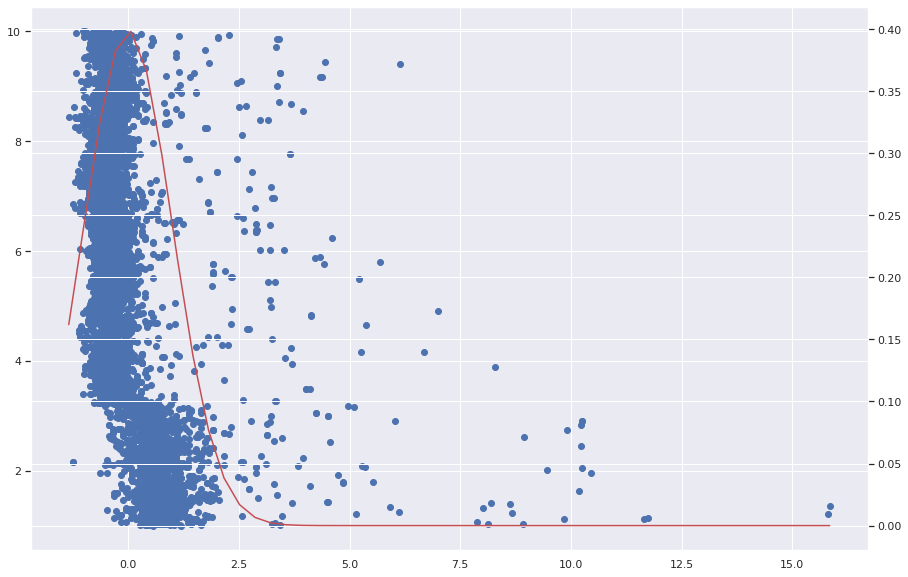

chlorides
mean = 0.0 std = 0.9999999999999999




(<scipy.stats._continuous_distns.norm_gen at 0x7fad7a4d2550>,
 0.0,
 0.9999999999999999)

time: 575 ms (started: 2022-04-07 09:12:27 +00:00)


In [30]:
fit_and_plot('chlorides', stats.norm, scaled_df['chlorides'])

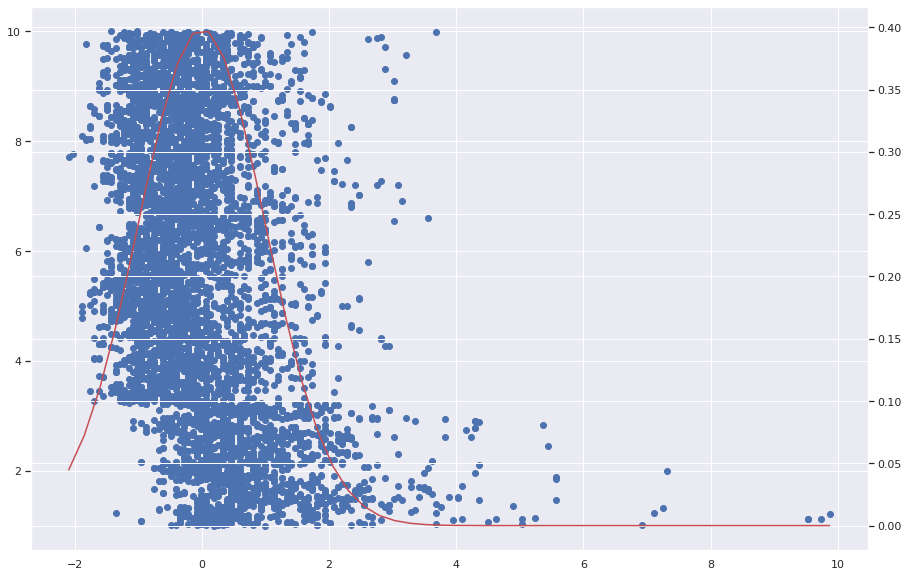

sulphates
mean = -1.7498358892044948e-17 std = 1.0




(<scipy.stats._continuous_distns.norm_gen at 0x7fad7a4d2550>,
 -1.7498358892044948e-17,
 1.0)

time: 587 ms (started: 2022-04-07 09:12:28 +00:00)


In [31]:
fit_and_plot('sulphates', stats.norm, scaled_df['sulphates'])

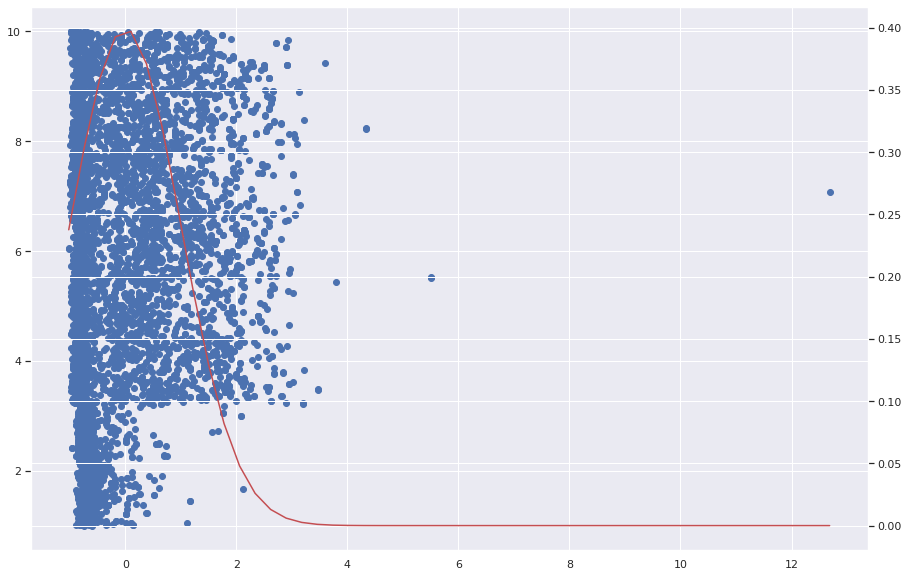

residual sugar
mean = 3.4996717784089897e-17 std = 1.0




(<scipy.stats._continuous_distns.norm_gen at 0x7fad7a4d2550>,
 3.4996717784089897e-17,
 1.0)

time: 574 ms (started: 2022-04-07 09:12:28 +00:00)


In [32]:
fit_and_plot('residual sugar', stats.norm, scaled_df['residual sugar'])

**One can clearly compare the three plots: [264] - [266] with the original plots from [145]. I observed that this outlier removal procedure has significantly improved the normalisation of the feature values and conforms more to the Null Hypothesis**

An important point to cite here before moving forward would be that this outlier removal procedure makes the size of the dataset much smaller. This would hamper effective training later for our regression or classification problems. Hence, from here on out, we use the original scaled version of the dataset. With this 1. part of the project ends




---



---



## **2. Using a concatenated set to create a larger set of red and white wines where we want to do a classification.**

For a classificatione exercise for differentiation between red and white wines, we use 'quality' labels given in the dataset as a feature as well. It might be valuable to see if quality of wine tied in with other feature from the chemical tests has a link to the type of wine itself. 

In [33]:
data.sample(100)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1044            6.4              0.39         0.33             3.3      0.046   
852             8.0              0.42         0.32             2.5      0.080   
458            10.4              0.33         0.63             2.8      0.084   
5073            6.5              0.22         0.19             1.1      0.064   
2536            6.1              0.36         0.58            15.0      0.044   
...             ...               ...          ...             ...        ...   
2795            6.9              0.25         0.26             5.2      0.024   
5697            6.6              0.21         0.34             5.6      0.046   
2876            7.6              0.31         0.29            10.5      0.040   
3554            6.4              0.29         0.28            11.1      0.063   
5816            6.1              0.38         0.14             3.9      0.060   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1044                 12.0                  53.0  0.99294  3.36       0.62   
852                  26.0                 122.0  0.99801  3.22       1.07   
458                   5.0                  22.0  0.99980  3.26       0.74   
5073                 36.0                 191.0  0.99297  3.05       0.50   
2536                 42.0                 115.0  0.99780  3.15       0.51   
...                   ...                   ...      ...   ...        ...   
2795                 36.0                 135.0  0.99480  3.16       0.72   
5697                 30.0                 140.0  0.99299  3.22       0.38   
2876                 21.0                 145.0  0.99660  3.04       0.35   
3554                 66.0                 169.0  0.99730  2.89       0.57   
5816                 27.0                 113.0  0.99344  3.07       0.34   

      alcohol  quality type  
1044     12.2        6    r  
852       9.7        5    r  
458      11.2        7    r  
5073      9.5        6    w  
2536      9.0        5    w  
...       ...      ...  ...  
2795     10.7        7    w  
5697     11.0        5    w  
2876      9.4        5    w  
3554      9.0        5    w  
5816      9.2        4    w  

[100 rows x 13 columns]

time: 34.4 ms (started: 2022-04-07 09:12:29 +00:00)


We simplify the classification task by replacing the red wine labels, that is, 'r' that we added earlier to the concatenated dataset with 1 and replacing label for white wine 'w' with a 0. This will be simpligy our binary classification with the threshold obviously set at 0.5. 

In [34]:
# Create classification version of target variable
data['type'].replace('r', 1, inplace=True) 
data['type'].replace('w', 0, inplace=True) 
data.sample(100)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1120            7.9              0.54         0.34             2.5      0.076   
4444            6.5              0.22         0.29             7.4      0.028   
104             7.2              0.49         0.24             2.2      0.070   
5592            6.7              0.28         0.34             8.9      0.048   
3111            7.3              0.22         0.49             9.4      0.034   
...             ...               ...          ...             ...        ...   
5089            7.6              0.31         0.24             1.8      0.037   
3764            7.0              0.35         0.31             1.8      0.069   
274             7.5              0.65         0.18             7.0      0.088   
2334            6.4              0.25         0.30             5.5      0.038   
3882            7.4              0.33         0.26            15.6      0.049   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1120                  8.0                  17.0  0.99235  3.20       0.72   
4444                 16.0                  87.0  0.99311  3.15       0.56   
104                   5.0                  36.0  0.99600  3.33       0.48   
5592                 32.0                 111.0  0.99455  3.25       0.54   
3111                 29.0                 134.0  0.99390  2.99       0.32   
...                   ...                   ...      ...   ...        ...   
5089                 39.0                 150.0  0.99130  3.05       0.44   
3764                 15.0                 162.0  0.99440  3.18       0.47   
274                  27.0                  94.0  0.99915  3.38       0.77   
2334                 15.0                 129.0  0.99480  3.14       0.49   
3882                 67.0                 210.0  0.99907  3.06       0.68   

      alcohol  quality  type  
1120     13.1        8     1  
4444     10.9        7     0  
104       9.4        5     1  
5592     11.0        7     0  
3111     11.0        7     0  
...       ...      ...   ...  
5089     11.8        7     0  
3764      9.4        5     0  
274       9.4        5     1  
2334      9.6        6     0  
3882      9.5        5     0  

[100 rows x 13 columns]

time: 38.7 ms (started: 2022-04-07 09:12:29 +00:00)


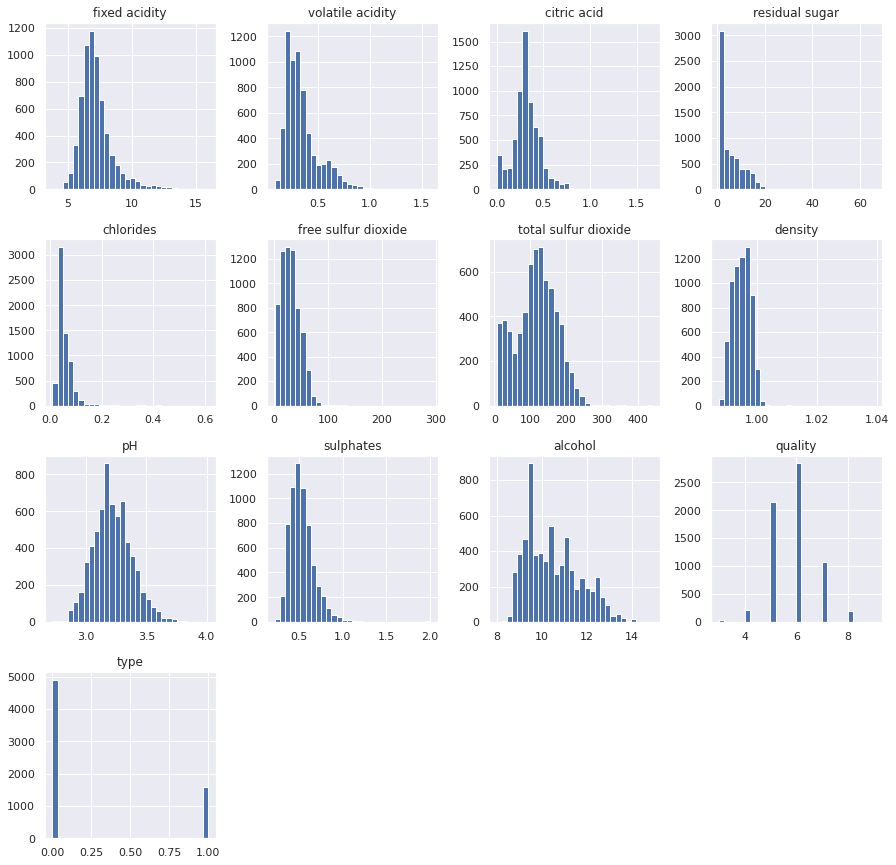

time: 4.34 s (started: 2022-04-07 09:12:29 +00:00)


In [35]:
data.hist(bins=30, figsize=(15,15))
plt.show()

In [36]:
dataX = data.copy().drop(['type'],axis=1)
dataY = data['type'].astype(int).copy()
dataX.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

time: 31.2 ms (started: 2022-04-07 09:12:33 +00:00)


In [37]:
dataY.head(200)

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    1
199    1
Name: type, Length: 200, dtype: int64

time: 6.95 ms (started: 2022-04-07 09:12:33 +00:00)


In [38]:
dataY.value_counts() # 1 stands for red wine and 0 stands for white wine

0    4898
1    1599
Name: type, dtype: int64

time: 6.99 ms (started: 2022-04-07 09:12:33 +00:00)


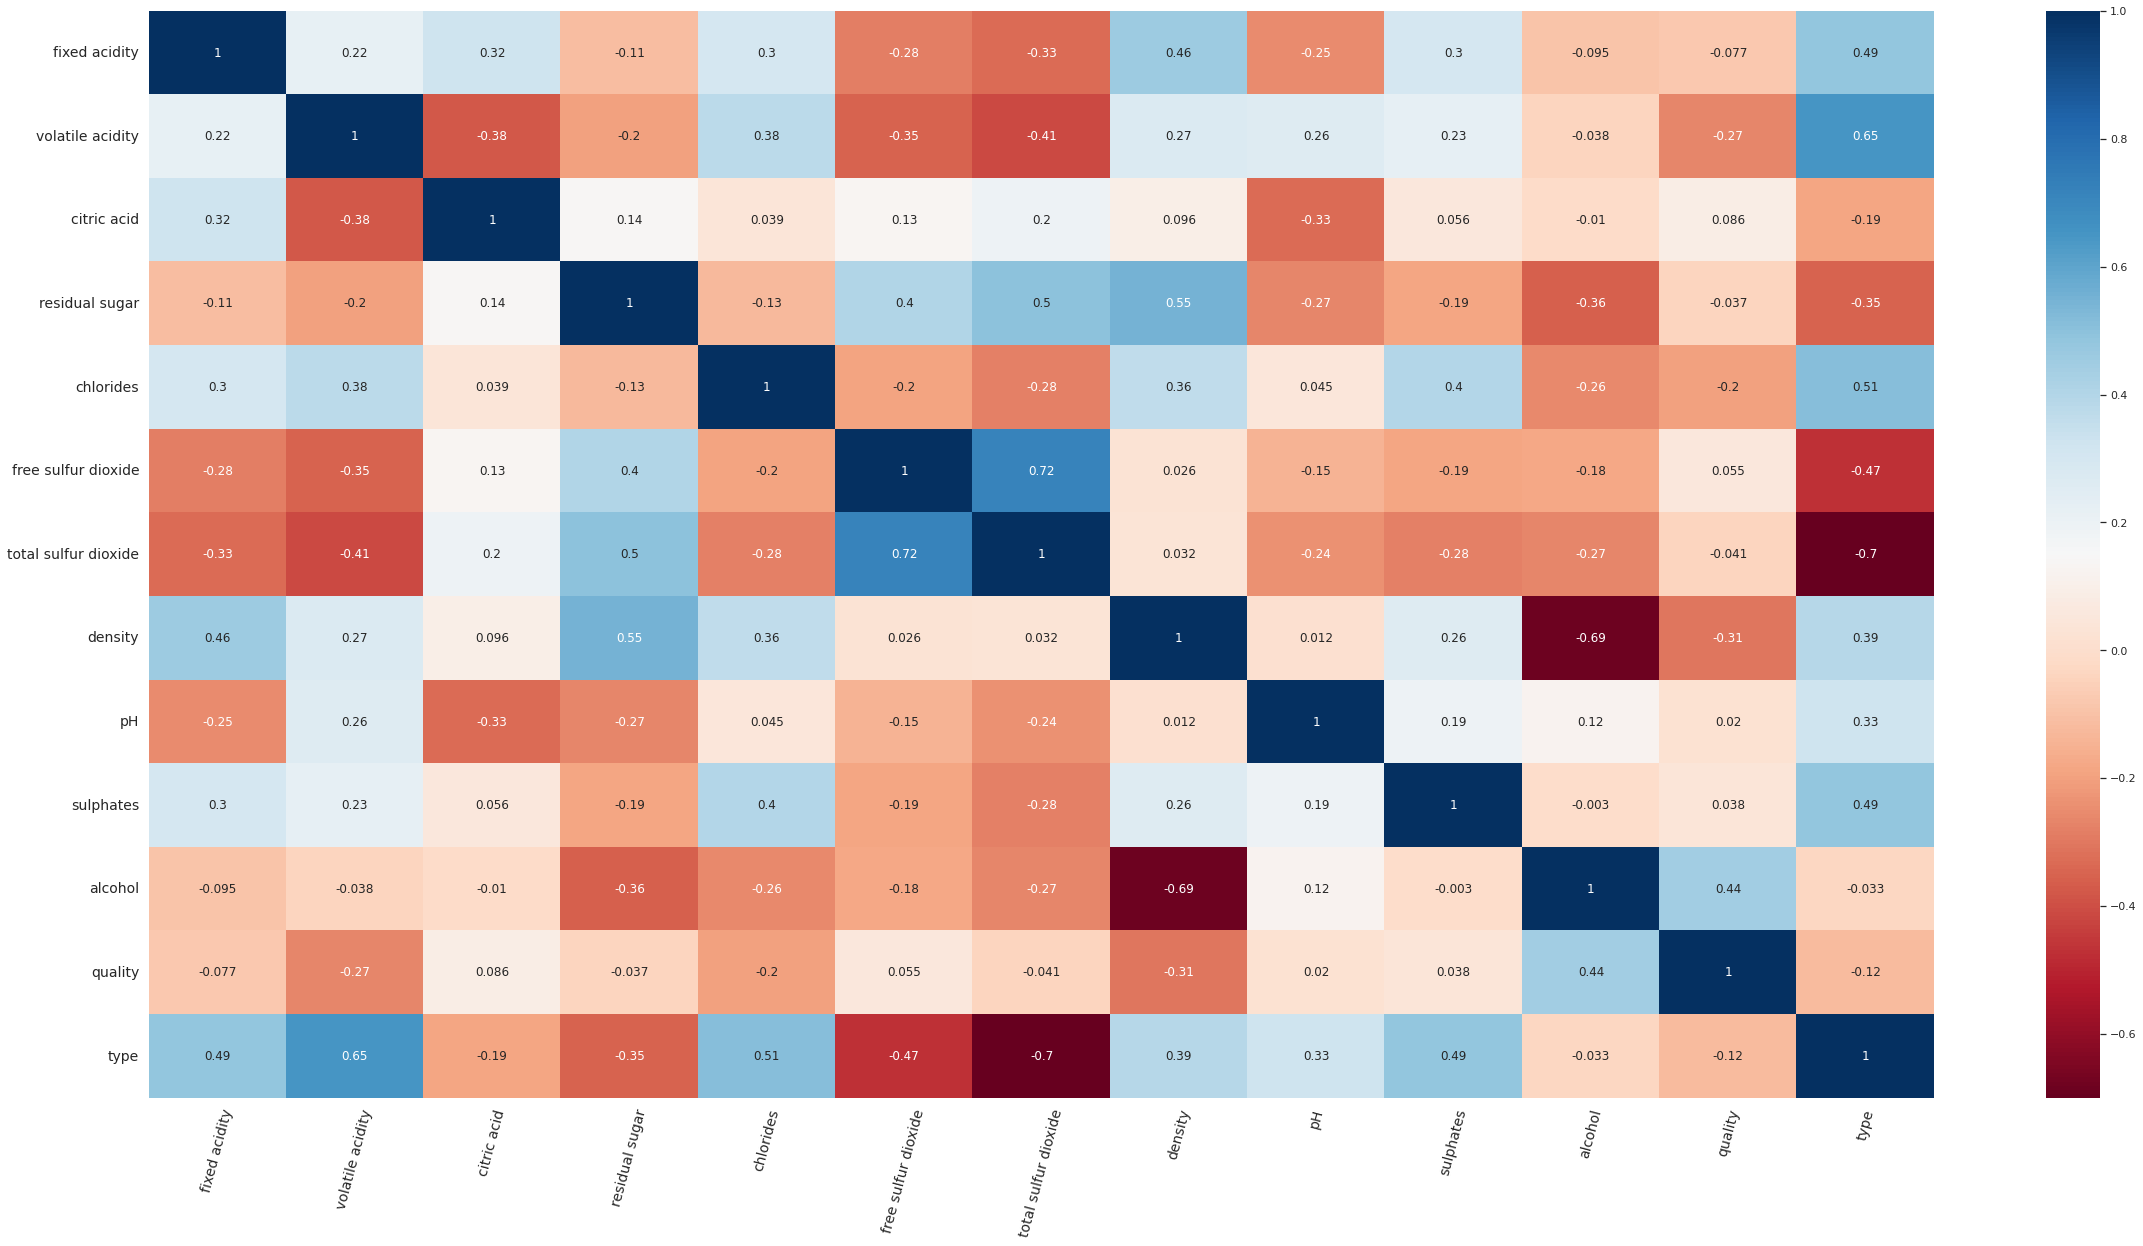

time: 1.51 s (started: 2022-04-07 09:12:33 +00:00)


In [39]:
correlationMatrix = pd.DataFrame(data).corr() 
fig = plt.figure(figsize = (40,20))
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=75)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
sns.heatmap(correlationMatrix, annot=True,cmap='RdBu') 

In [40]:
#we can also simply look at the table via pandas:
correlationMatrix.style.background_gradient(cmap='viridis').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


time: 132 ms (started: 2022-04-07 09:12:35 +00:00)


In [41]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX,dataY, test_size=.25, random_state=0)

time: 6.2 ms (started: 2022-04-07 09:12:35 +00:00)


Random state is used to create splits that are reproducible. The random state is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.

Below I pass random number generators around between functions and classes, meaning each script could pass a random number generator to functions that need to be reproducible. The benefit is you know exactly what random number generator is used in each part of your project and ensure results are the same.

In [42]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

time: 1.73 ms (started: 2022-04-07 09:12:35 +00:00)


## **I. Baseline Model for Classification Task**

In the next steps, we will model the data with various algorithms and compare their metrics: loss, precision, recall and area under the ROC curve to find the best performing model in these terms for our classification data.

Model Approach 1: Logistic Regression

In [43]:
# ML Algorithms to be used
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as LGBMClassifier

# Hyperparameters:
penalty = 'l2'
C = 1.0 #regularization strength. The smaller the value, the stronger the regularization.
random_state = 2020
solver = 'liblinear' # For small datasets, it is good.
logReg = LogisticRegression(penalty=penalty, C=C,random_state=random_state, solver=solver)

time: 73.6 ms (started: 2022-04-07 09:12:35 +00:00)


In [44]:
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
#Lists for storing scores
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data = [],index=y_train.index,columns=[0,1])
model = logReg

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),y_train.ravel()):


  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

  #Fitting the model according to given data:
  model.fit(X_train_fold, y_train_fold)

  #Lets check how good is the fitting. Remember we decided to use log loss.
  # Log loss, aka logistic loss or cross-entropy loss.This is the loss function 
  # used in (multinomial) logistic regression and extensions of it such as neural networks.

  # We will fisrt look log loss in the training dataset. 
  loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold)[:,1])
  #Saving our analysis on the list:
  trainingScores.append(loglossTraining)

  #Lets see how good it is on CV dataset:
  predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model.predict_proba(X_cv_fold)
  loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
  #Saving our analysis on the list:
  cvScores.append(loglossCV)

  #printing the results:
  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)

#Lets see the overall log loss for the entire training set (1127)
loglossLogisticRegression = log_loss(y_train,predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)


Training Log Loss:  0.07844388952597557
CV Log Loss:  0.05875860320500823
Training Log Loss:  0.07265628114813277
CV Log Loss:  0.08205023616296986
Training Log Loss:  0.06835593888557834
CV Log Loss:  0.10533986272687015
Training Log Loss:  0.0765368382440842
CV Log Loss:  0.06599083335692431
Training Log Loss:  0.07527213254782514
CV Log Loss:  0.0741393967847337
Logistic Regression Log Loss:  0.07725297389936886
time: 308 ms (started: 2022-04-07 09:12:35 +00:00)


**Confusion Matrix, Recall, Precision and Area under the Receiver Operating Characteristic (ROC) Curve**

**Confusion Matrix:**

Classification accuracy alone can be misleading if one has an unequal number of observations in each class.
The confusion matrix shows the ways in which your classification model
is confused when it makes predictions.

In this way, we can assign the event row, i.e., red wine as “positive” and the no-event row, i.e., white wine as “negative“. We can then assign the event column of predictions as “true” and the no-event as “false“.

This gives us:

true positive (TP)
A test result that correctly indicates the presence of a condition or characteristic
true negative (TN)
A test result that correctly indicates the absence of a condition or characteristic
false positive (FP)
A test result which wrongly indicates that a particular condition or attribute is present
false negative (FN)
A test result which wrongly indicates that a particular condition or attribute is absent

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


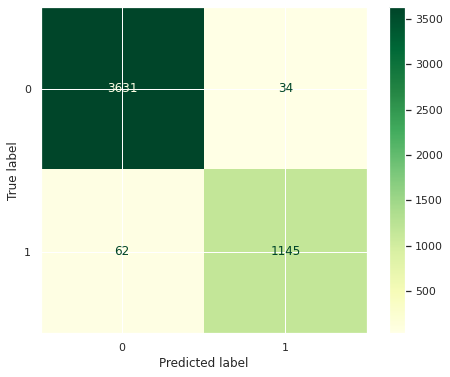

time: 297 ms (started: 2022-04-07 09:12:35 +00:00)


In [45]:
from sklearn.metrics import plot_confusion_matrix
#Plotting the Confusion Matrix
y_predicted = model.predict(X_train)
confusion_matrix(y_train,y_predicted)
plot_confusion_matrix(model,X_train,y_train,cmap='YlGn')

**Precision - Recall Curves**
Precision (also called positive predictive value): is the fraction of relevant instances among the retrieved instances.
Recall (also known as sensitivity): is the fraction of relevant instances that were retrieved.

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.99')

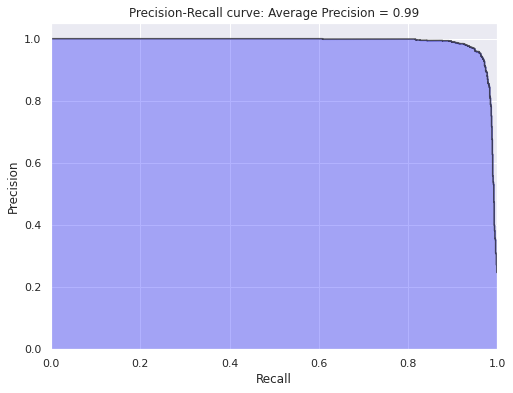

time: 341 ms (started: 2022-04-07 09:12:36 +00:00)


In [46]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))


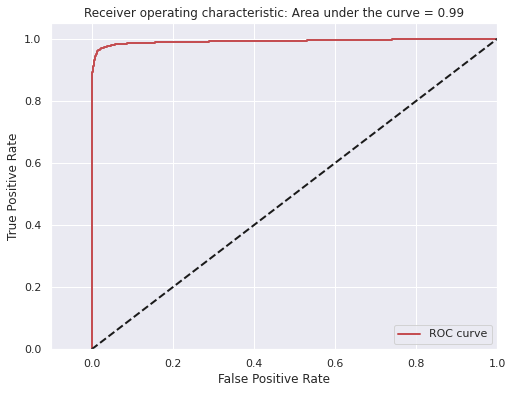

time: 303 ms (started: 2022-04-07 09:12:36 +00:00)


In [47]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

Model Approach II: Random Forest Classifier

In [48]:
# Hyperparameters:
#You need to check model descriptions for the hyperparameters. 
n_estimators = 200
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 42
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              min_weight_fraction_leaf=min_weight_fraction_leaf,max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,class_weight=class_weight)


time: 8.46 ms (started: 2022-04-07 09:12:36 +00:00)


In [49]:
from sklearn.ensemble import RandomForestClassifier
#Lists for storing scores
trainingScores = []
cvScores = []

#It is  also known as Subset Selection.
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

model2 = RFC

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),y_train.ravel()):
  
  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

  #Fitting the model according to given data:
  #Note that model refers to FRC.
  model2.fit(X_train_fold, y_train_fold)

  # Log loss, aka logistic loss or cross-entropy loss.This is the loss function 

  # We will fisrt look log loss in the training dataset. 
  loglossTraining = log_loss(y_train_fold,model2.predict_proba(X_train_fold)[:,1])
  #Saving our analysis on the list:
  trainingScores.append(loglossTraining)

  #Lets see how good it is on CV dataset:
  predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model2.predict_proba(X_cv_fold)
  loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
  #Saving our analysis on the list:
  cvScores.append(loglossCV)
  
  #printing the results:
  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)
  

loglossRFC = log_loss(y_train,predictionsBasedOnKFolds.loc[:,1])
print('-----------------------------------')
print('RFC Log Loss: ', loglossRFC)

Training Log Loss:  0.009685721395760951
CV Log Loss:  0.025313889347522673
Training Log Loss:  0.009453502242480418
CV Log Loss:  0.06273852910569573
Training Log Loss:  0.008828879016095945
CV Log Loss:  0.0409253525070632
Training Log Loss:  0.009389123828620892
CV Log Loss:  0.028546644952011414
Training Log Loss:  0.009280567382588345
CV Log Loss:  0.03243656471392393
-----------------------------------
RFC Log Loss:  0.03799467314211587
time: 7.24 s (started: 2022-04-07 09:12:36 +00:00)


This feature importance chart insubstantiates the inital supposition that quality values might have a contribution to the classification task between red and white wine. Similarly, interesting low ranking feature is alcohol. 

Chlorides, which we had earlier in the project also handled for outlier detection and removal do have a significant impact as features on the classification task and in the case of a larger dataset or in the case of an augmented dataset, would have been beneficial to do an outlier removal for and then again check their influence. 

For, the task at hand, I shall be foregoing the outlier removal again in order to avoid reducing the dataset size. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


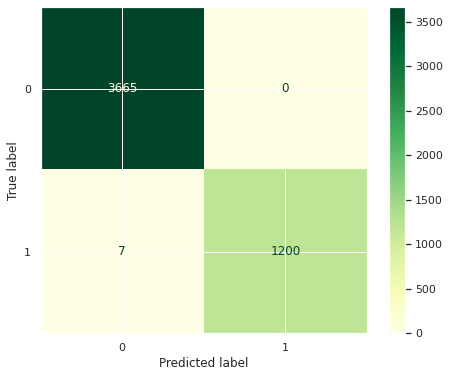

time: 653 ms (started: 2022-04-07 09:12:44 +00:00)


In [50]:
#Confusion Matrix 
y_predicted = model2.predict(X_train)
confusion_matrix(y_train,y_predicted)
plot_confusion_matrix(model2,X_train,y_train,cmap='YlGn')

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 1.00')

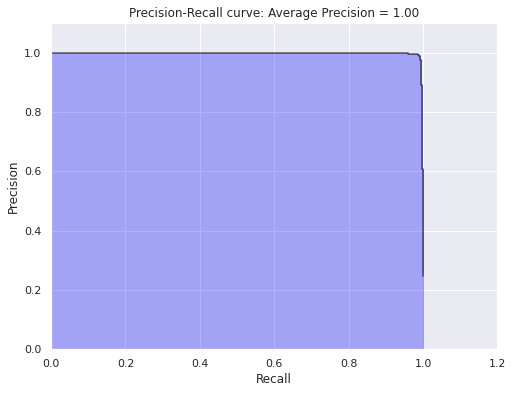

time: 360 ms (started: 2022-04-07 09:12:44 +00:00)


In [51]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRF = preds.copy()
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.10])
plt.xlim([0.0, 1.2])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

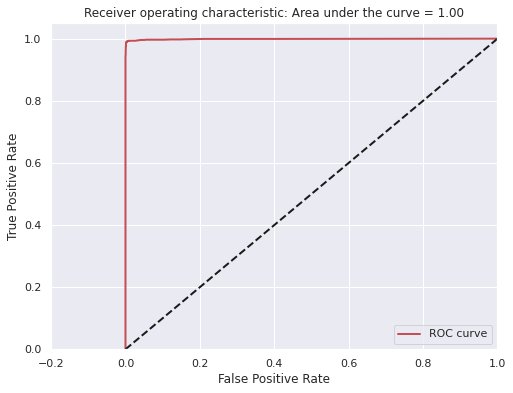

time: 310 ms (started: 2022-04-07 09:12:45 +00:00)


In [52]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([-0.2, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

We have seen, for instance, the Recall, Precision, Logloss as well as Area under the ROC curve so far for Logistic Regression baseline model and Random Forest classification baseline model as metrics of evaluation. In that we have already observed on the multiple metrics that RFC, that is, Random Forest Classifier performs better on our classification dataset.  

In that same vein, I now do a basic comparison between some more existing classification models like Decision Tree Classifier, XG Boosted Classifier, K Neighbors Classifier and Gaussian Navier-Bayes (GaussianNB) Classifier against Random Forest Classifier on the following metrics just in case one finds another alternative to Random Forest Classifier for our classification task later in the project: 

1. Classification Accuracy
2. Classification Precision
3. Classification Recall
4. Area under the ROC Curve

In order to do the comparison, I shall be making boxplots of each of the aforementioned models. 

In [53]:
#more ML libraries imported for ML algorithm comparison to see an accuracy comparison to decide which we carry forward with in the next classification steps
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.neighbors import KNeighborsClassifier

time: 78.6 ms (started: 2022-04-07 09:12:45 +00:00)


DTC: 0.967148 (0.007667)

RFC: 0.988718 (0.008823)

XGBoost: 0.986661 (0.006950)

KNN: 0.926064 (0.013696)

NB: 0.967142 (0.014729)

++Plotting Box Plot with Algorthmic Accuracy Comparison++


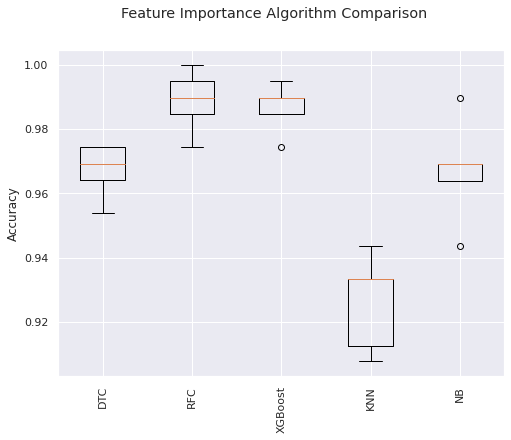

time: 5.59 s (started: 2022-04-07 09:12:45 +00:00)


In [54]:
models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
#evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
#It is  also known as Subset Selection.
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])
#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),y_train.ravel()):
  
  #'iloc' can be used when the user doesn’t know the index label:
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

for name, model in models: 
  kfold = model_selection.KFold(n_splits = 10)
  training_results = model_selection.cross_val_score(model, X_train_fold, y_train_fold.values, cv = k_fold, scoring = scoring)
  cv_results = model_selection.cross_val_score(model, X_cv_fold, y_cv_fold.values, cv = k_fold, scoring = scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
  print()
#boxplot
print("++Plotting Box Plot with Algorthmic Accuracy Comparison++")
fig = plt.figure()
fig.suptitle('Feature Importance Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation = 90)
ax.set_ylabel("Accuracy")
plt.show()

DTC: 0.941175 (0.027084)

RFC: 0.996154 (0.007692)

XGBoost: 0.992582 (0.009095)

KNN: 0.885031 (0.043696)

NB: 0.914609 (0.046882)

++Plotting Box Plot with Algorthmic Area under the ROC Curve Comparison++


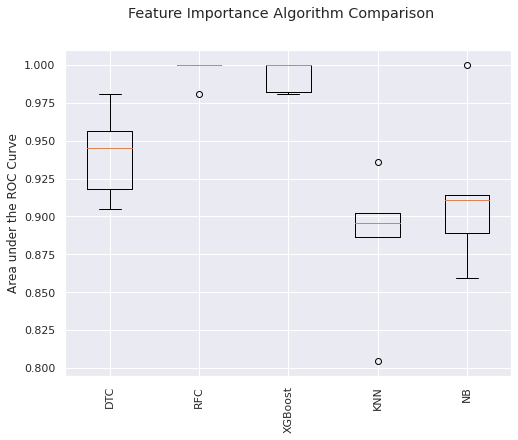

time: 5.49 s (started: 2022-04-07 09:12:51 +00:00)


In [55]:
#evaluate each model in turn
results = []
names = []
scoring = 'precision'
#It is  also known as Subset Selection.
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])
#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),y_train.ravel()):
  
  #'iloc' can be used when the user doesn’t know the index label:
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

for name, model in models: 
  kfold = model_selection.KFold(n_splits = 10)
  training_results = model_selection.cross_val_score(model, X_train_fold, y_train_fold.values, cv = k_fold, scoring = scoring)
  cv_results = model_selection.cross_val_score(model, X_cv_fold, y_cv_fold.values, cv = k_fold, scoring = scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
  print()
#boxplot
print("++Plotting Box Plot with Algorthmic Area under the ROC Curve Comparison++")
fig = plt.figure()
fig.suptitle('Feature Importance Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation = 90)
ax.set_ylabel("Area under the ROC Curve")
plt.show()

DTC: 0.938838 (0.021168)

RFC: 0.953120 (0.042715)

XGBoost: 0.953120 (0.037159)

KNN: 0.816952 (0.052984)

NB: 0.963769 (0.013728)

++Plotting Box Plot with Algorthmic Area under the ROC Curve Comparison++


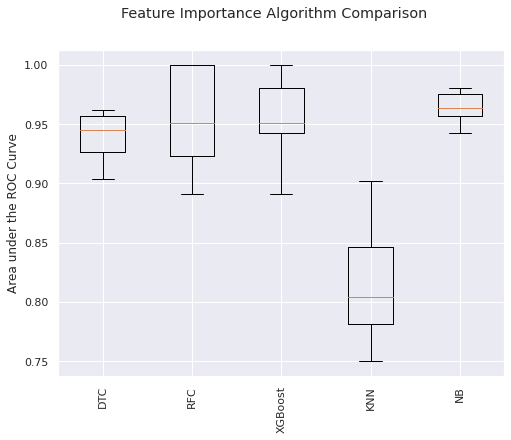

time: 5.51 s (started: 2022-04-07 09:12:56 +00:00)


In [56]:
#evaluate each model in turn
results = []
names = []
scoring = 'recall'
#It is  also known as Subset Selection.
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])
#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),y_train.ravel()):
  
  #'iloc' can be used when the user doesn’t know the index label:
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

for name, model in models: 
  kfold = model_selection.KFold(n_splits = 10)
  training_results = model_selection.cross_val_score(model, X_train_fold, y_train_fold.values, cv = k_fold, scoring = scoring)
  cv_results = model_selection.cross_val_score(model, X_cv_fold, y_cv_fold.values, cv = k_fold, scoring = scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
  print()
#boxplot
print("++Plotting Box Plot with Algorthmic Area under the ROC Curve Comparison++")
fig = plt.figure()
fig.suptitle('Feature Importance Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation = 90)
ax.set_ylabel("Area under the ROC Curve")
plt.show()

DTC: 0.958322 (0.022650)

RFC: 0.999716 (0.000274)

XGBoost: 0.999627 (0.000309)

KNN: 0.932646 (0.028579)

NB: 0.984028 (0.010773)

++Plotting Box Plot with Algorthmic Area under the ROC Curve Comparison++


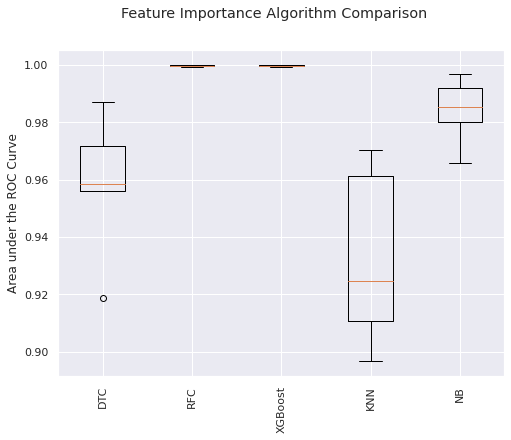

time: 5.35 s (started: 2022-04-07 09:13:02 +00:00)


In [57]:
#evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
#It is  also known as Subset Selection.
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])
#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),y_train.ravel()):
  
  #'iloc' can be used when the user doesn’t know the index label:
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

for name, model in models: 
  kfold = model_selection.KFold(n_splits = 10)
  training_results = model_selection.cross_val_score(model, X_train_fold, y_train_fold.values, cv = k_fold, scoring = scoring)
  cv_results = model_selection.cross_val_score(model, X_cv_fold, y_cv_fold.values, cv = k_fold, scoring = scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
  print()
#boxplot
print("++Plotting Box Plot with Algorthmic Area under the ROC Curve Comparison++")
fig = plt.figure()
fig.suptitle('Feature Importance Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation = 90)
ax.set_ylabel("Area under the ROC Curve")
plt.show()

Now that we have seen that Random Forest Classifier remains the best performing model, we do a final metric evaluation among the remaining 4, wherein, we can already ascertain that XG Boosted Classifier is doing the best among the other 4. 

In [58]:
#Creating the 4 models, fitting them and to calculate a final metrics -- confusion matrices and log losses
## As we already know, that unlike Accuracy, Recall, Precision, AUC-ROC, in order to get the best performance for our model, our intention is to reduce the log loss to its lowest value.
model3 = DecisionTreeClassifier()
model4 = XGBClassifier()
model5 = KNeighborsClassifier()
model6 = GaussianNB()

time: 2.73 ms (started: 2022-04-07 09:13:07 +00:00)


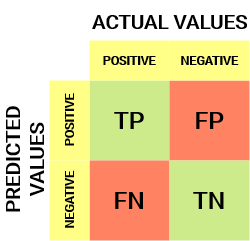

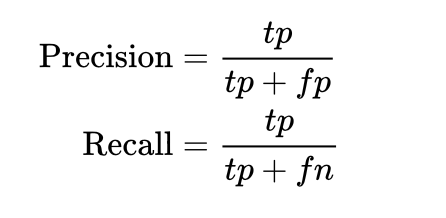

These images acts as a reference to see how good the classification of the respective models is into true positives and true negatives.


In [59]:
model3.fit(X_train_fold, y_train_fold)
model4.fit(X_train_fold, y_train_fold)
model5.fit(X_train_fold, y_train_fold)
model6.fit(X_train_fold, y_train_fold)

GaussianNB()

time: 288 ms (started: 2022-04-07 09:13:07 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

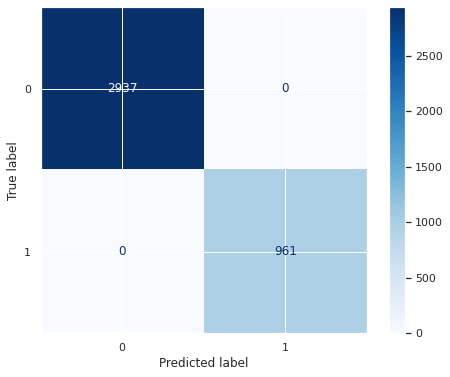

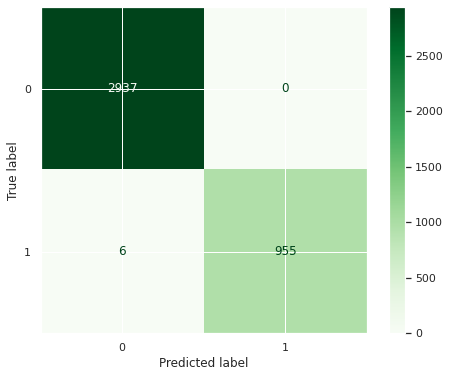

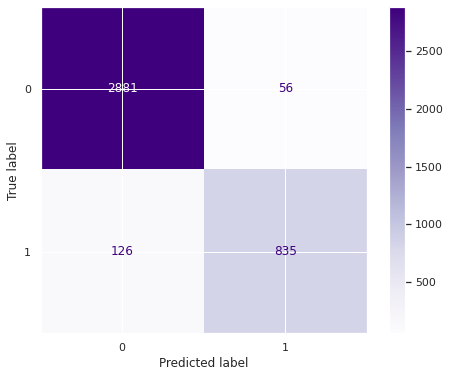

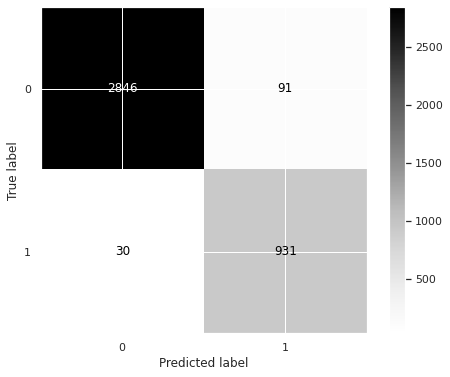

time: 1.25 s (started: 2022-04-07 09:13:07 +00:00)


In [60]:
#We take a look yet again at the Confusion Matrix plots to see how good the prediction of the rest 4 models is:
y_predicted = model3.predict(X_train_fold)
confusion_matrix(y_train_fold,y_predicted)
plot_confusion_matrix(model3,X_train_fold,y_train_fold,cmap='Blues')
y_predicted = model4.predict(X_train_fold)
confusion_matrix(y_train_fold,y_predicted)
plot_confusion_matrix(model4,X_train_fold,y_train_fold,cmap='Greens')
y_predicted = model5.predict(X_train_fold)
confusion_matrix(y_train_fold,y_predicted)
plot_confusion_matrix(model5,X_train_fold,y_train_fold,cmap='Purples')
y_predicted = model6.predict(X_train_fold)
confusion_matrix(y_train_fold,y_predicted)
plot_confusion_matrix(model6,X_train_fold,y_train_fold,cmap='Greys')

With the Confusion Matrices we are able to determine that of these 4 Decision Tree Classifier and XG Boosted Classifier make the best classifications.

Now, finally, we take a look at Log Losses of these models that we just previously fitted. The lower the log losses the better.

In [61]:
from sklearn.metrics import log_loss
#Decision Tree Classifier
loglossTraining = log_loss(y_train_fold, model3.predict_proba(X_train_fold)[:,1])
predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model3.predict_proba(X_cv_fold)
loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
print('Training Log Loss', 'Cross-validation Log Loss')
print(loglossTraining, loglossCV)

Training Log Loss Cross-validation Log Loss
9.992007221626413e-16 0.6028385994820266
time: 16.6 ms (started: 2022-04-07 09:13:09 +00:00)


In [62]:
#XG Boosted Classifier
loglossTraining = log_loss(y_train_fold, model4.predict_proba(X_train_fold)[:,1])
predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model4.predict_proba(X_cv_fold)
loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
print('Training Log Loss', 'Cross-validation Log Loss')
print(loglossTraining, loglossCV)

Training Log Loss Cross-validation Log Loss
0.009130965974484949 0.025381219282799714
time: 30.8 ms (started: 2022-04-07 09:13:09 +00:00)


In [63]:
#K-Neighbors Classifier
loglossTraining = log_loss(y_train_fold, model5.predict_proba(X_train_fold)[:,1])
predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model5.predict_proba(X_cv_fold)
loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
print('Training Log Loss', 'Cross-validation Log Loss')
print(loglossTraining, loglossCV)

Training Log Loss Cross-validation Log Loss
0.09225276329698058 0.7045925939865331
time: 52.4 ms (started: 2022-04-07 09:13:09 +00:00)


In [64]:
#Gaussian Navier Bayes Classifier
loglossTraining = log_loss(y_train_fold, model6.predict_proba(X_train_fold)[:,1])
predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model6.predict_proba(X_cv_fold)
loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
print('Training Log Loss', 'Cross-validation Log Loss')
print(loglossTraining, loglossCV)

Training Log Loss Cross-validation Log Loss
0.2096301416147773 0.24059746284384453
time: 21.8 ms (started: 2022-04-07 09:13:09 +00:00)


One important feature of modeling algorthms like Random Forest or XGBoost is to get the feature importances or coefficients to understand the influence of each of the features on determing the label value or the classification task itself.

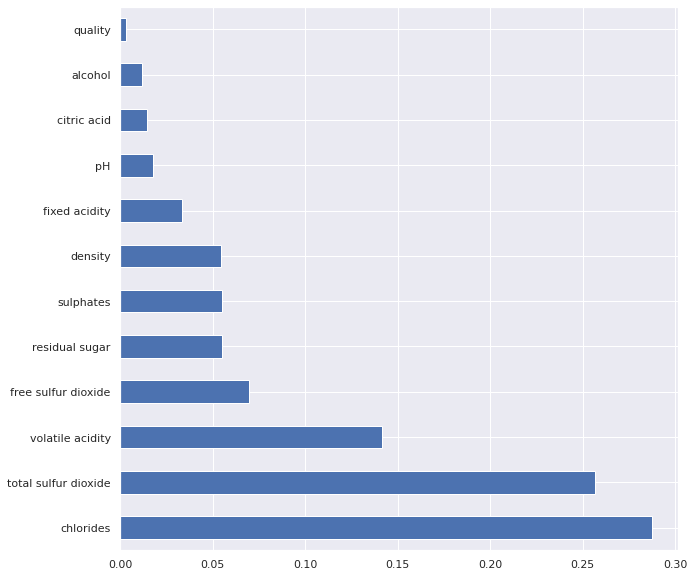

time: 480 ms (started: 2022-04-07 09:13:09 +00:00)


In [65]:
#The feature importances are displayed below for the case of the Random Forest model
feat_importances = pd.Series(model2.feature_importances_, index=dataX.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

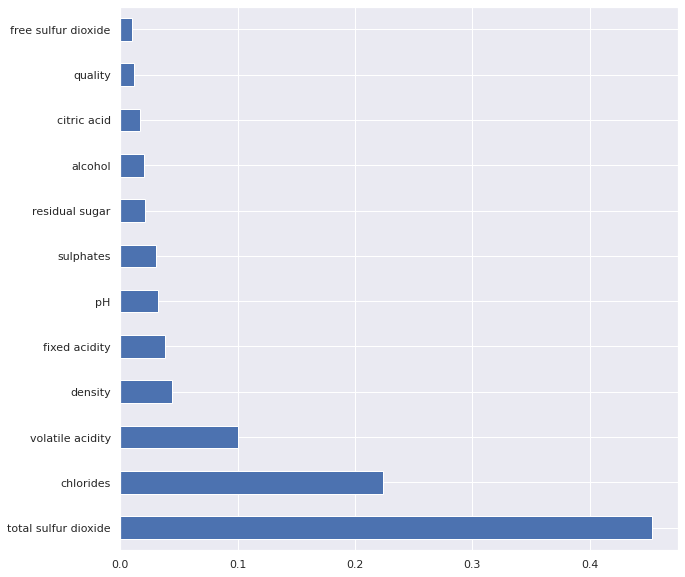

time: 396 ms (started: 2022-04-07 09:13:09 +00:00)


In [66]:
#We use the XG Boost Model to get feature importance scores
feat_importances = pd.Series(model4.feature_importances_, index=X_train_fold.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

One sees from the feature importance ratings of the Random Forest Model as well as XG Boost Classifier Models, that the following features have the best ranking for classification purposes: 
1. Chlorides (note how this feature also had most outliers)
2. Total Sulfur Dioxide
3. Volatile Acidity
4. Denstiy
5. Sulphates
6. Residual Sugar

while Quality and Citric Acid don't have significat impact on white wine and red wine classification.

***Obvious to see that aside from the Random Forester Classifier, XG Boosted Classifier perform the best on our classification dataset. ***

To check if the obtained log loss is reasonable or not. In binary classification (N=2), worst performance can be estimated from the limiting solution (random guess):

1 246 

0 728

Total = 974
So p = 246 / 974 = 0.25
For ideal case, Log loss ~ 0.6 for binary classification

In [67]:
#Calculation prevalence and log loss example
import math
p = 0.25 #= prevalence(i)
N_case = 100 #example case number
N_pos = 100*p
N_neg = 100*(1-p)
log_loss_prevalence = -1/N_case*(math.log(p)*N_pos + math.log(1-p)*N_neg)
log_loss_prevalence

0.5623351446188083

time: 8.69 ms (started: 2022-04-07 09:13:10 +00:00)


Log Loss for the best case scenario here for our specific dataset which has unbalanced classes for type of wine should be about 0.55

Text(0.5, 1.0, 'Variation of the Random Log Loss with Prevalence')

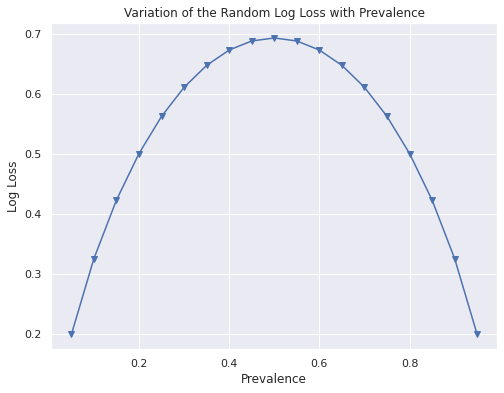

time: 648 ms (started: 2022-04-07 09:13:10 +00:00)


In [68]:
#Lets use the function to generate a graph:
import math
def log_loss_cal(p):
  "Return the log loss of the given prevalence"
  N_case = 100 #example case number
  N_pos = 100*p
  N_neg = 100*(1-p)
  log_loss_prevalence = -1/N_case*(math.log(p)*N_pos + math.log(1-p)*N_neg)
  return log_loss_prevalence


losses_example = []
prevalence = []
for i in range(1,20):
    prevalence.append(i*0.05)
    losses_example.append(log_loss_cal(i*0.05))
#............................
#Plotting the results:
# importing the matplotlib
# see https://matplotlib.org/
#............................
import matplotlib.pyplot as plt
plt.plot(prevalence, losses_example,'-',marker='v', color='b',label="Log Loss")
plt.xlabel("Prevalence")
plt.ylabel("Log Loss")
plt.title("Variation of the Random Log Loss with Prevalence")

## **Anomaly Score**

For this project, since we have 11 dimensions in total in the feature space, we do a short dimesnionality reduction attempt with PCA.


In [69]:
 from sklearn.decomposition import PCA
 def anomalyScore (originalDF, reducedDF):
  #Calculating the sum of the square of residuals:
  loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
  # If you are confused about the summation axis, check the following link:
  # https://www.sharpsightlabs.com/blog/numpy-axes-explained/
  loss = pd.Series(data=loss,index=originalDF.index)
  #Normalizing the results: The idea is to mimic the labels (the best ones will be zero, the worst case will be 1)
  loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
  return loss

time: 6.47 ms (started: 2022-04-07 09:13:10 +00:00)


In [70]:
def plotResults(trueLabels, anomalyScore, returnPreds = False, plotting = True):
  #preparing the dataframe:
  preds = pd.concat([trueLabels, anomalyScore], axis=1)
  preds.columns = ['trueLabel', 'anomalyScore']
  
  #Calculate the precision, recall, thresholds:
  precision, recall, thresholds = \
  precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
  
  #Calculate the average precision:
  average_precision = average_precision_score(preds['trueLabel'],preds['anomalyScore'])
  if plotting:
    #Plotting the results:
    plt.step(recall, precision, color='b', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.1])
    plt.xlim([0.0, 1.0])
    plt.title('Average Precision = {0:0.2f}'.format(average_precision))

  #Do you need the preds?
  if returnPreds==True:
    return preds, average_precision

time: 22.5 ms (started: 2022-04-07 09:13:10 +00:00)


In [71]:
def scatterPlot(x_DF, y_DF, methodName):
  #Filtering the first two columns (first two dimensions):
  df = pd.DataFrame(data=x_DF.loc[:,0:1], index=x_DF.index)
  #Adding the labels:
  df = pd.concat((df,y_DF), axis=1, join="inner")
  #Labeling the columns
  df.columns = ["First Dimension", "Second Dimension", "Label"]
  sns.lmplot(x="First Dimension", y="Second Dimension", hue="Label", data=df, fit_reg=False)
  ax = plt.gca()
  ax.set_title("Visualization of the data segragation using "+methodName)

time: 7.35 ms (started: 2022-04-07 09:13:10 +00:00)


In [72]:
def scatterPlot3D(x_DF, y_DF, methodName):
  #Filtering the first two columns (first three dimensions):
  df = pd.DataFrame(data=x_DF.loc[:,0:2], index=x_DF.index)
  #Adding the labels:
  df = pd.concat((df,y_DF), axis=1, join="inner")
  #Labeling the columns
  df.columns = ["First Dimension", "Second Dimension","Third Dimension", "Label"]

  # Plotting the figure:
  fig = px.scatter_3d(df, x='First Dimension', y='Second Dimension', z='Third Dimension',\
                      color='Label', symbol='Label', opacity=0.7, \
                      color_continuous_scale=px.colors.sequential.Viridis,
                      width = 600,
                      height = 500) 

  #https://plotly.com/python/reference/layout/#layout-transition
  title = "Visualization of the data segragation using "+methodName
  fig.update_layout(title_text=title, showlegend = True, hovermode = False)
  fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
  fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))

  fig.show() 

time: 18.3 ms (started: 2022-04-07 09:13:10 +00:00)


In [73]:
#Anomaly detection with PCA with 11 features
n_components = 11
# Whitening will remove some information from the transformed signal
# but can sometime improve the predictive accuracy of the downstream estimators. 
whiten = False #Default option
#If auto, the solver is selected by a default policy based on X.shape and n_components:
svd_solver = 'auto'
#Random state for reproducibility:
random_state = 2020

pca = PCA(n_components=n_components, whiten=whiten, svd_solver = svd_solver, random_state=random_state)

time: 3.84 ms (started: 2022-04-07 09:13:10 +00:00)


In [74]:
# Model Implementation:

#Fit the model with X and apply the dimensionality reduction on X
X_train_PCA = pca.fit_transform(X_train)
# Organizing the data:
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

#Transform data back to its original space:
X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
# Organizing the data:
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

time: 32.7 ms (started: 2022-04-07 09:13:10 +00:00)


In [75]:
# Variance ratio explained by each of the selected components
print(pca.explained_variance_ratio_)

[9.53501369e-01 4.09792201e-02 4.54015996e-03 4.87253308e-04
 3.36692839e-04 1.33549295e-04 8.68865445e-06 5.73666428e-06
 4.18779731e-06 2.91722355e-06 2.25129751e-07]
time: 5.65 ms (started: 2022-04-07 09:13:10 +00:00)


In [76]:
X_train_PCA.sample(2)

0          1         2         3         4         5         6   \
5522 -10.185691 -12.615064 -3.734938  1.669791  0.184148  0.324370 -0.230569   
1602  72.168800  -0.347688  0.263422  0.394581  0.353607 -0.256818  0.007199   

            7         8         9         10  
5522 -0.205878  0.058362 -0.073318 -0.008393  
1602 -0.086485 -0.086676 -0.031287  0.021442

time: 57.3 ms (started: 2022-04-07 09:13:10 +00:00)


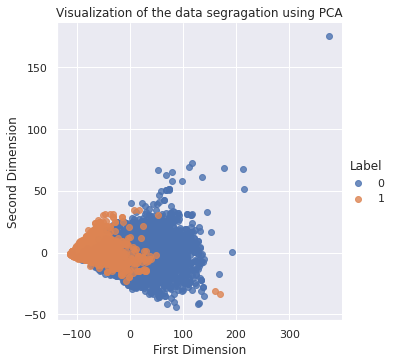

time: 854 ms (started: 2022-04-07 09:13:11 +00:00)


In [77]:
#Calling our scattering function:
scatterPlot(X_train_PCA, y_train, "PCA")

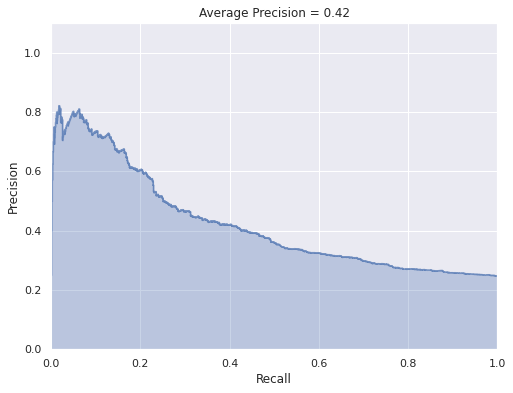

time: 364 ms (started: 2022-04-07 09:13:11 +00:00)


In [78]:
# investigating anomaly score
anomalyScorePCA = anomalyScore(X_train, X_train_PCA_inverse)
predsPCA = plotResults(y_train, anomalyScorePCA, False, True)

As we can see from the average score, the anomaly detection fails with high number of PC, as expected.

Optimizing the number of dimensions for anomaly detection

In [79]:
# Whitening will remove some information from the transformed signal
# but can sometime improve the predictive accuracy of the downstream estimators. 
whiten = False #Default option
#If auto, the solver is selected by a default policy based on X.shape and n_components:
svd_solver = 'auto'
#Random state for reproducibility:
random_state = 42

time: 2.58 ms (started: 2022-04-07 09:13:12 +00:00)


In [80]:
# Model Implementation:

n_components_list = np.arange(1,12,1)
precision_list = []

for n_components in n_components_list:
  #Model description:
  pca = PCA(n_components=n_components, whiten=whiten, svd_solver = svd_solver, random_state=random_state)
  #Fit the model with X and apply the dimensionality reduction on X
  X_train_PCA = pca.fit_transform(X_train)
  # Organizing the data:
  X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

  #Transform data back to its original space:
  X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
  # Organizing the data:
  X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

  anomalyScorePCA = anomalyScore(X_train, X_train_PCA_inverse)
  predsPCA, average_precision_i  = plotResults(y_train, anomalyScorePCA, True, False)
  precision_list.append(average_precision_i)

time: 349 ms (started: 2022-04-07 09:13:12 +00:00)


Text(0.5, 1.0, 'Variation of Average Precision with 11 components')

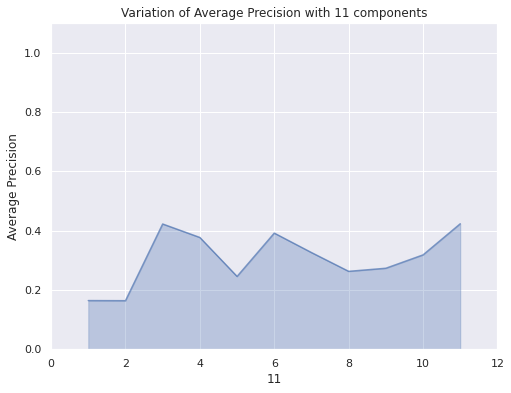

time: 394 ms (started: 2022-04-07 09:13:12 +00:00)


In [81]:
# Plotting Results

plt.plot(n_components_list, precision_list, color='b', alpha=0.7)
plt.fill_between(n_components_list, precision_list, alpha=0.3, color='b')
plt.xlabel('11')
plt.ylabel('Average Precision')
plt.ylim([0.0, 1.1])
plt.xlim([0.0, 12.0])
plt.title('Variation of Average Precision with 11 components')

So we see that the PCA score improves with 3, 6 and 11 components / features. 

In [82]:
n_components_best = n_components_list[precision_list.index(max(precision_list))]
print('Best number of component is ',n_components_best) #so we essentially have to use the whole set of features for the best performance

Best number of component is  11
time: 3.21 ms (started: 2022-04-07 09:13:13 +00:00)


In [83]:
n_components_worst = n_components_list[precision_list.index(min(precision_list))]
print('Worst number of component for anomaly detection is ',n_components_worst)

Worst number of component for anomaly detection is  2
time: 3.2 ms (started: 2022-04-07 09:13:13 +00:00)


**From this evaluation, we can carry foward with our modeling with the complete set of features for the best performance!**

## **II. Final Testing for Classification**

# We took the Random Forest Classifier forward to the next testing phase since for all intents and purposes, Random Forest Classifier has performed best on every metric.

In [84]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3731            7.1              0.22         0.32           16.90      0.056   
1651            6.2              0.16         0.33            1.10      0.057   
5060            6.7              0.24         0.30            3.85      0.042   
1303            8.0              0.28         0.44            1.80      0.081   
474            10.5              0.28         0.51            1.70      0.080   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3731                 49.0                 158.0  0.99980  3.37       0.38   
1651                 21.0                  82.0  0.99100  3.32       0.46   
5060                105.0                 179.0  0.99189  3.04       0.59   
1303                 28.0                  68.0  0.99501  3.36       0.66   
474                  10.0                  24.0  0.99820  3.20       0.89   

      alcohol  quality  
3731      9.6        6  
1651     10.9        7  
5060     11.3        8  
1303     11.2        5  
474       9.4        6

time: 29.4 ms (started: 2022-04-07 09:13:13 +00:00)


In [85]:
#Lists for storing scores
trainingScores = []
testScores = []

#It is  also known as Subset Selection.
predictionsBasedOnKFoldsTestRF = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

model_new = RFC

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, test_index in k_fold.split(np.zeros(len(X_train)),y_train.ravel()):
  
  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold, X_test = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
  y_train_fold, y_test = y_train.iloc[train_index], y_train.iloc[test_index]

  #Fitting the model according to given data:
  #Note that model refers to FRC.
  model_new.fit(X_train_fold, y_train_fold)

  # Log loss, aka logistic loss or cross-entropy loss.This is the loss function 

  # We will fisrt look log loss in the training dataset. 
  loglossTraining = log_loss(y_train_fold,model_new.predict_proba(X_train_fold)[:,1])
  #Saving our analysis on the list:
  trainingScores.append(loglossTraining)

  #Lets see how good it is on CV dataset:
  predictionsBasedOnKFoldsTestRF.loc[X_test.index,:] =model_new.predict_proba(X_test)
  loglossTest = log_loss(y_test,predictionsBasedOnKFoldsTestRF.loc[X_test.index,1])
  #Saving our analysis on the list:
  testScores.append(loglossTest)
  
  #printing the results:
  print('Training Log Loss: ', loglossTraining)
  print('Test Log Loss: ', loglossTest)
  

Training Log Loss:  0.009685721395760951
Test Log Loss:  0.025313889347522673
Training Log Loss:  0.009453502242480418
Test Log Loss:  0.06273852910569573
Training Log Loss:  0.008828879016095945
Test Log Loss:  0.0409253525070632
Training Log Loss:  0.009389123828620892
Test Log Loss:  0.028546644952011414
Training Log Loss:  0.009280567382588345
Test Log Loss:  0.03243656471392393
time: 6.15 s (started: 2022-04-07 09:13:13 +00:00)


In [86]:
loglossTest = log_loss(y_test,predictionsBasedOnKFoldsTestRF.loc[X_cv_fold.index,1])
print(loglossTest)

0.03243656471392393
time: 7.32 ms (started: 2022-04-07 09:13:19 +00:00)


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 1.00')

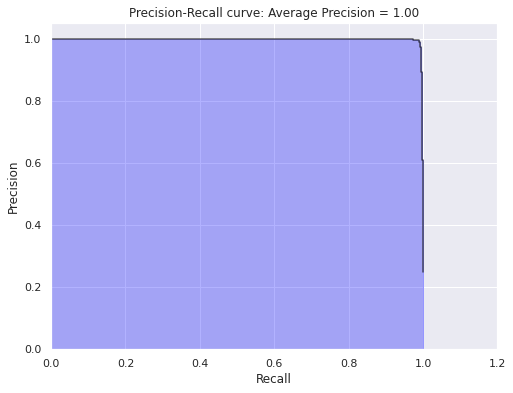

time: 360 ms (started: 2022-04-07 09:13:19 +00:00)


In [87]:
preds_test = pd.concat([y_train,predictionsBasedOnKFoldsTestRF.loc[:,1]], axis=1)
preds_test.columns = ['trueLabel','prediction']
predictionsTestSetRFC = preds_test.copy()
precision, recall, thresholds = precision_recall_curve(preds_test['trueLabel'],preds_test['prediction'])
average_precision = average_precision_score(preds_test['trueLabel'],preds_test['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.2])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

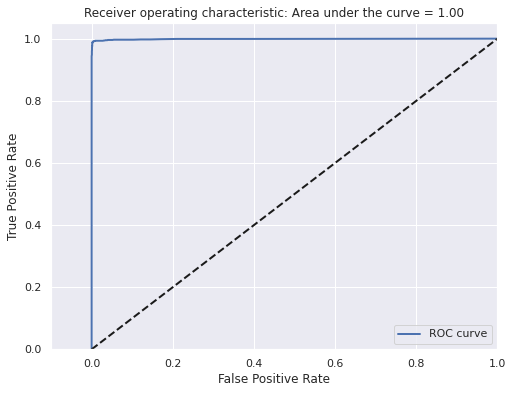

time: 288 ms (started: 2022-04-07 09:13:19 +00:00)


In [88]:
fpr, tpr, thresholds = roc_curve(preds_test['trueLabel'],preds_test['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [89]:
#Using sklearn classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
predictions_rf = model2.predict(X_test)
# Calculate the Accuracy Score.
rf_accuracy = accuracy_score(y_test, predictions_rf)
print(rf_accuracy)

0.9928131416837782
time: 111 ms (started: 2022-04-07 09:13:19 +00:00)


In [90]:
# Show the classification report. 
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       728
           1       1.00      0.97      0.99       246

    accuracy                           0.99       974
   macro avg       1.00      0.99      0.99       974
weighted avg       0.99      0.99      0.99       974

time: 13.8 ms (started: 2022-04-07 09:13:20 +00:00)


Repeating this procedure with limited features from the feature ranking procedure: 



In [91]:
X_train_new = X_train.copy()
X_train_new = X_train_new.drop(['pH'], axis = 1)
X_train_new = X_train_new.drop(['alcohol'], axis = 1)
X_train_new = X_train_new.drop(['quality'], axis = 1)
X_train_new = X_train_new.drop(['fixed acidity'], axis = 1)
X_train_new = X_train_new.drop(['citric acid'], axis = 1)
X_train_new = X_train_new.drop(['free sulfur dioxide'], axis = 1)
X_train_new.head()



volatile acidity  residual sugar  chlorides  total sulfur dioxide  \
3731              0.22           16.90      0.056                 158.0   
1651              0.16            1.10      0.057                  82.0   
5060              0.24            3.85      0.042                 179.0   
1303              0.28            1.80      0.081                  68.0   
474               0.28            1.70      0.080                  24.0   

      density  sulphates  
3731  0.99980       0.38  
1651  0.99100       0.46  
5060  0.99189       0.59  
1303  0.99501       0.66  
474   0.99820       0.89

time: 27.4 ms (started: 2022-04-07 09:13:20 +00:00)


In [92]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 1303 to 4859
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         974 non-null    float64
 1   volatile acidity      974 non-null    float64
 2   citric acid           974 non-null    float64
 3   residual sugar        974 non-null    float64
 4   chlorides             974 non-null    float64
 5   free sulfur dioxide   974 non-null    float64
 6   total sulfur dioxide  974 non-null    float64
 7   density               974 non-null    float64
 8   pH                    974 non-null    float64
 9   sulphates             974 non-null    float64
 10  alcohol               974 non-null    float64
 11  quality               974 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 98.9 KB
time: 14 ms (started: 2022-04-07 09:13:20 +00:00)


In [93]:
#Lists for storing scores
trainingScores = []
testScores = []

#It is  also known as Subset Selection.
predictionsBasedOnKFoldsTestRF = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

model_new = RFC

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, test_index in k_fold.split(np.zeros(len(X_train_new)),y_train.ravel()):
  
  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold, X_test = X_train_new.iloc[train_index,:], X_train_new.iloc[test_index,:]
  y_train_fold, y_test = y_train.iloc[train_index], y_train.iloc[test_index]

  #Fitting the model according to given data:
  #Note that model refers to FRC.
  model_new.fit(X_train_fold, y_train_fold)

  # Log loss, aka logistic loss or cross-entropy loss.This is the loss function 

  # We will fisrt look log loss in the training dataset. 
  loglossTraining = log_loss(y_train_fold,model_new.predict_proba(X_train_fold)[:,1])
  #Saving our analysis on the list:
  trainingScores.append(loglossTraining)

  #Lets see how good it is on CV dataset:
  predictionsBasedOnKFoldsTestRF.loc[X_test.index,:] =model_new.predict_proba(X_test)
  loglossTest = log_loss(y_test,predictionsBasedOnKFoldsTestRF.loc[X_test.index,1])
  #Saving our analysis on the list:
  testScores.append(loglossTest)
  
  #printing the results:
  print('Training Log Loss: ', loglossTraining)
  print('Test Log Loss: ', loglossTest)

Training Log Loss:  0.008643034729872667
Test Log Loss:  0.021240262017088903
Training Log Loss:  0.00807026894606086
Test Log Loss:  0.05833140207700522
Training Log Loss:  0.007472504192613881
Test Log Loss:  0.04504493362171383
Training Log Loss:  0.00836445378993559
Test Log Loss:  0.024842175700021767
Training Log Loss:  0.007902900713583539
Test Log Loss:  0.027938128342020915
time: 5.55 s (started: 2022-04-07 09:13:20 +00:00)


In [94]:
loglossTest = log_loss(y_test,predictionsBasedOnKFoldsTestRF.loc[X_cv_fold.index,1])
print(loglossTest)

0.027938128342020915
time: 9.63 ms (started: 2022-04-07 09:13:25 +00:00)


Important observation: taking the best performing 6 features from the rankings, we see a drop in the log loss which means that this actually improves the probability of prediction.

In [95]:
#Using sklearn classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
predictions_rf = model2.predict(X_test)
# Calculate the Accuracy Score.
rf_accuracy = accuracy_score(y_test, predictions_rf)
print(rf_accuracy)

0.9928131416837782
time: 111 ms (started: 2022-04-07 09:13:25 +00:00)


In [96]:
# Show the classification report. 
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       728
           1       1.00      0.97      0.99       246

    accuracy                           0.99       974
   macro avg       1.00      0.99      0.99       974
weighted avg       0.99      0.99      0.99       974

time: 13.5 ms (started: 2022-04-07 09:13:25 +00:00)


Final Step: now, we are at the end of our analysis, we can differentiate the predicted values and actual value.



In [97]:
x_predict = list(model2.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

predicted_values  original_values
1303                 1                1
474                  1                1
4304                 0                0
5137                 0                0
567                  1                1
6320                 0                0
2055                 0                0
6384                 0                0
4812                 0                0
2969                 0                0
291                  1                1
5519                 0                0
1393                 1                1
38                   1                1
4220                 0                0
2831                 0                0
5426                 0                0
1223                 1                1
3121                 0                0
2111                 0                0

time: 119 ms (started: 2022-04-07 09:13:25 +00:00)


## **3. Using a simple linear regression method to predict the quality of both white and red wines while doing a real time comparison of feature influence. It would be at the end interesting to note if the features that influence classification the most are also the same ones that influence regression-based prediction of quality.**

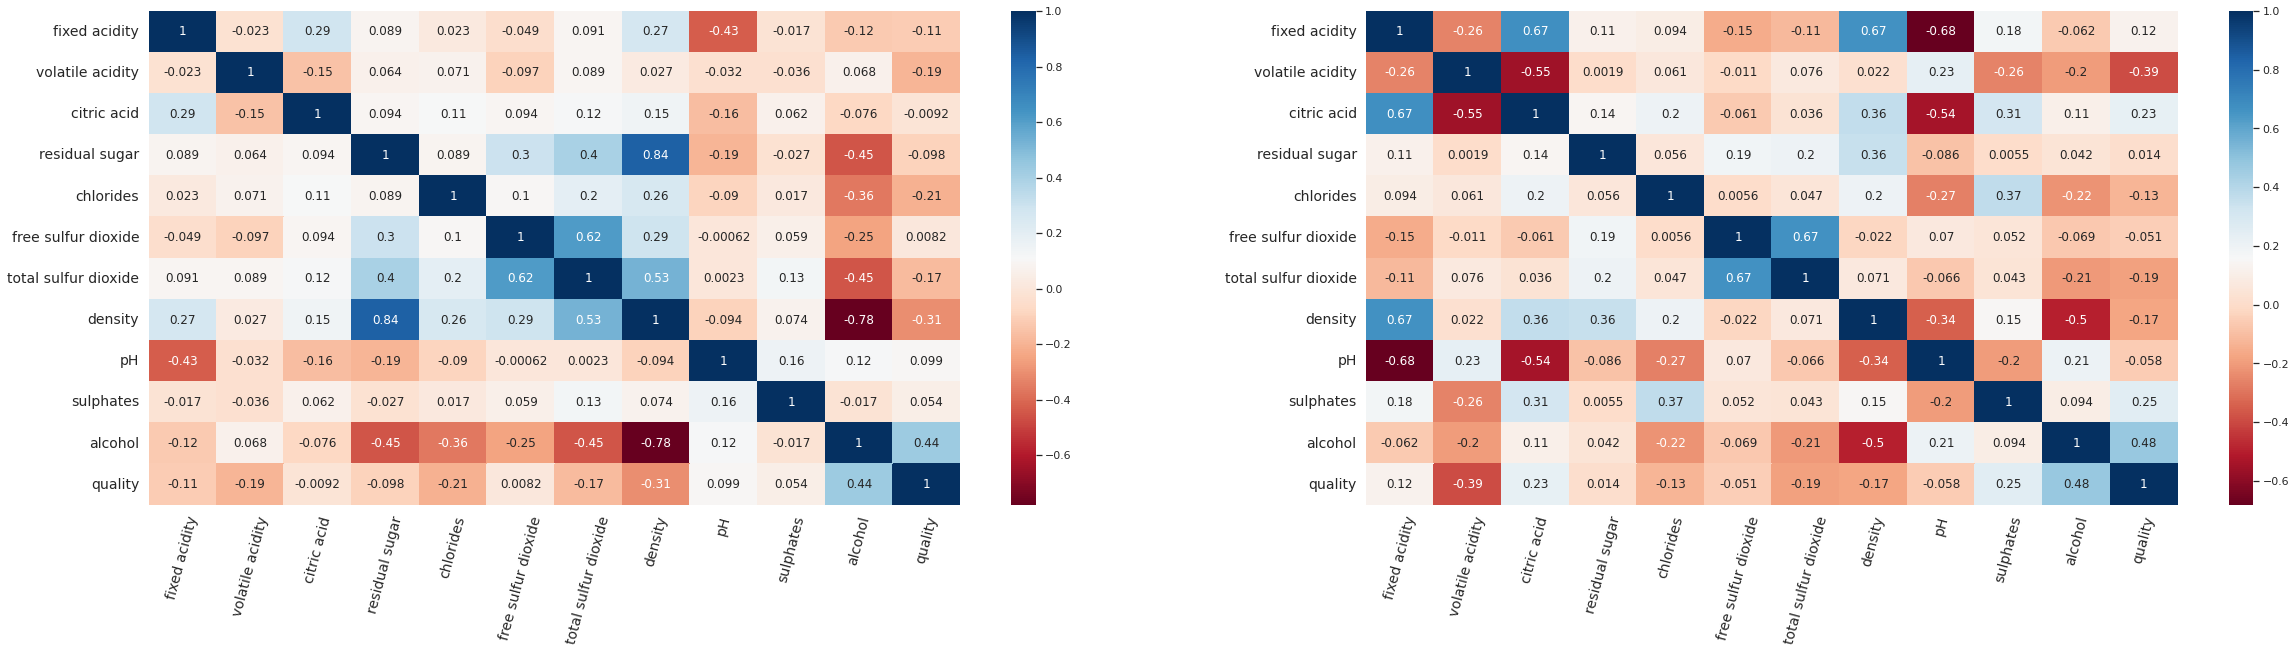

time: 2.02 s (started: 2022-04-07 09:13:26 +00:00)


In [98]:
correlationMatrix_w = pd.DataFrame(wine_w).corr() 
fig = plt.figure(figsize = (40,20))
w = fig.add_subplot(221)
plt.xticks(range(wine_w.shape[1]), wine_w.columns, fontsize=14, rotation=75)
plt.yticks(range(wine_w.shape[1]), wine_w.columns, fontsize=14)
sns.heatmap(correlationMatrix_w, annot=True,cmap='RdBu')
correlationMatrix_r = pd.DataFrame(wine_r).corr() 
w = fig.add_subplot(222)
plt.xticks(range(wine_r.shape[1]), wine_r.columns, fontsize=14, rotation=75)
plt.yticks(range(wine_r.shape[1]), wine_r.columns, fontsize=14)
sns.heatmap(correlationMatrix_r, annot=True,cmap='RdBu')
plt.show()

Residual Sugar and Density have a correlational relation. 

In [99]:
correlationMatrix_w.style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


time: 55 ms (started: 2022-04-07 09:13:28 +00:00)


In [100]:
correlationMatrix_r.style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


time: 46.8 ms (started: 2022-04-07 09:13:28 +00:00)


Now, we attempt to drop features that have too low correlation, in our case <0.05

In [101]:
threshold = 0.05
cor_criterion = abs(correlationMatrix_w['quality'].drop('quality'))
relevant_features = cor_criterion[cor_criterion>threshold]
irrelevant_features = cor_criterion[cor_criterion<threshold]
relevant_features = relevant_features.reset_index()
irrelevant_features = irrelevant_features.reset_index()
relevant_features.columns = ['Variables', 'Correlation']
irrelevant_features.columns = ['Variables', 'Correlation']
relevant_features = relevant_features.sort_values(by='Correlation', ascending=False)
irrelevant_features = irrelevant_features.sort_values(by='Correlation', ascending=False)
print("Relevant Features")
print(relevant_features)
print("Irrelevant Features")
print(irrelevant_features)



Relevant Features
              Variables  Correlation
8               alcohol     0.435575
5               density     0.307123
3             chlorides     0.209934
1      volatile acidity     0.194723
4  total sulfur dioxide     0.174737
0         fixed acidity     0.113663
6                    pH     0.099427
2        residual sugar     0.097577
7             sulphates     0.053678
Irrelevant Features
             Variables  Correlation
0          citric acid     0.009209
1  free sulfur dioxide     0.008158
time: 25.7 ms (started: 2022-04-07 09:13:28 +00:00)


In [102]:
correlations_r = wine_r.corr()['quality'].drop('quality')
print(correlations_r)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64
time: 8.13 ms (started: 2022-04-07 09:13:28 +00:00)


In [103]:
threshold = 0.05
cor_criterion = abs(correlationMatrix_r['quality'].drop('quality'))
relevant_features = cor_criterion[cor_criterion>threshold]
irrelevant_features = cor_criterion[cor_criterion<threshold]
relevant_features = relevant_features.reset_index()
irrelevant_features = irrelevant_features.reset_index()
relevant_features.columns = ['Variables', 'Correlation']
irrelevant_features.columns = ['Variables', 'Correlation']
relevant_features = relevant_features.sort_values(by='Correlation', ascending=False)
irrelevant_features = irrelevant_features.sort_values(by='Correlation', ascending=False)
print("Relevant Features")
print(relevant_features)
print("Irrelevant Features")
print(irrelevant_features)

Relevant Features
              Variables  Correlation
9               alcohol     0.476166
1      volatile acidity     0.390558
8             sulphates     0.251397
2           citric acid     0.226373
5  total sulfur dioxide     0.185100
6               density     0.174919
3             chlorides     0.128907
0         fixed acidity     0.124052
7                    pH     0.057731
4   free sulfur dioxide     0.050656
Irrelevant Features
        Variables  Correlation
0  residual sugar     0.013732
time: 30.5 ms (started: 2022-04-07 09:13:28 +00:00)


There are no categorical variables. Each feature is a number. This is clearly a regression problem. 
Given the set of values for features, we have to predict the quality of wine. finding correlation of each feature with our target variable - quality

In [104]:
#Initializing new datasets for regression problem, that is, we have one white wine dataset to predict quality and one red wine dataset to predict quality of that
wine_w_new = wine_w.copy().drop(['type'],axis=1)
wine_r_new = wine_r.copy().drop(['type'],axis=1)
wine_w_reg = wine_w_new.drop(['quality'],axis=1)
wine_r_reg = wine_r_new.drop(['quality'],axis=1)
wine_w_reg.info()
wine_r_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --

In [105]:
#creating quality label / target values for white wine dataset and red wine dataset
wine_w_Y = wine_w_new['quality'].copy()
wine_r_Y = wine_r_new['quality'].copy()

time: 2.89 ms (started: 2022-04-07 09:13:28 +00:00)


In [106]:
#Rescaling the data
featuresToScale_r = wine_r_reg.columns
featuresToScale_w = wine_w_reg.columns
scaled = pp.StandardScaler(copy=True)
wine_w_reg.loc[:,featuresToScale_w] = scaled.fit_transform(wine_w_reg[featuresToScale_w])
wine_w_reg.describe()
wine_r_reg.loc[:,featuresToScale_r] = scaled.fit_transform(wine_r_reg[featuresToScale_r])
wine_r_reg.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.599000e+03      1.599000e+03  1.599000e+03    1.599000e+03   
mean    3.435512e-16      1.699704e-16  4.335355e-16   -1.905223e-16   
std     1.000313e+00      1.000313e+00  1.000313e+00    1.000313e+00   
min    -2.137045e+00     -2.278280e+00 -1.391472e+00   -1.162696e+00   
25%    -7.007187e-01     -7.699311e-01 -9.293181e-01   -4.532184e-01   
50%    -2.410944e-01     -4.368911e-02 -5.636026e-02   -2.403750e-01   
75%     5.057952e-01      6.266881e-01  7.652471e-01    4.341614e-02   
max     4.355149e+00      5.877976e+00  3.743574e+00    9.195681e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.599000e+03         1.599000e+03          1.599000e+03  1.599000e+03   
mean   3.836136e-16         1.432042e-16          1.289532e-16 -3.482795e-14   
std    1.000313e+00         1.000313e+00          1.000313e+00  1.000313e+00   
min   -1.603945e+00        -1.422500e+00         -1.230584e+00 -3.538731e+00   
25%   -3.712290e-01        -8.487156e-01         -7.440403e-01 -6.077557e-01   
50%   -1.799455e-01        -1.793002e-01         -2.574968e-01  1.760083e-03   
75%    5.384542e-02         4.901152e-01          4.723184e-01  5.768249e-01   
max    1.112703e+01         5.367284e+00          7.375154e+00  3.680055e+00   

                 pH     sulphates       alcohol  
count  1.599000e+03  1.599000e+03  1.599000e+03  
mean   3.002879e-15  7.639596e-16  9.437243e-16  
std    1.000313e+00  1.000313e+00  1.000313e+00  
min   -3.700401e+00 -1.936507e+00 -1.898919e+00  
25%   -6.551405e-01 -6.382196e-01 -8.663789e-01  
50%   -7.212705e-03 -2.251281e-01 -2.093081e-01  
75%    5.759223e-01  4.240158e-01  6.354971e-01  
max    4.528282e+00  7.918677e+00  4.202453e+00

time: 80.9 ms (started: 2022-04-07 09:13:28 +00:00)


## **Testing Phase I: Baseline Models for Regression Task**

In [107]:
wine_w_reg.info()
wine_r_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --

In [108]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

time: 1.51 ms (started: 2022-04-07 09:13:28 +00:00)


In [109]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(wine_w_reg,wine_w_Y, test_size=0.20,random_state=42)

time: 7.25 ms (started: 2022-04-07 09:13:28 +00:00)


In [110]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(wine_r_reg, wine_r_Y, test_size=0.20,random_state=42)

time: 5.81 ms (started: 2022-04-07 09:13:28 +00:00)


In [111]:
X_train_w.shape, X_test_w.shape

((3918, 11), (980, 11))

time: 5.28 ms (started: 2022-04-07 09:13:28 +00:00)


In [112]:
X_train_r.shape, X_test_r.shape

((1279, 11), (320, 11))

time: 5.29 ms (started: 2022-04-07 09:13:28 +00:00)


Model Approach I: Linear Regression without regularization

In [113]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
trainingScores_r = []
cvScores_r = []

#DataFrame is a 2-dimensional labeled data structure. You can think of it like a spreadsheet.
#Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame.
#It is  also known as Subset Selection.
predictionsBasedOnKFolds_reds = pd.DataFrame(data=[],index=y_train_r.index,columns=[0,1])
model_LR_red = LinearRegression()

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_r)),y_train_r.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_r, X_cv_fold_r = X_train_r.iloc[train_index,:], X_train_r.iloc[cv_index,:]
  y_train_fold_r, y_cv_fold_r = y_train_r.iloc[train_index], y_train_r.iloc[cv_index]

  #Fitting the model according to given data:
  #Note that model refers to Lasso.
  model_LR_red.fit(X_train_fold_r, y_train_fold_r)
  
  # We will first look in the training dataset:
  scoreTraining_r = model_LR_red.score(X_train_fold_r, y_train_fold_r)
  #Saving our analysis on the list:
  trainingScores_r.append(scoreTraining_r)

  #Lets see how good it is on CV dataset:
  scoreCV_r = model_LR_red.score(X_cv_fold_r, y_cv_fold_r)
  #Saving our analysis on the list:
  cvScores_r.append(scoreCV_r)
  
  #printing the results:
  print('Training Score for reds: ', scoreTraining_r)
  print('CV Score for reds: ', scoreCV_r)

#Lets see the overall score for the entire training set (1127)
scoreLR_red = model_LR_red.score(X_train_r,y_train_r)
print('-----------------------------------')
print('Linear Regression Score for Red Wine: ', scoreLR_red)
print('-----------------------------------')

Training Score for reds:  0.3587465195513232
CV Score for reds:  0.2676639207240714
Training Score for reds:  0.3448868270123754
CV Score for reds:  0.3514211687198582
Training Score for reds:  0.3541873229871494
CV Score for reds:  0.3134792179445365
Training Score for reds:  0.34221653627925175
CV Score for reds:  0.3520531200390077
Training Score for reds:  0.3506117909125318
CV Score for reds:  0.3284849896628089
-----------------------------------
Linear Regression Score for Red Wine:  0.3469592221565919
-----------------------------------
time: 188 ms (started: 2022-04-07 09:13:28 +00:00)


In [114]:
from sklearn.linear_model import LinearRegression 
trainingScores_w = []
cvScores_w = []

#DataFrame is a 2-dimensional labeled data structure. You can think of it like a spreadsheet.
#Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame.
#It is  also known as Subset Selection.
predictionsBasedOnKFolds_white = pd.DataFrame(data=[],index=y_train_w.index,columns=[0,1])
model_LR_white = LinearRegression()

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_w)),y_train_w.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_w, X_cv_fold_w = X_train_w.iloc[train_index,:], X_train_w.iloc[cv_index,:]
  y_train_fold_w, y_cv_fold_w = y_train_w.iloc[train_index], y_train_w.iloc[cv_index]

  #Fitting the model according to given data:
  #Note that model refers to Lasso.
  model_LR_white.fit(X_train_fold_w, y_train_fold_w)
  
  # We will first look in the training dataset:
  scoreTraining_w = model_LR_white.score(X_train_fold_w, y_train_fold_w)
  #Saving our analysis on the list:
  trainingScores_w.append(scoreTraining_w)

  #Lets see how good it is on CV dataset:
  scoreCV_w = model_LR_white.score(X_cv_fold_w, y_cv_fold_w)
  #Saving our analysis on the list:
  cvScores_w.append(scoreCV_w)
  
  #printing the results:
  print('Training Score for whites: ', scoreTraining_w)
  print('CV Score for whites: ', scoreCV_w)
  

#Lets see the overall score for the entire training set (1127)
scoreLR_white = model_LR_white.score(X_train_w,y_train_w)
print('-----------------------------------')
print('Linear Regression Score for White Wine: ', scoreLR_white)
print('-----------------------------------')

Training Score for whites:  0.2842916500610514
CV Score for whites:  0.26165980164038916
Training Score for whites:  0.2841556681335059
CV Score for whites:  0.27136570196507825
Training Score for whites:  0.28994385133821066
CV Score for whites:  0.2567249375241899
Training Score for whites:  0.29328192002149767
CV Score for whites:  0.24993267170606337
Training Score for whites:  0.2749102212868869
CV Score for whites:  0.31451277802147937
-----------------------------------
Linear Regression Score for White Wine:  0.28343378599083247
-----------------------------------
time: 227 ms (started: 2022-04-07 09:13:28 +00:00)


CV Score or  Cost function for white wine quality is lower, hence the likelihood of prediction for white wine is higher. 

In [115]:
# displaying coefficients of each feature in red wine dataset
coeffecients = pd.DataFrame(model_LR_red.coef_, X_train_fold_r.columns)
coeffecients.columns = ['Coefficient'] 
print(coeffecients)

                      Coefficient
fixed acidity            0.035152
volatile acidity        -0.170422
citric acid             -0.029168
residual sugar           0.002002
chlorides               -0.096649
free sulfur dioxide      0.060625
total sulfur dioxide    -0.121289
density                 -0.013793
pH                      -0.060345
sulphates                0.134217
alcohol                  0.307571
time: 9.37 ms (started: 2022-04-07 09:13:29 +00:00)


In [116]:
# displaying coefficients of each feature in white wine dataset
coeffecients = pd.DataFrame(model_LR_white.coef_, X_train_fold_w.columns)
coeffecients.columns = ['Coefficient'] 
print(coeffecients)

                      Coefficient
fixed acidity            0.035053
volatile acidity        -0.200707
citric acid             -0.011774
residual sugar           0.343614
chlorides               -0.004617
free sulfur dioxide      0.074266
total sulfur dioxide     0.000768
density                 -0.323138
pH                       0.080662
sulphates                0.061915
alcohol                  0.301561
time: 11 ms (started: 2022-04-07 09:13:29 +00:00)


The way linear regression essentially predicts label values based on the linear equation made up feature variables, coefficients and label / target y value. Referring to equation below: 

y (wine quality) = 0.03(fixed acidity) - 0.19(volatile acidity) -0.01 (citric acid) + 0.36 (residual sugar) - 0.004 (chlorides) + 0.07 (free sulfur dioxide) ..and so on.

In [117]:
# Test Problem:
test_data = wine_w_new.sample(1,random_state=11).copy()
test_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2521            6.5              0.18         0.33             1.4      0.029   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2521                 35.0                 138.0  0.99114  3.36        0.6   

      alcohol  quality  
2521     11.5        7

time: 25.9 ms (started: 2022-04-07 09:13:29 +00:00)


In [118]:
# Preparing the input data:
x_testing = wine_w_new.sample(1,random_state=11).copy().drop(['quality'],axis=1)

time: 3.93 ms (started: 2022-04-07 09:13:29 +00:00)


In [119]:
model_LR_red.predict(x_testing)

array([-5.4080878])

time: 8.1 ms (started: 2022-04-07 09:13:29 +00:00)


Simple Linear Regression unfortunately doesn't predict the correct value of quality for red wine. 

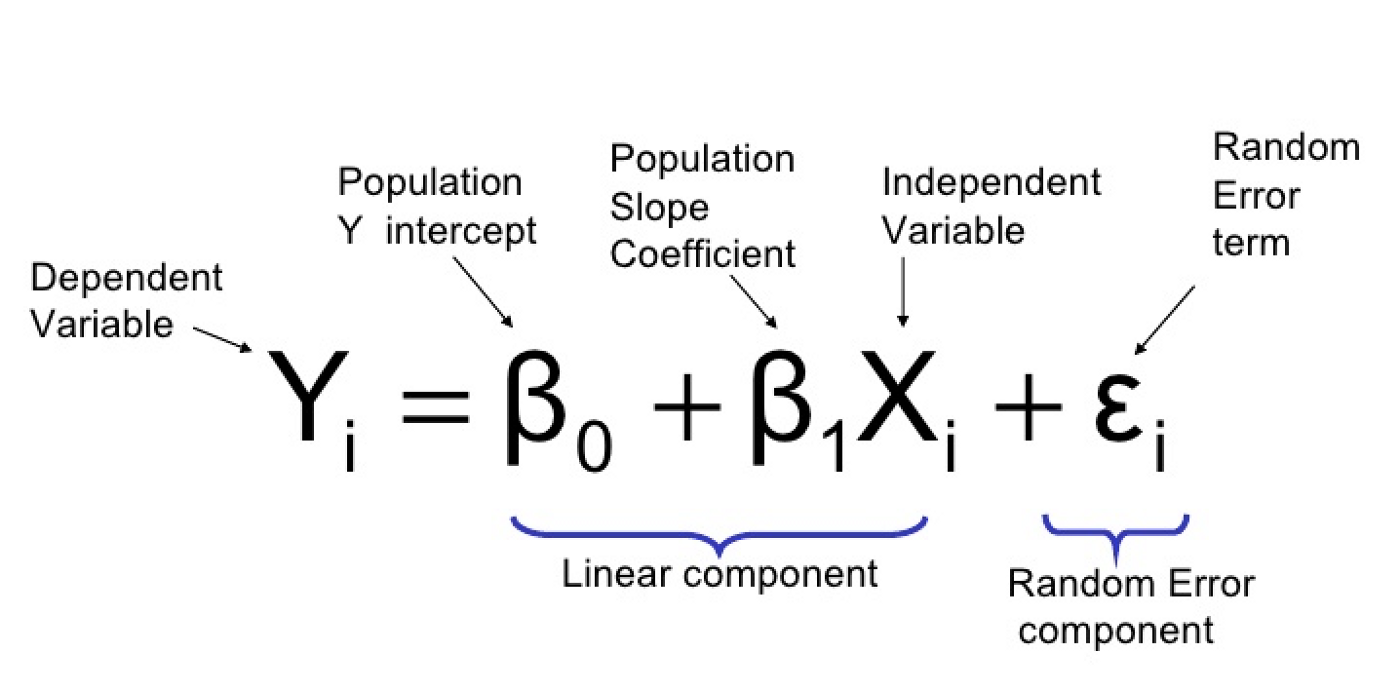

Now we will try the same linear regression but with Lasso Regularization to see if there is a performance improvement. 

In [120]:
# Hyperparameters:
alpha=1.0 #alpha = 0 is equivalent to an ordinary least square but it is not recommended to put zero here!
normalize=False #
max_iter=2000
tol=0.00001
random_state = 2020
selection='cyclic' # (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.

lasso = Lasso(alpha=alpha, normalize = normalize, max_iter = max_iter, tol = tol, random_state = random_state, selection = selection)

time: 5.7 ms (started: 2022-04-07 09:13:29 +00:00)


In [121]:
trainingScores_r = []
cvScores_r = []

#DataFrame is a 2-dimensional labeled data structure. You can think of it like a spreadsheet.
#Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame.
#It is  also known as Subset Selection.
predictionsBasedOnKFolds_reds = pd.DataFrame(data=[],index=y_train_r.index,columns=[0,1])
model_Lasso_red = lasso 

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_r)),y_train_r.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_r, X_cv_fold_r = X_train_r.iloc[train_index,:], X_train_r.iloc[cv_index,:]
  y_train_fold_r, y_cv_fold_r = y_train_r.iloc[train_index], y_train_r.iloc[cv_index]

  #Fitting the model according to given data:
  #Note that model refers to Lasso.
  model_Lasso_red.fit(X_train_fold_r, y_train_fold_r)
  
  # We will first look in the training dataset:
  scoreTraining_r = model_Lasso_red.score(X_train_fold_r, y_train_fold_r)
  #Saving our analysis on the list:
  trainingScores_r.append(scoreTraining_r)

  #Lets see how good it is on CV dataset:
  scoreCV_r = model_Lasso_red.score(X_cv_fold_r, y_cv_fold_r)
  #Saving our analysis on the list:
  cvScores_r.append(scoreCV_r)
  
  #printing the results:
  print('Training Score for reds: ', scoreTraining_r)
  print('CV Score for reds: ', scoreCV_r)

#Lets see the overall score for the entire training set (1127)
scoreLR_red = model_Lasso_red.score(X_train_r,y_train_r)
print('-----------------------------------')
print('Lasso Regression Score for Red Wine: ', scoreLR_red)
print('-----------------------------------')


Training Score for reds:  0.0
CV Score for reds:  -0.01452992358494365
Training Score for reds:  0.0
CV Score for reds:  -0.0010319585901108486
Training Score for reds:  0.0
CV Score for reds:  -0.004029824310913588
Training Score for reds:  0.0
CV Score for reds:  -0.003028758212794802
Training Score for reds:  0.0
CV Score for reds:  -0.008023094196335512
-----------------------------------
Lasso Regression Score for Red Wine:  -0.0003253968818797137
-----------------------------------
time: 183 ms (started: 2022-04-07 09:13:29 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

In [122]:
from sklearn.linear_model import LinearRegression 
trainingScores_w = []
cvScores_w = []

#DataFrame is a 2-dimensional labeled data structure. You can think of it like a spreadsheet.
#Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame.
#It is  also known as Subset Selection.
predictionsBasedOnKFolds_white = pd.DataFrame(data=[],index=y_train_w.index,columns=[0,1])
model_Lasso_white = lasso

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_w)),y_train_w.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_w, X_cv_fold_w = X_train_w.iloc[train_index,:], X_train_w.iloc[cv_index,:]
  y_train_fold_w, y_cv_fold_w = y_train_w.iloc[train_index], y_train_w.iloc[cv_index]

  #Fitting the model according to given data:
  #Note that model refers to Lasso.
  model_Lasso_white.fit(X_train_fold_w, y_train_fold_w)
  
  # We will first look in the training dataset:
  scoreTraining_w = model_Lasso_white.score(X_train_fold_w, y_train_fold_w)
  #Saving our analysis on the list:
  trainingScores_w.append(scoreTraining_w)

  #Lets see how good it is on CV dataset:
  scoreCV_w = model_Lasso_white.score(X_cv_fold_w, y_cv_fold_w)
  #Saving our analysis on the list:
  cvScores_w.append(scoreCV_w)
  
  #printing the results:
  print('Training Score for whites: ', scoreTraining_w)
  print('CV Score for whites: ', scoreCV_w)
  

#Lets see the overall score for the entire training set (1127)
scoreLR_white = model_Lasso_white.score(X_train_w,y_train_w)
print('-----------------------------------')
print('Linear Regression Score for White Wine: ', scoreLR_white)
print('-----------------------------------')

Training Score for whites:  0.0
CV Score for whites:  -0.0017171098653618877
Training Score for whites:  0.0
CV Score for whites:  -0.015054157666494428
Training Score for whites:  0.0
CV Score for whites:  -0.0008407442683313615
Training Score for whites:  0.0
CV Score for whites:  -9.130031152659868e-06
Training Score for whites:  0.0
CV Score for whites:  -0.0020500632729472112
-----------------------------------
Linear Regression Score for White Wine:  -8.560737815677122e-05
-----------------------------------
time: 166 ms (started: 2022-04-07 09:13:29 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

In [123]:
# Test Problem:
test_data = wine_w_new.sample(1,random_state=11).copy()
test_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2521            6.5              0.18         0.33             1.4      0.029   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2521                 35.0                 138.0  0.99114  3.36        0.6   

      alcohol  quality  
2521     11.5        7

time: 47.9 ms (started: 2022-04-07 09:13:29 +00:00)


In [124]:
# Preparing the input data:
x_testing = wine_w_new.sample(1,random_state=11).copy().drop(['quality'],axis=1)

time: 9.41 ms (started: 2022-04-07 09:13:29 +00:00)


In [125]:
model_Lasso_red.predict(x_testing)

array([5.86315789])

time: 15.4 ms (started: 2022-04-07 09:13:29 +00:00)


On testing Lasso, we don't get the correct value of wine quality of red wine. 




# **!! From here on out, we do an analysis and discussions about the red wine quality dataset. **

To improve prediction, we attempt Elastic Net Regression Model

In [126]:
# Hyperparameters:

alpha=1.0 
l1_ratio=0.5 
normalize=False #
max_iter=2000
tol=0.00001
random_state = 2020
selection='cyclic' # (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.

elastic_net = ElasticNet(alpha=alpha, l1_ratio = l1_ratio, normalize = normalize, max_iter = max_iter, tol = tol, random_state = random_state, selection = selection)

time: 6.12 ms (started: 2022-04-07 09:13:29 +00:00)


In [127]:
trainingScores_r = []
cvScores_r = []

#DataFrame is a 2-dimensional labeled data structure. You can think of it like a spreadsheet.
#Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame.
#It is  also known as Subset Selection.
predictionsBasedOnKFolds_reds = pd.DataFrame(data=[],index=y_train_r.index,columns=[0,1])
elastic_net_red = elastic_net 

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_r)),y_train_r.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_r, X_cv_fold_r = X_train_r.iloc[train_index,:], X_train_r.iloc[cv_index,:]
  y_train_fold_r, y_cv_fold_r = y_train_r.iloc[train_index], y_train_r.iloc[cv_index]

  #Fitting the model according to given data:
  #Note that model refers to Lasso.
  elastic_net_red.fit(X_train_fold_r, y_train_fold_r)
  
  # We will first look in the training dataset:
  scoreTraining_r = elastic_net_red.score(X_train_fold_r, y_train_fold_r)
  #Saving our analysis on the list:
  trainingScores_r.append(scoreTraining_r)

  #Lets see how good it is on CV dataset:
  scoreCV_r = elastic_net_red.score(X_cv_fold_r, y_cv_fold_r)
  #Saving our analysis on the list:
  cvScores_r.append(scoreCV_r)
  
  #printing the results:
  print('Training Score for reds: ', scoreTraining_r)
  print('CV Score for reds: ', scoreCV_r)

#Lets see the overall score for the entire training set (1127)
scoreEN_red = elastic_net_red.score(X_train_r,y_train_r)
print('-----------------------------------')
print('Elastic Net Score for Red Wine: ', scoreEN_red)
print('-----------------------------------')

Training Score for reds:  0.0
CV Score for reds:  -0.01452992358494365
Training Score for reds:  0.0
CV Score for reds:  -0.0010319585901108486
Training Score for reds:  0.0
CV Score for reds:  -0.004029824310913588
Training Score for reds:  0.0
CV Score for reds:  -0.003028758212794802
Training Score for reds:  0.0
CV Score for reds:  -0.008023094196335512
-----------------------------------
Elastic Net Score for Red Wine:  -0.0003253968818797137
-----------------------------------
time: 165 ms (started: 2022-04-07 09:13:29 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

The gap between training loss and cv loss has increased further and the model is underfitting, which isn't ideal. 

Tuning Elastic Net with Grid Search, just for red wine dataset right now

In [128]:
# Looking for the best alpha and ratio value:
alphas = np.logspace(-4, 0, 10)
l1_ratios = np.logspace(-3,0,10)
grid = {'alpha': alphas,'l1_ratio':l1_ratios}

#Setting the search:
# For scoring: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
gridSearch = GridSearchCV(elastic_net, grid, scoring='r2', cv=k_fold, refit=True)
gridSearch.fit(X_train_r, y_train_r)

#Saving results:
results = gridSearch.cv_results_

print('Best R^2 obtained:', gridSearch.best_score_)
print('alpha value for the best case:', gridSearch.best_estimator_.alpha)
print('l1_ratio value for the best case:', gridSearch.best_estimator_.l1_ratio)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Best R^2 obtained: 0.3263070468179882
alpha value for the best case: 0.12915496650148828
l1_ratio value for the best case: 0.001
time: 5.09 s (started: 2022-04-07 09:13:29 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

The result we get is: 

Best R^2 obtained: **0.3263070468179882**

alpha value for the best case: **0.12915496650148828**

l1_ratio value for the best case: **0.001**

In [129]:
#Saving the best parameters back to model:
elastic_net = gridSearch.best_estimator_

#Alpha and l1 values of the model:
elastic_net.alpha, elastic_net.l1_ratio

(0.12915496650148828, 0.001)

time: 11.6 ms (started: 2022-04-07 09:13:34 +00:00)


In [130]:
test_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2521            6.5              0.18         0.33             1.4      0.029   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2521                 35.0                 138.0  0.99114  3.36        0.6   

      alcohol  quality  
2521     11.5        7

time: 48.2 ms (started: 2022-04-07 09:13:35 +00:00)


In [131]:
elastic_net.predict(x_testing)

array([-3.99338276])

time: 12.8 ms (started: 2022-04-07 09:13:35 +00:00)


The prediction this time, got closer to the real value compared to Lasso

Now, taking a look at the learning curve, which will be more usefull later when tune and run our model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default va

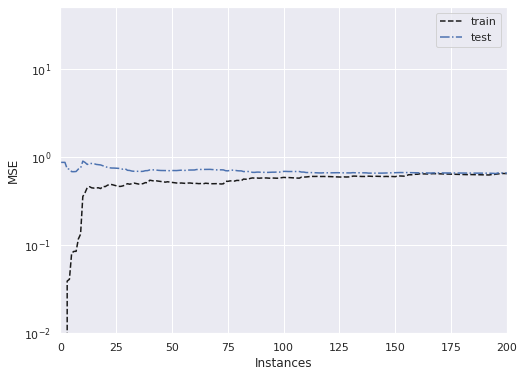

time: 12.5 s (started: 2022-04-07 09:13:35 +00:00)


In [132]:
# Defining our function to run the model and see the evolution of error>
def plot_learning_curves(model, X_train, X_test, y_train, y_test):
  #Empty lists for data storage:
  train_errors, val_errors = [], []
  # Remember, we will look at the error as model is trained with more data.
  # So we will make predictions with increasing instance sizes for both the training set and test set.
  for m in range(1, len(X_train)):
    #Model fitting:
    model.fit(X_train[:m], y_train[:m])
    #Predicting for the training data:
    y_train_predict = model.predict(X_train[:m])
    #Predicting for the test data:
    y_test_predict = model.predict(X_test)
    #Saving the errors for the plot for a given data size:
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_test_predict))
  
  # Plotting the results:
  plt.plot(np.sqrt(train_errors), "k--", linewidth=1.5, label="train")
  plt.plot(np.sqrt(val_errors), "b-.", linewidth=1.5, label="test")
  plt.legend()
  plt.xlim(0, 200),  plt.ylim(0.01,50)
  plt.yscale("log")
  plt.xlabel("Instances"),  plt.ylabel("MSE")
  
# Calling our function to draw the learning curve for elastic net:
plot_learning_curves(elastic_net,X_train_r, X_test_r, y_train_r, y_test_r)

As it is clearly visible in the learning curve, the training and testing mean square error converges over time. Which shows, decent modeling so far. 

## **Testing Phase II: Model Development**

In [133]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
#base model 1
def build_model():
  #Here we will use Sequential API
  model = Sequential()
  #Defining the first hidden layer:
  #Note that we are using input_shape for the first layer.
  model.add(layers.Dense(12, activation='relu', input_shape=(X_train_fold_r.shape[1],)))
  #Defining the second hidden layer:
  model.add(layers.Dense(12, activation='relu'))
  #Here we are defining the output layer. A single unit and no activation (it will be a linear layer).
  #Since this is a regression problem, we need to to predict a single continuous value. 
  #Applying an activation function would constrain the range the output can take; 
  #for instance, if you applied a sigmoid activation function to the last layer,
  #the network could only learn to predict values between 0 and 1 (good for binary classification).
  model.add(layers.Dense(1))
  #we will compile the network with the MSE loss function.
  #(we will look at the square of the difference between the predictions and the targets).
  # We will also monitor another metric during the training, that is the mean absolute error(MAE).
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  
  return model
  

time: 14.4 ms (started: 2022-04-07 09:13:47 +00:00)


In [134]:
num_epochs = 50
#The number of epochs determines the number of times the training occurs 
#over the entire dataset we pass into the neural network. 
batch_size = 10

time: 1.67 ms (started: 2022-04-07 09:13:47 +00:00)


In [135]:
trainingScores = []
cvScores = []

#DataFrame is a 2-dimensional labeled data structure. You can think of it like a spreadsheet.
#Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame.
#It is  also known as Subset Selection.
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train_r.index,columns=[0,1])

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_r)),y_train_r.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_r, X_cv_fold_r = X_train_r.iloc[train_index,:], X_train_r.iloc[cv_index,:]
  y_train_fold_r, y_cv_fold_r = y_train_r.iloc[train_index], y_train_r.iloc[cv_index]

  #Fitting the model according to given data:
  #Into the fit method, we will pass in the input matrix X and the target y (labels).

  #Building the Keras model:
  model = build_model()

  #Training step: Trains the model in silent mode (verbose = 0)
  history = model.fit(X_train_fold_r, y_train_fold_r, epochs=num_epochs, batch_size=batch_size, validation_data=(X_cv_fold_r, y_cv_fold_r) , verbose=0)

  #Evaluating the training pperformance:
  val_mse, val_mae = model.evaluate(X_train_fold_r, y_train_fold_r, verbose=0)
  trainingScores.append(val_mse)
  print('--------------------------------------------------------')
  print('Training MAE: ', val_mae)

  #Evaluating the CV pperformance:
  val_mse, val_mae = model.evaluate(X_cv_fold_r, y_cv_fold_r, verbose=0)
  cvScores.append(val_mse)
  print('CV MAE: ', val_mae)

#Lets see the overall score for the entire training set (1127)
####Modified###
val_mse_total, val_mae_total = model.evaluate(X_train_fold_r, y_train_fold_r, verbose=0)
print('--------------------------------------------------------')
print('MAE for the entire training dataset: ', val_mae_total)
print('--------------------------------------------------------')


--------------------------------------------------------
Training MAE:  0.4850075840950012
CV MAE:  0.4936816692352295
--------------------------------------------------------
Training MAE:  0.474955290555954
CV MAE:  0.5037046074867249
--------------------------------------------------------
Training MAE:  0.462291955947876
CV MAE:  0.5176811814308167
--------------------------------------------------------
Training MAE:  0.4804282784461975
CV MAE:  0.5200619101524353
--------------------------------------------------------
Training MAE:  0.476154625415802
CV MAE:  0.5473600625991821
--------------------------------------------------------
MAE for the entire training dataset:  0.476154625415802
--------------------------------------------------------
time: 1min 5s (started: 2022-04-07 09:13:47 +00:00)


In [136]:
h = pd.DataFrame(history.history)
h.sample(5)

loss       mae  val_loss   val_mae
34  0.411583  0.485384  0.461319  0.539328
38  0.401499  0.480453  0.453738  0.541122
16  0.536779  0.552224  0.554756  0.580847
9   0.880618  0.712568  0.830177  0.730665
37  0.405100  0.480184  0.459671  0.546023

time: 14.9 ms (started: 2022-04-07 09:14:53 +00:00)


In [137]:
h['epoch'] = history.epoch

time: 3.14 ms (started: 2022-04-07 09:14:53 +00:00)


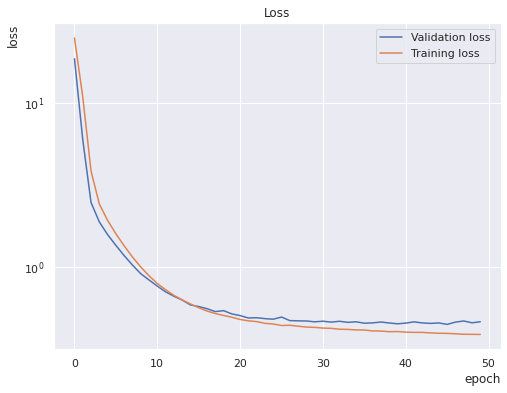

time: 513 ms (started: 2022-04-07 09:14:53 +00:00)


In [138]:
plt.plot(h['epoch'], h['val_loss'], '-', label='Validation loss')
plt.plot(h['epoch'], h['loss'], '-', label='Training loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')

This model starts underfitting over epochs. This could potentially be fixed using early stopping. We will investigate in the later part of this project.

In [139]:
results = cross_val_score(elastic_net_red, X_train_fold_r, y_train_fold_r)
print( results.mean(), results.std())

-0.008261077103730674 0.006535704252207593
time: 41.5 ms (started: 2022-04-07 09:14:53 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Text(0, 0.5, 'Count')

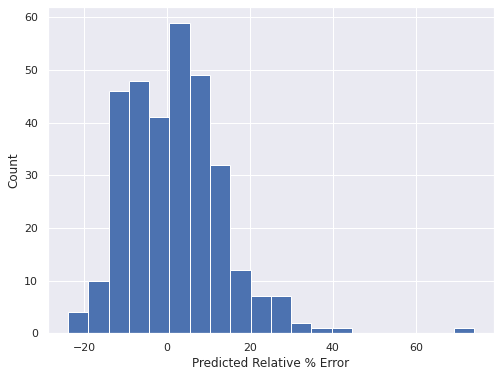

time: 522 ms (started: 2022-04-07 09:14:53 +00:00)


In [140]:
# Calling trained model for predictions:
Y_test_predictions = pd.Series(model.predict(X_test_r).flatten(),index=X_test_r.index)

# Calculating the error variations:
error_nn = (Y_test_predictions - y_test_r)/y_test_r*100
plt.hist(error_nn, bins=20)
plt.xlabel('Predicted Relative % Error')
plt.ylabel('Count')

Majority of the relative error is concentrated around 0, which is promising. 

In [141]:
Y_test_predictions.head(670)

803     5.286871
124     5.305046
350     5.407408
682     5.343667
1326    5.589508
          ...   
1259    5.962432
1295    5.691571
1155    5.128304
963     6.303137
704     5.144809
Length: 320, dtype: float32

time: 9.64 ms (started: 2022-04-07 09:14:54 +00:00)


In [142]:
test_data = wine_w_new.iloc[254]
test_data

fixed acidity             5.8000
volatile acidity          0.2400
citric acid               0.3900
residual sugar            1.5000
chlorides                 0.0540
free sulfur dioxide      37.0000
total sulfur dioxide    158.0000
density                   0.9932
pH                        3.2100
sulphates                 0.5200
alcohol                   9.3000
quality                   6.0000
Name: 254, dtype: float64

time: 11.8 ms (started: 2022-04-07 09:14:54 +00:00)


In [143]:
model.save("tt_winequality.h5")

time: 32.2 ms (started: 2022-04-07 09:14:54 +00:00)


In [144]:
#base model set 2
def build_model_base():
  #Here we will use Sequential API
  model = Sequential()
  model.add(layers.Dense(12, activation='relu', input_shape=(X_train_r.shape[1],)))
  #model.add(layers.Dense(12, activation='relu'))
  model.add(layers.Dense(12, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

def build_model_lower():
  #Here we will use Sequential API
  model = Sequential()
  model.add(layers.Dense(12, activation='relu', input_shape=(X_train_r.shape[1],)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

def build_model_higher():
  #Here we will use Sequential API
  model = Sequential()
  model.add(layers.Dense(12, activation='relu', input_shape=(X_train_r.shape[1],)))
  model.add(layers.Dense(12, activation='relu'))
  model.add(layers.Dense(12, activation='relu'))
  model.add(layers.Dense(12, activation='relu'))
  model.add(layers.Dense(12, activation='relu'))
  model.add(layers.Dense(12, activation='relu'))
  model.add(layers.Dense(12, activation='relu'))
  model.add(layers.Dense(12, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

time: 22.7 ms (started: 2022-04-07 09:14:54 +00:00)


In [145]:
#Hyperparameters
num_epochs = 50
#The number of epochs determines the number of times the training occurs 
#over the entire dataset we pass into the neural network. 
batch_size = 10

time: 2.06 ms (started: 2022-04-07 09:14:54 +00:00)


In [146]:
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train_r.index,columns=[0,1])

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_r)),y_train_r.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_r, X_cv_fold_r = X_train_r.iloc[train_index,:], X_train_r.iloc[cv_index,:]
  y_train_fold_r, y_cv_fold_r = y_train_r.iloc[train_index], y_train_r.iloc[cv_index]

  #Fitting the model according to given data:
  #Into the fit method, we will pass in the input matrix X and the target y (labels).

  #Building the Keras models:
  model_base = build_model_base()
  model_lower = build_model_lower()
  model_higher = build_model_higher()

  #Training step: Trains the model in silent mode (verbose = 0)
  ##----------Changed!----------##
  # Training and CV scores will be saved by the model on the history:
  history_base = model_base.fit(X_train_fold_r, y_train_fold_r, epochs=num_epochs, batch_size=batch_size, validation_data=(X_cv_fold_r, y_cv_fold_r) ,verbose=0)
  history_lower = model_lower.fit(X_train_fold_r, y_train_fold_r, epochs=num_epochs, batch_size=batch_size, validation_data=(X_cv_fold_r, y_cv_fold_r) ,verbose=0)
  history_higher = model_higher.fit(X_train_fold_r, y_train_fold_r, epochs=num_epochs, batch_size=batch_size, validation_data=(X_cv_fold_r, y_cv_fold_r) ,verbose=0)
  
  #Evaluating the training pperformance:
  val_mse_b, val_mae_b = model_base.evaluate(X_train_fold_r, y_train_fold_r, verbose=0)
  val_mse_l, val_mae_l = model_lower.evaluate(X_train_fold_r, y_train_fold_r, verbose=0)
  val_mse_h, val_mae_h = model_higher.evaluate(X_train_fold_r, y_train_fold_r, verbose=0)
  trainingScores.append(val_mse_b)
  trainingScores.append(val_mse_l)
  trainingScores.append(val_mse_h)
  print('--------------------------------------------------------')
  print('Training MAE: ', 'Base' ,val_mae_b, 'Lower' ,val_mae_l, 'Higher',val_mae_h)

  #Evaluating the CV pperformance:
  val_mse_b, val_mae_b = model_base.evaluate(X_cv_fold_r, y_cv_fold_r, verbose=0)
  val_mse_l, val_mae_l = model_lower.evaluate(X_cv_fold_r, y_cv_fold_r, verbose=0)
  val_mse_h, val_mae_h = model_higher.evaluate(X_cv_fold_r, y_cv_fold_r, verbose=0)
  cvScores.append(val_mse_b)
  cvScores.append(val_mse_l)
  cvScores.append(val_mse_h)
  print('CV MAE: ', 'Base' ,val_mae_b, 'Lower' ,val_mae_l, 'Higher',val_mae_h)

#Lets see the overall score for the entire training set (1127)
####Modified###
val_mse_total_b, val_mae_total_b = model_base.evaluate(X_train_fold_r, y_train_fold_r, verbose=0)
val_mse_total_l, val_mae_total_l = model_lower.evaluate(X_train_fold_r, y_train_fold_r, verbose=0)
val_mse_total_h, val_mae_total_h = model_higher.evaluate(X_train_fold_r, y_train_fold_r, verbose=0)
print('--------------------------------------------------------')
print('MAE for the entire training dataset: ', val_mae_total_b, val_mae_total_l, val_mae_total_h)
print('--------------------------------------------------------')
#Lets see the overall score for the entire training set (1127)
####Modified###
val_mse_total_b_cv, val_mae_total_b_cv = model_base.evaluate(X_cv_fold_r, y_cv_fold_r, verbose=0)
val_mse_total_l_cv, val_mae_total_l_cv = model_lower.evaluate(X_cv_fold_r, y_cv_fold_r, verbose=0)
val_mse_total_h_cv, val_mae_total_h_cv = model_higher.evaluate(X_cv_fold_r, y_cv_fold_r, verbose=0)
print('--------------------------------------------------------')
print('MAE for the entire cross validation dataset: ', val_mae_total_b_cv, val_mae_total_l_cv, val_mae_total_h_cv)
print('--------------------------------------------------------')


--------------------------------------------------------
Training MAE:  Base 0.4737112820148468 Lower 0.4762483835220337 Higher 0.43558359146118164
CV MAE:  Base 0.5187289714813232 Lower 0.5149785876274109 Higher 0.4974392056465149
--------------------------------------------------------
Training MAE:  Base 0.47682496905326843 Lower 0.4849804937839508 Higher 0.4658774435520172
CV MAE:  Base 0.47391006350517273 Lower 0.5091941952705383 Higher 0.5412607789039612
--------------------------------------------------------
Training MAE:  Base 0.4768368601799011 Lower 0.488491952419281 Higher 0.47825631499290466
CV MAE:  Base 0.5315894484519958 Lower 0.543250560760498 Higher 0.6114740371704102
--------------------------------------------------------
Training MAE:  Base 0.4751485586166382 Lower 0.49790048599243164 Higher 0.4742566645145416
CV MAE:  Base 0.521124541759491 Lower 0.5159240961074829 Higher 0.5263358354568481
--------------------------------------------------------
Training MAE:  Ba

In [147]:
#Lets look into the history recorded:
hist_base = pd.DataFrame(history_base.history)
hist_base['epoch'] = history_base.epoch
hist_lower = pd.DataFrame(history_lower.history)
hist_lower['epoch'] = history_lower.epoch
hist_higher = pd.DataFrame(history_higher.history)
hist_higher['epoch'] = history_higher.epoch

time: 10.4 ms (started: 2022-04-07 09:18:16 +00:00)


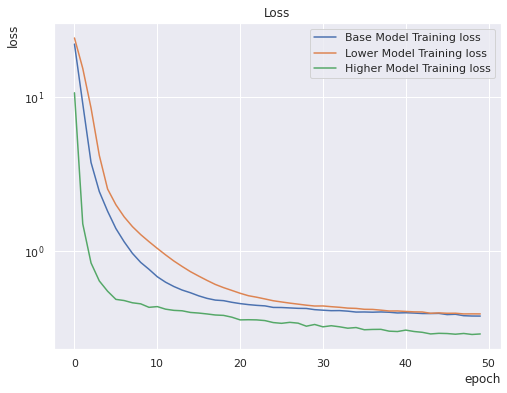

time: 516 ms (started: 2022-04-07 09:18:16 +00:00)


In [148]:
# Defining our function to see the evolution of training error:
plt.plot(hist_base['epoch'], hist_base['loss'], '-', label='Base Model Training loss')
plt.plot(hist_lower['epoch'], hist_lower['loss'], '-', label='Lower Model Training loss')
plt.plot(hist_higher['epoch'], hist_higher['loss'], '-', label='Higher Model Training loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')



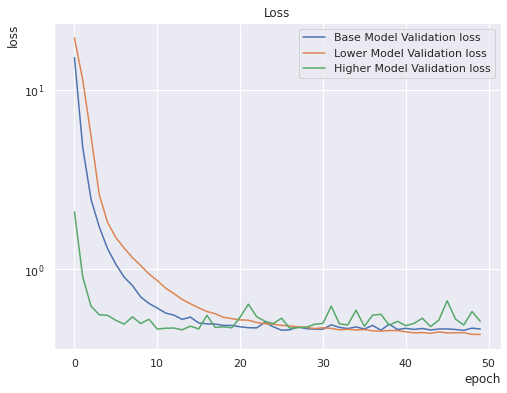

time: 1.06 s (started: 2022-04-07 09:18:16 +00:00)


In [149]:
# Defining our function to see the evolution of validation error:
plt.plot(hist_base['epoch'], hist_base['val_loss'], '-', label='Base Model Validation loss')
plt.plot(hist_lower['epoch'], hist_lower['val_loss'], '-', label='Lower Model Validation loss')
plt.plot(hist_higher['epoch'], hist_higher['val_loss'], '-', label='Higher Model Validation loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')

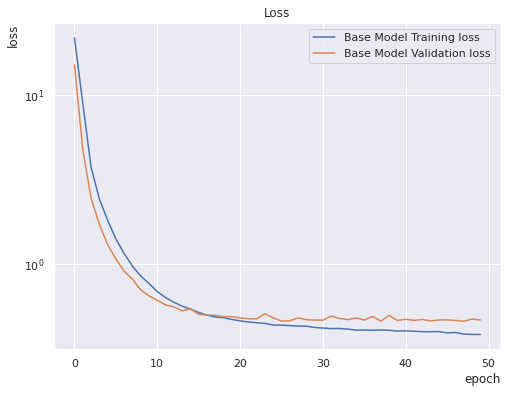

time: 483 ms (started: 2022-04-07 09:18:18 +00:00)


In [150]:
# Defining our function to see the evolution of validation error:
plt.plot(hist_base['epoch'], hist_base['loss'], '-', label='Base Model Training loss')
plt.plot(hist_base['epoch'], hist_base['val_loss'], '-', label='Base Model Validation loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')

Base Model 'Lower' performs consistently well and has the lower gap between training and CV loss. Also, unlike the 'Higher', 'Lower' is much more stable and fewer vibrations. 

In this case, I create two combinations of the 'Base' model, one with 3 layers and one with 2 layers to see if that makes 'Base' model perform better than 'Lower' model. In this context, we see that when 'Base' model has three layers, it performs worse than 'Lower' model. But on removing one layer and leaving it at two layers, its performance went above 'Lower' model's. We are gauging performance here by comparing the difference between the training loss and CV loss (lower the difference in losses, better the performance) and by seeing which model causes the lowest loss. 

In the next step, we create a small feature space with 11 features and spinning off the size of 'Base' model with two layers and comparing it a model of three layers. 

In [151]:
#base model set 3 with 11 features from anomaly detection earlier in the classification task
def build_model_11_large():
  #Here we will use Sequential API
  model = Sequential()
  model.add(layers.Dense(11, activation='relu', input_shape=(X_train_r.shape[1],)))
  model.add(layers.Dense(11, activation='relu'))
  model.add(layers.Dense(11, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

def build_model_11_small():
  #Here we will use Sequential API
  model = Sequential()
  model.add(layers.Dense(11, activation='relu', input_shape=(X_train_r.shape[1],)))
  model.add(layers.Dense(11, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

time: 16.2 ms (started: 2022-04-07 09:18:18 +00:00)


In [152]:
#Hyperparameters
num_epochs = 200
batch_size = 10

time: 1.25 ms (started: 2022-04-07 09:18:18 +00:00)


In [153]:
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train_r.index,columns=[0,1])

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_r)),y_train_r.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_r, X_cv_fold_r = X_train_r.iloc[train_index,:], X_train_r.iloc[cv_index,:]
  y_train_fold_r, y_cv_fold_r = y_train_r.iloc[train_index], y_train_r.iloc[cv_index]

  #Fitting the model according to given data:
  #Into the fit method, we will pass in the input matrix X and the target y (labels).

  #Building the Keras models:
  model_large = build_model_11_large()
  model_small = build_model_11_small()

  # Training and CV scores will be saved by the model on the history:
  history_large =  model_large.fit(X_train_fold_r, y_train_fold_r, epochs=num_epochs, batch_size=batch_size, validation_data=(X_cv_fold_r, y_cv_fold_r) ,verbose=0)
  history_small = model_small.fit(X_train_fold_r, y_train_fold_r, epochs=num_epochs, batch_size=batch_size, validation_data=(X_cv_fold_r, y_cv_fold_r) ,verbose=0)
  
  #Evaluating the training pperformance:
  val_mse_l, val_mae_l = model_large.evaluate(X_train_fold_r, y_train_fold_r, verbose=0)
  val_mse_s, val_mae_s = model_small.evaluate(X_train_fold_r, y_train_fold_r, verbose=0)
  trainingScores.append(val_mse_l)
  trainingScores.append(val_mse_s)
  print('--------------------------------------------------------')
  print('Training MAE: ', val_mae_s, val_mae_l)

  #Evaluating the CV pperformance:
  val_mse_l_cv, val_mae_l_cv = model_large.evaluate(X_cv_fold_r, y_cv_fold_r, verbose=0)
  val_mse_s_cv, val_mae_s_cv = model_small.evaluate(X_cv_fold_r, y_cv_fold_r, verbose=0)
  cvScores.append(val_mse_l_cv)
  cvScores.append(val_mse_s_cv)
  print('CV MAE: ', val_mae_l_cv, val_mae_s_cv)


--------------------------------------------------------
Training MAE:  0.43414828181266785 0.40680167078971863
CV MAE:  0.50859534740448 0.5324900150299072
--------------------------------------------------------
Training MAE:  0.42948174476623535 0.41261211037635803
CV MAE:  0.5074231028556824 0.527133584022522
--------------------------------------------------------
Training MAE:  0.429629921913147 0.3962656259536743
CV MAE:  0.5322476029396057 0.530563235282898
--------------------------------------------------------
Training MAE:  0.44033169746398926 0.4094674289226532
CV MAE:  0.5318353176116943 0.5311478972434998
--------------------------------------------------------
Training MAE:  0.42590755224227905 0.37078651785850525
CV MAE:  0.574106752872467 0.5511684417724609
time: 6min 51s (started: 2022-04-07 09:18:18 +00:00)


In [154]:
#Lets look into the history recorded:
hist_large = pd.DataFrame(history_large.history)
hist_large['epoch'] = history_large.epoch
hist_small = pd.DataFrame(history_small.history)
hist_small['epoch'] = history_small.epoch

time: 5.6 ms (started: 2022-04-07 09:25:10 +00:00)


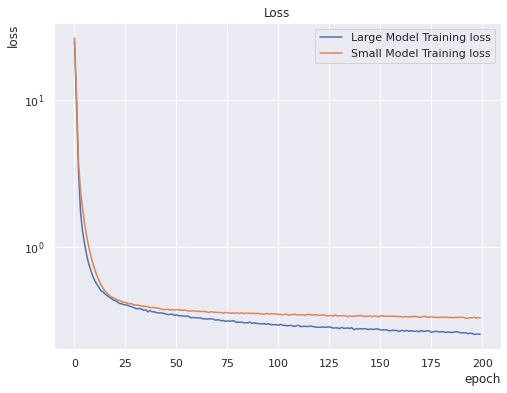

time: 517 ms (started: 2022-04-07 09:25:10 +00:00)


In [155]:
# Defining our function to see the evolution of training error:
plt.plot(hist_large['epoch'], hist_large['loss'], '-', label='Large Model Training loss')
plt.plot(hist_small['epoch'], hist_small['loss'], '-', label='Small Model Training loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')


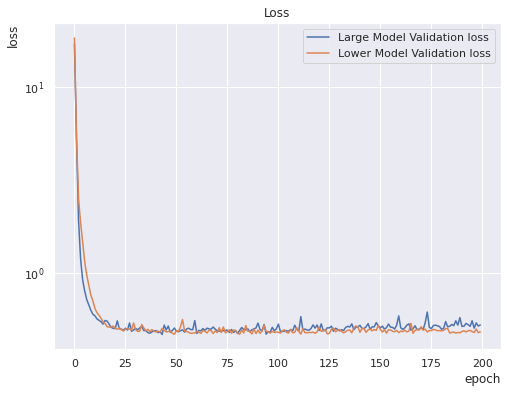

time: 1.07 s (started: 2022-04-07 09:25:10 +00:00)


In [156]:
# Defining our function to see the evolution of validation error:
plt.plot(hist_large['epoch'], hist_large['val_loss'], '-', label='Large Model Validation loss')
plt.plot(hist_small['epoch'], hist_small['val_loss'], '-', label='Lower Model Validation loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')

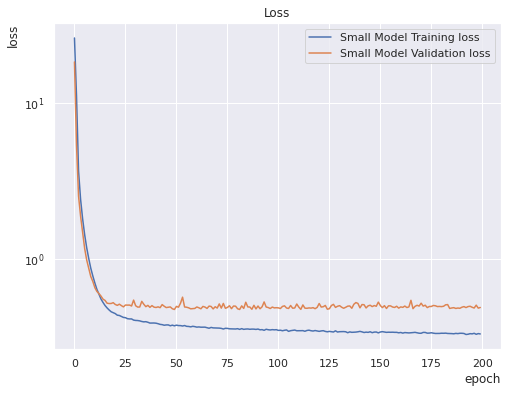

time: 544 ms (started: 2022-04-07 09:25:11 +00:00)


In [157]:
# Defining our function to see the evolution of validation error:
plt.plot(hist_small['epoch'], hist_small['loss'], '-', label='Small Model Training loss')
plt.plot(hist_small['epoch'], hist_small['val_loss'], '-', label='Small Model Validation loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')

Since smaller model, that is, 'Small' model with 3 layers in total, with 1 hidden layer has lower training as well as cv loss, we procede with this in the next and final optimisation steps. We will play around with optimisers and hyperparameters in the next step as well to improve the shape of the validation curve. But so far, the model is heading towards a good fit with the 11 features.

## **Testing Phase III: Model Regularization and Hyperparameter optimization**

Optimization Step 1: loss type

In [158]:
# Creating the model
# If you are going to use the same model multiple times, it is more practical to use a function to construct it.

def build_model():
  #Here we will use Sequential API
  model = Sequential()
  #Defining the first hidden layer:
  #Note that we are using input_shape for the first layer.
  model.add(layers.Dense(11, activation='relu', input_shape=(X_train_r.shape[1],)))
  #Defining the second hidden layer:
  model.add(layers.Dense(11, activation='relu'))
  #Here we are defining the output layer. A single unit and no activation (it will be a linear layer).
  #Since this is a regression problem, we need to to predict a single continuous value. 
  #Applying an activation function would constrain the range the output can take; 
  #for instance, if you applied a sigmoid activation function to the last layer,
  #the network could only learn to predict values between 0 and 1 (good for binary classification).
  model.add(layers.Dense(1))
  #we will compile the network with the MSE loss function.
  #(we will look at the square of the difference between the predictions and the targets).
  # We will also monitor another metric during the training, that is the mean absolute error(MAE).
  model.compile(optimizer='rmsprop', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
  return model

time: 10.5 ms (started: 2022-04-07 09:25:12 +00:00)


Using Mean Squared Error, Root Mean Sqaured Error and Mean Absolute Error as metrics for our model from here on out. 

In [159]:
#Looking into model structure:
build_model().summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 11)                132       
                                                                 
 dense_121 (Dense)           (None, 11)                132       
                                                                 
 dense_122 (Dense)           (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
time: 88.6 ms (started: 2022-04-07 09:25:12 +00:00)


In [160]:
model.save("best_model.h5")

time: 33.6 ms (started: 2022-04-07 09:25:12 +00:00)


In [161]:
# ML Algorithms to be used
import tensorflow as tf
from tensorflow import keras
from keras import optimizers, models, layers, regularizers
#Hyperparameters
num_epochs = 100
#The number of epochs determines the number of times the training occurs 
#over the entire dataset we pass into the neural network. 
batch_size = 10

time: 6.2 ms (started: 2022-04-07 09:25:12 +00:00)


In [162]:
#We will first create the object to feed fit() method:
myCheckpoint= keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

time: 1.59 ms (started: 2022-04-07 09:25:12 +00:00)


In [163]:
#Hyperparameters
num_epochs = 100
batch_size = 10

time: 1.49 ms (started: 2022-04-07 09:25:12 +00:00)


In [164]:
#Lists for storing scores
trainingScores = []
cvScores = []
myEarly_stopping = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#DataFrame is a 2-dimensional labeled data structure. You can think of it like a spreadsheet.
#Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame.
#It is  also known as Subset Selection.
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train_r.index,columns=[0,1])

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_r)),y_train_r.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_r, X_cv_fold_r = X_train_r.iloc[train_index,:], X_train_r.iloc[cv_index,:]
  y_train_fold_r, y_cv_fold_r = y_train_r.iloc[train_index], y_train_r.iloc[cv_index]

  #Fitting the model according to given data:
  #Into the fit method, we will pass in the input matrix X and the target y (labels).

  #Building the Keras model:
  model = build_model()

  #Training step: Trains the model in silent mode (verbose = 0)
  model_best = model.fit(X_train_fold_r, y_train_fold_r, epochs=num_epochs, batch_size=batch_size, validation_data=(X_cv_fold_r, y_cv_fold_r), callbacks=[myCheckpoint,myEarly_stopping], verbose=1)



Epoch 1/100
103/103 [==============================] - 1s 4ms/step - loss: 24.7771 - root_mean_squared_error: 4.9777 - mean_squared_error: 24.7771 - mean_absolute_error: 4.8293 - val_loss: 16.0205 - val_root_mean_squared_error: 4.0026 - val_mean_squared_error: 16.0205 - val_mean_absolute_error: 3.8487
Epoch 2/100
103/103 [==============================] - 0s 3ms/step - loss: 10.4584 - root_mean_squared_error: 3.2340 - mean_squared_error: 10.4584 - mean_absolute_error: 2.8968 - val_loss: 4.5749 - val_root_mean_squared_error: 2.1389 - val_mean_squared_error: 4.5749 - val_mean_absolute_error: 1.7506
Epoch 3/100
103/103 [==============================] - 0s 3ms/step - loss: 3.7334 - root_mean_squared_error: 1.9322 - mean_squared_error: 3.7334 - mean_absolute_error: 1.5590 - val_loss: 2.3380 - val_root_mean_squared_error: 1.5291 - val_mean_squared_error: 2.3380 - val_mean_absolute_error: 1.1592
Epoch 4/100
103/103 [==============================] - 0s 3ms/step - loss: 2.2687 - root_mean_squ

In [165]:
hist_best = pd.DataFrame(model_best.history)
h.sample(5)
hist_best['epoch'] = model_best.epoch

time: 5.8 ms (started: 2022-04-07 09:26:39 +00:00)


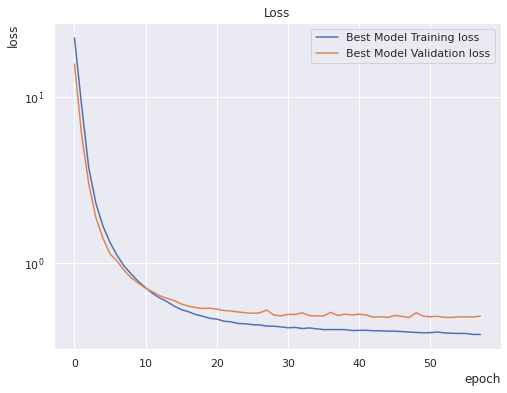

time: 3.37 s (started: 2022-04-07 09:26:39 +00:00)


In [166]:
# Defining our function to see the evolution of validation error:
plt.plot(hist_best['epoch'], hist_best['loss'], '-', label='Best Model Training loss')
plt.plot(hist_best['epoch'], hist_best['val_loss'], '-', label='Best Model Validation loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')

Overfitting is occuring here. Problem will be rectified in later steps. 

In [167]:
# Calling trained model for predictions:
Y_test_predictions = pd.Series(model.predict(X_test_r).flatten(),index=X_test_r.index)


time: 116 ms (started: 2022-04-07 09:26:43 +00:00)


Text(0, 0.5, 'Count')

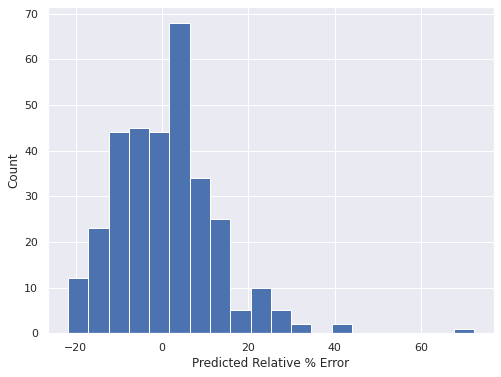

time: 344 ms (started: 2022-04-07 09:26:43 +00:00)


In [168]:
# Calculating the error variations:
error_nn = (Y_test_predictions - y_test_r)/y_test_r*100
plt.hist(error_nn, bins=20)
plt.xlabel('Predicted Relative % Error')
plt.ylabel('Count')

In [169]:
#Calculating the mean absolute percentage error:
abs_error_nn = abs(Y_test_predictions - y_test_r)/y_test_r*100
np.average(error_nn)

0.9776294064663705

time: 9.81 ms (started: 2022-04-07 09:26:43 +00:00)


## **Hyperparameter Tuning, Regularization and Optimisation**
For the finalisation of the model, we use a 3 layer sequential model with various optimisations undertaken. We work with 11 neurons as ascertained before. In the next steps, we shall take a look at the various optimisation steps: 

Iteration 1: Using mse as loss function, we add new metric, RMSE to MSE and MAE. All our layers at this layer contain 'relu' as activation function. The function's specs are:

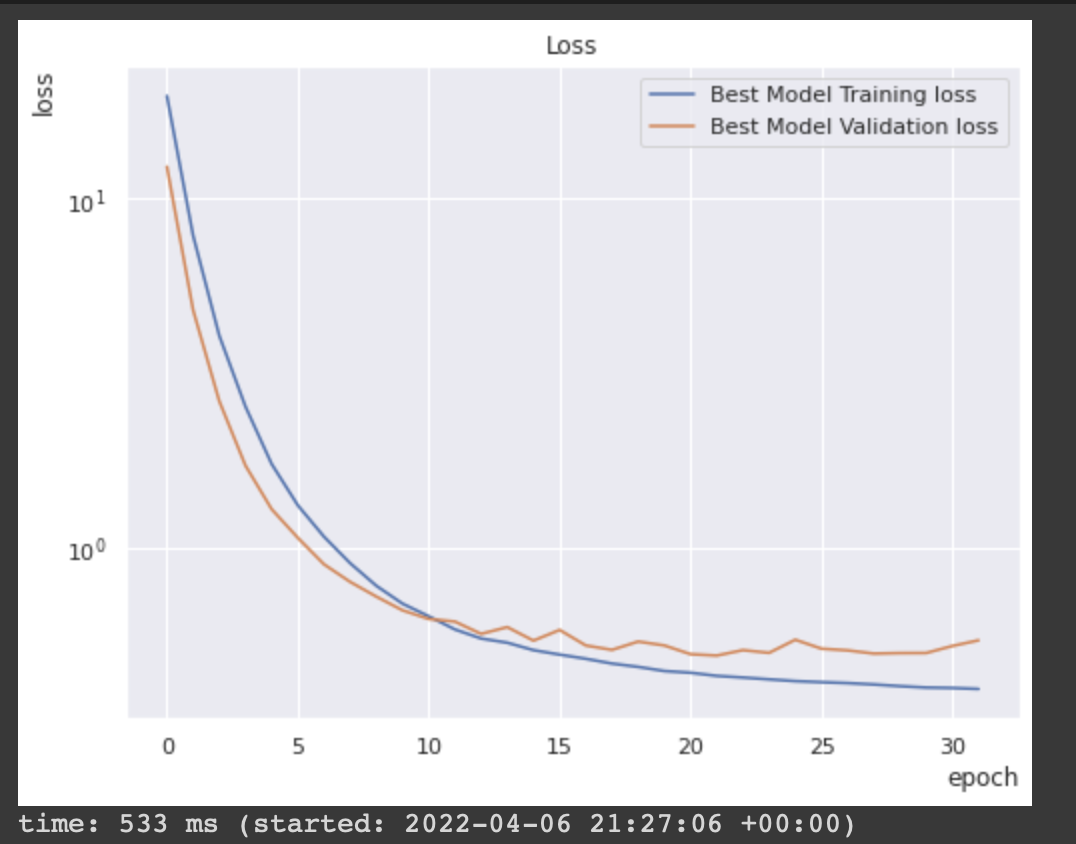

With early stopping at 103 epochs, 
training loss: 0.3499

training root_mean_squared_error: 0.5916

training mean_squared_error: 0.3499

training mean_absolute_error: 0.4459

validation loss: 0.4655

validation root_mean_squared_error: 0.6823 

validation mean_squared_error: 0.4655 

validation mean_absolute_error: 0.5392



## **Iteration 2: Using parameter in RMSprop to improve performace with learning_rate**

In [170]:
def build_model():
  #Here we will use Sequential API
  model = Sequential()
  #Defining the first hidden layer:
  #Note that we are using input_shape for the first layer.
  model.add(layers.Dense(11, activation='relu', input_shape=(X_train_r.shape[1],)))
  model.add(layers.Dense(11, activation='relu'))
  model.add(layers.Dense(1))
  learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
  opt = keras.optimizers.Adam(learning_rate=0.2)
  model.compile(optimizer=opt, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
  return model


time: 8.24 ms (started: 2022-04-07 09:26:43 +00:00)


In [171]:
#Looking into model structure:
build_model().summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 11)                132       
                                                                 
 dense_139 (Dense)           (None, 11)                132       
                                                                 
 dense_140 (Dense)           (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
time: 70.2 ms (started: 2022-04-07 09:26:43 +00:00)


In [172]:
#Lists for storing scores
trainingScores = []
cvScores = []
myEarly_stopping = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#DataFrame is a 2-dimensional labeled data structure. You can think of it like a spreadsheet.
#Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame.
#It is  also known as Subset Selection.
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train_r.index,columns=[0,1])

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_r)),y_train_r.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_r, X_cv_fold_r = X_train_r.iloc[train_index,:], X_train_r.iloc[cv_index,:]
  y_train_fold_r, y_cv_fold_r = y_train_r.iloc[train_index], y_train_r.iloc[cv_index]

  #Fitting the model according to given data:
  #Into the fit method, we will pass in the input matrix X and the target y (labels).

  #Building the Keras model:
  model = build_model()

  model_best = model.fit(X_train_fold_r, y_train_fold_r, epochs=200, batch_size=batch_size, validation_data=(X_cv_fold_r, y_cv_fold_r), callbacks=[myCheckpoint,myEarly_stopping], verbose=1)


Epoch 1/200
103/103 [==============================] - 1s 5ms/step - loss: 2.0424 - root_mean_squared_error: 1.4291 - mean_squared_error: 2.0424 - mean_absolute_error: 1.0066 - val_loss: 0.5484 - val_root_mean_squared_error: 0.7406 - val_mean_squared_error: 0.5484 - val_mean_absolute_error: 0.5517
Epoch 2/200
103/103 [==============================] - 0s 3ms/step - loss: 0.5293 - root_mean_squared_error: 0.7275 - mean_squared_error: 0.5293 - mean_absolute_error: 0.5577 - val_loss: 0.4662 - val_root_mean_squared_error: 0.6828 - val_mean_squared_error: 0.4662 - val_mean_absolute_error: 0.4902
Epoch 3/200
103/103 [==============================] - 0s 3ms/step - loss: 0.4995 - root_mean_squared_error: 0.7068 - mean_squared_error: 0.4995 - mean_absolute_error: 0.5567 - val_loss: 0.4800 - val_root_mean_squared_error: 0.6928 - val_mean_squared_error: 0.4800 - val_mean_absolute_error: 0.5502
Epoch 4/200
103/103 [==============================] - 0s 3ms/step - loss: 0.4746 - root_mean_squared_e

In [173]:
hist_best = pd.DataFrame(model_best.history)
h.sample(5)
hist_best['epoch'] = model_best.epoch

time: 6.1 ms (started: 2022-04-07 09:27:20 +00:00)


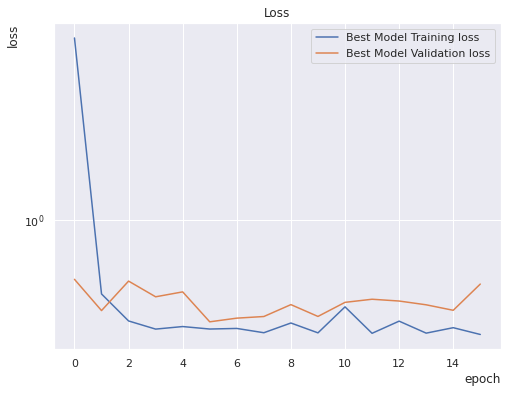

time: 665 ms (started: 2022-04-07 09:27:20 +00:00)


In [174]:
# Defining our function to see the evolution of validation error:
plt.plot(hist_best['epoch'], hist_best['loss'], '-', label='Best Model Training loss')
plt.plot(hist_best['epoch'], hist_best['val_loss'], '-', label='Best Model Validation loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')

learning rate = 0.001
loss: 0.3458 - root_mean_squared_error: 0.5881 - mean_squared_error: 0.3458 - mean_absolute_error: 0.4499 - val_loss: 0.4632 - val_root_mean_squared_error: 0.6806 - val_mean_squared_error: 0.4632 - val_mean_absolute_error: 0.5406

learning rate = 0.01
loss: 0.4244 - root_mean_squared_error: 0.6515 - mean_squared_error: 0.4244 - mean_absolute_error: 0.5005 - val_loss: 0.4806 - val_root_mean_squared_error: 0.6932 - val_mean_squared_error: 0.4806 - val_mean_absolute_error: 0.5435

learning rate = 0.1
loss: 0.4166 - root_mean_squared_error: 0.6455 - mean_squared_error: 0.4166 - mean_absolute_error: 0.4771 - val_loss: 0.5005 - val_root_mean_squared_error: 0.7074 - val_mean_squared_error: 0.5005 - val_mean_absolute_error: 0.5469

learning rate = 0.2
loss: 0.4541 - root_mean_squared_error: 0.6738 - mean_squared_error: 0.4541 - mean_absolute_error: 0.5113 - val_loss: 0.5980 - val_root_mean_squared_error: 0.7733 - val_mean_squared_error: 0.5980 - val_mean_absolute_error: 0.5743


learning rate = 0.3
loss: 0.5558 - root_mean_squared_error: 0.7455 - mean_squared_error: 0.5558 - mean_absolute_error: 0.5545 - val_loss: 0.5749 - val_root_mean_squared_error: 0.7582 - val_mean_squared_error: 0.5749 - val_mean_absolute_error: 0.5334



## Iteration 3: Optimization with regularizers

In [175]:
def build_model():
  #Here we will use Sequential API
  model = Sequential()
  #Defining the first hidden layer:
  #Note that we are using input_shape for the first layer.
  model.add(layers.Dense(11, activation='relu', kernel_regularizer=regularizers.l1_l2(0.2), input_shape=(X_train_r.shape[1],)))
  model.add(layers.Dense(11, activation='relu'))
  model.add(layers.Dense(1))
  learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
  opt = keras.optimizers.Adam(learning_rate=0.2)
  model.compile(optimizer=opt, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
  return model

time: 11.6 ms (started: 2022-04-07 09:27:21 +00:00)


In [176]:
#Looking into model structure:
build_model().summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 11)                132       
                                                                 
 dense_157 (Dense)           (None, 11)                132       
                                                                 
 dense_158 (Dense)           (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
time: 96.5 ms (started: 2022-04-07 09:27:21 +00:00)


In [177]:
#Lists for storing scores
trainingScores = []
cvScores = []
myEarly_stopping = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#DataFrame is a 2-dimensional labeled data structure. You can think of it like a spreadsheet.
#Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame.
#It is  also known as Subset Selection.
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train_r.index,columns=[0,1])

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_r)),y_train_r.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_r, X_cv_fold_r = X_train_r.iloc[train_index,:], X_train_r.iloc[cv_index,:]
  y_train_fold_r, y_cv_fold_r = y_train_r.iloc[train_index], y_train_r.iloc[cv_index]

  #Fitting the model according to given data:
  #Into the fit method, we will pass in the input matrix X and the target y (labels).

  #Building the Keras model:
  model = build_model()

  model_best = model.fit(X_train_fold_r, y_train_fold_r, epochs=200, batch_size=batch_size, validation_data=(X_cv_fold_r, y_cv_fold_r), callbacks=[myCheckpoint,myEarly_stopping], verbose=1)


Epoch 1/200
103/103 [==============================] - 2s 5ms/step - loss: 3.9791 - root_mean_squared_error: 1.3408 - mean_squared_error: 1.7978 - mean_absolute_error: 0.8899 - val_loss: 1.1232 - val_root_mean_squared_error: 0.6735 - val_mean_squared_error: 0.4536 - val_mean_absolute_error: 0.5401
Epoch 2/200
103/103 [==============================] - 0s 3ms/step - loss: 1.3529 - root_mean_squared_error: 0.7934 - mean_squared_error: 0.6295 - mean_absolute_error: 0.6212 - val_loss: 1.0668 - val_root_mean_squared_error: 0.6816 - val_mean_squared_error: 0.4646 - val_mean_absolute_error: 0.5698
Epoch 3/200
103/103 [==============================] - 0s 3ms/step - loss: 1.3590 - root_mean_squared_error: 0.7795 - mean_squared_error: 0.6077 - mean_absolute_error: 0.6123 - val_loss: 1.1667 - val_root_mean_squared_error: 0.7096 - val_mean_squared_error: 0.5035 - val_mean_absolute_error: 0.5811
Epoch 4/200
103/103 [==============================] - 0s 3ms/step - loss: 1.3313 - root_mean_squared_e

In [178]:
hist_best = pd.DataFrame(model_best.history)
h.sample(5)
hist_best['epoch'] = model_best.epoch

time: 4.37 ms (started: 2022-04-07 09:27:48 +00:00)


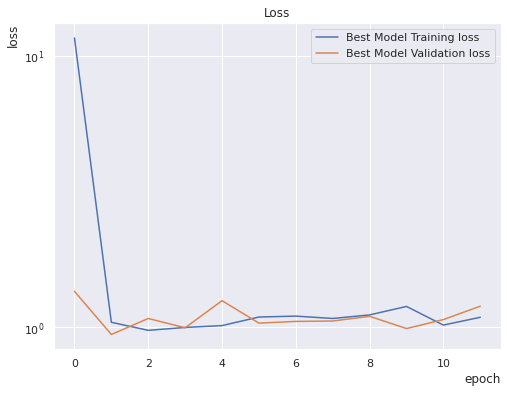

time: 1.69 s (started: 2022-04-07 09:27:48 +00:00)


In [179]:
# Defining our function to see the evolution of validation error:
plt.plot(hist_best['epoch'], hist_best['loss'], '-', label='Best Model Training loss')
plt.plot(hist_best['epoch'], hist_best['val_loss'], '-', label='Best Model Validation loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')

l1 regularizer - okey fit
oss: 1.6303 - root_mean_squared_error: 0.8097 - mean_squared_error: 0.6556 - mean_absolute_error: 0.6834 - val_loss: 1.6348 - val_root_mean_squared_error: 0.8224 - val_mean_squared_error: 0.6763 - val_mean_absolute_error: 0.6937

l2 regularizer - erratic fit
loss: 0.6755 - root_mean_squared_error: 0.8219 - mean_squared_error: 0.6755 - mean_absolute_error: 0.6824 - val_loss: 0.6754 - val_root_mean_squared_error: 0.8218 - val_mean_squared_error: 0.6754 - val_mean_absolute_error: 0.6618

l1_l2 regularizer - erratic fit

**But we go forward with regularizers.l1_l2 for relatively best fit. **

## Iteration 4: Using different activation functions

There are different acctivation functions available in Keras:
1. ReLU: Applies the rectified linear unit activation function.
2. LeakyReLU: Leaky version of a Rectified Linear Unit. It allows a small gradient when the unit is not active.
3. sigmoid: Applies the sigmoid activation function.
4. Softmax: Softmax converts a real vector to a vector of categorical probabilities. The elements of the output vector are in range (0, 1) and sum to 1.
5. softplus: softplus(x) = log(exp(x) + 1).
6. softsign: softsign(x) = x / (abs(x) + 1).
7. tanh: Hyperbolic tangent activation function.
8. exponential: Exponential activation function.
9. elu: The exponential linear unit (ELU) with alpha > 0 is:
x if x > 0 and alpha * (exp(x) - 1) if x < 0
The ELU hyperparameter alpha controls the value to which an ELU saturates for negative net inputs. ELUs diminish the vanishing gradient effect.
10. selu: Scaled Exponential Linear Unit (SELU) activation function;
if x > 0: return scale * x
if x < 0: return scale * alpha * (exp(x) - 1)
where alpha and scale are pre-defined constants (alpha=1.67326324 and scale=1.05070098).

In [180]:
activation = ['relu', 'LeakyReLU','softmax', 'softplus', 'softsign', 'selu', 'elu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

def build_model():
  #Here we will use Sequential API
  model = Sequential()
  model.add(layers.Dense(11, activation='exponential',  kernel_regularizer=regularizers.l1_l2(0.2), input_shape=(X_train_r.shape[1],)))
  model.add(layers.Dense(11, activation='relu'))
  model.add(layers.Dense(1, activation='linear'))
  opt = keras.optimizers.Adam(learning_rate=0.2)
  model.compile(optimizer=opt, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
  return model

time: 8.71 ms (started: 2022-04-07 09:27:50 +00:00)


In [181]:
#Looking into model structure:
build_model().summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_174 (Dense)           (None, 11)                132       
                                                                 
 dense_175 (Dense)           (None, 11)                132       
                                                                 
 dense_176 (Dense)           (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
time: 93.4 ms (started: 2022-04-07 09:27:50 +00:00)


In [182]:
#Lists for storing scores
trainingScores = []
cvScores = []
myEarly_stopping = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#DataFrame is a 2-dimensional labeled data structure. You can think of it like a spreadsheet.
#Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame.
#It is  also known as Subset Selection.
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train_r.index,columns=[0,1])

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_r)),y_train_r.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_r, X_cv_fold_r = X_train_r.iloc[train_index,:], X_train_r.iloc[cv_index,:]
  y_train_fold_r, y_cv_fold_r = y_train_r.iloc[train_index], y_train_r.iloc[cv_index]

  #Fitting the model according to given data:
  #Into the fit method, we will pass in the input matrix X and the target y (labels).

  #Building the Keras model:
  model = build_model()

  model_best = model.fit(X_train_fold_r, y_train_fold_r, epochs=200, batch_size=batch_size, validation_data=(X_cv_fold_r, y_cv_fold_r), callbacks=[myCheckpoint,myEarly_stopping], verbose=1)


Epoch 1/200
103/103 [==============================] - 1s 5ms/step - loss: 148518797312.0000 - root_mean_squared_error: 385381.3750 - mean_squared_error: 148518797312.0000 - mean_absolute_error: 13395.4971 - val_loss: 388121824.0000 - val_root_mean_squared_error: 19700.8047 - val_mean_squared_error: 388121728.0000 - val_mean_absolute_error: 1268.7528
Epoch 2/200
103/103 [==============================] - 0s 2ms/step - loss: 2056295.6250 - root_mean_squared_error: 1433.9646 - mean_squared_error: 2056254.5000 - mean_absolute_error: 122.9395 - val_loss: 24896.7969 - val_root_mean_squared_error: 157.6565 - val_mean_squared_error: 24855.5684 - val_mean_absolute_error: 27.8285
Epoch 3/200
103/103 [==============================] - 0s 3ms/step - loss: 866237.5000 - root_mean_squared_error: 930.6968 - mean_squared_error: 866196.4375 - mean_absolute_error: 78.6431 - val_loss: 16281.2852 - val_root_mean_squared_error: 127.4364 - val_mean_squared_error: 16240.0439 - val_mean_absolute_error: 24.84

In [183]:
hist_best = pd.DataFrame(model_best.history)
h.sample(5)
hist_best['epoch'] = model_best.epoch

time: 3.98 ms (started: 2022-04-07 09:29:05 +00:00)


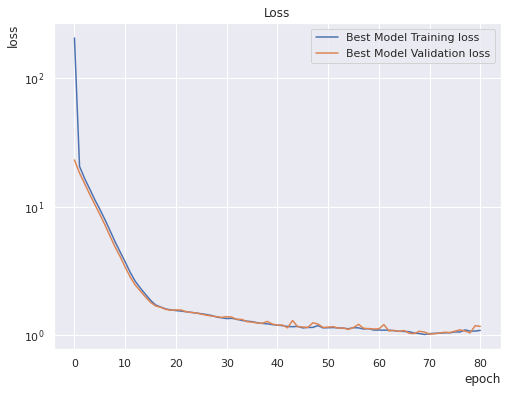

time: 16.4 s (started: 2022-04-07 09:29:05 +00:00)


In [184]:
# Defining our function to see the evolution of validation error:
plt.plot(hist_best['epoch'], hist_best['loss'], '-', label='Best Model Training loss')
plt.plot(hist_best['epoch'], hist_best['val_loss'], '-', label='Best Model Validation loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')

Layer 1: 
Leaky Relu - bad fit
softmax - bad fit
softplus - really bad fit
softsign - erratic fit
tanh - average fit, erratic
exponential - pretty good
elu - average, erratic fit
selu - decent fit
relu - decent fit
Layer 2: 
Leaky Relu - bad 
softmax - bad fit
softplus - really bad fit
softsign - erratic fit
tanh - bad fit, erratic
exponential - pretty good
elu - average, erratic fit
selu - decent fit
relu - decent fit
linear - good fit

**Best fit for 2 layer
layer 1 - exponential
layer 2 - relu**

Layer 3: 
Leaky Relu - really good 
softmax - good
softplus - really fit
softsign - bad fit
tanh - bad fit, erratic
exponential - nope
elu - average, erratic fit
selu - erratic, decent fit
relu - decent fit
linear - good fit
sigmoid -bad fit
hard_sigmoid - bad fit 
linear - average fit

## **Iteration 5: Restructure the layers with Dropout**

In [190]:
def build_model():
  #Here we will use Sequential API
  model = Sequential()
  model.add(layers.Dense(11, activation='exponential',  kernel_regularizer=regularizers.l1_l2(0.2), input_shape=(X_train_r.shape[1],)))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(11, activation='relu'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(1))
  opt = keras.optimizers.Adam(learning_rate=0.2)
  model.compile(optimizer=opt, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
  return model

time: 10.8 ms (started: 2022-04-07 09:31:57 +00:00)


In [191]:
#Looking into model structure:
build_model().summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 11)                132       
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 dense_211 (Dense)           (None, 11)                132       
                                                                 
 dropout_1 (Dropout)         (None, 11)                0         
                                                                 
 dense_212 (Dense)           (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
time: 79.5 ms (started: 2022-04-07 09:31:57 +00:00)


In [192]:
#Lists for storing scores
trainingScores = []
cvScores = []
myEarly_stopping = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#DataFrame is a 2-dimensional labeled data structure. You can think of it like a spreadsheet.
#Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame.
#It is  also known as Subset Selection.
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train_r.index,columns=[0,1])

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_r)),y_train_r.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_r, X_cv_fold_r = X_train_r.iloc[train_index,:], X_train_r.iloc[cv_index,:]
  y_train_fold_r, y_cv_fold_r = y_train_r.iloc[train_index], y_train_r.iloc[cv_index]

  #Fitting the model according to given data:
  #Into the fit method, we will pass in the input matrix X and the target y (labels).

  #Building the Keras model:
  model = build_model()

  model_best = model.fit(X_train_fold_r, y_train_fold_r, epochs=200, batch_size=batch_size, validation_data=(X_cv_fold_r, y_cv_fold_r), callbacks=[myCheckpoint,myEarly_stopping], verbose=1)
#model_best.save("best_model.h5")

Epoch 1/200
103/103 [==============================] - 1s 5ms/step - loss: 85716152.0000 - root_mean_squared_error: 9258.3008 - mean_squared_error: 85716136.0000 - mean_absolute_error: 291.8363 - val_loss: 41.9059 - val_root_mean_squared_error: 1.9883 - val_mean_squared_error: 3.9532 - val_mean_absolute_error: 1.8474
Epoch 2/200
103/103 [==============================] - 0s 3ms/step - loss: 47.1514 - root_mean_squared_error: 2.1312 - mean_squared_error: 4.5421 - mean_absolute_error: 1.9761 - val_loss: 47.4529 - val_root_mean_squared_error: 2.2105 - val_mean_squared_error: 4.8862 - val_mean_absolute_error: 2.0820
Epoch 3/200
103/103 [==============================] - 0s 3ms/step - loss: 46.5627 - root_mean_squared_error: 2.1366 - mean_squared_error: 4.5649 - mean_absolute_error: 1.9823 - val_loss: 46.2540 - val_root_mean_squared_error: 2.1893 - val_mean_squared_error: 4.7931 - val_mean_absolute_error: 2.0599
Epoch 4/200
103/103 [==============================] - 0s 2ms/step - loss: 45.4

In [193]:
hist_best = pd.DataFrame(model_best.history)
h.sample(5)
hist_best['epoch'] = model_best.epoch

time: 4.55 ms (started: 2022-04-07 09:35:24 +00:00)


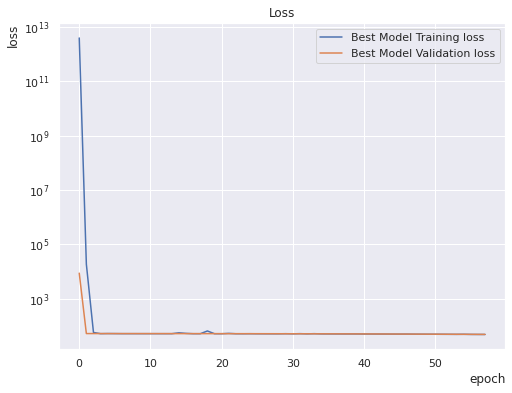

time: 19.8 s (started: 2022-04-07 09:35:24 +00:00)


In [194]:
# Defining our function to see the evolution of validation error:
plt.plot(hist_best['epoch'], hist_best['loss'], '-', label='Best Model Training loss')
plt.plot(hist_best['epoch'], hist_best['val_loss'], '-', label='Best Model Validation loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')

Dropout quantity influence on loss: 

0.1 - bad fit

0.2 - bad fit

0.4 - average, fluctuating fit

0.6 - average fit

0.8 - fluctuating fit

0.9 - bad fit

Dropout doesn't help at all. So we stick to the optimisations made so far. 

## **Iteration 6: Running loops to performance on different optimizers**
1. SGD
2. RMSprop
3. Adam
4. Adadelta
5. Adagrad
6. Adamax



In [185]:
def build_model():
  #Here we will use Sequential API
  model = Sequential()
  #Defining the first hidden layer:
  #Note that we are using input_shape for the first layer.
  model.add(layers.Dense(11, activation='exponential', kernel_regularizer=regularizers.l2(0.2), input_shape=(X_train_r.shape[1],)))
  model.add(layers.Dense(11, activation='relu'))
  model.add(layers.Dense(1))
  optimizer = ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad']
  opt = keras.optimizers.Adam(learning_rate=0.2)
  model.compile(optimizer=opt, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
  return model


time: 7.86 ms (started: 2022-04-07 09:29:21 +00:00)


In [186]:
#Looking into model structure:
build_model().summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_192 (Dense)           (None, 11)                132       
                                                                 
 dense_193 (Dense)           (None, 11)                132       
                                                                 
 dense_194 (Dense)           (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
time: 90.8 ms (started: 2022-04-07 09:29:21 +00:00)


In [187]:
#Lists for storing scores
trainingScores = []
cvScores = []
myEarly_stopping = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#DataFrame is a 2-dimensional labeled data structure. You can think of it like a spreadsheet.
#Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame.
#It is  also known as Subset Selection.
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train_r.index,columns=[0,1])

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_r)),y_train_r.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_r, X_cv_fold_r = X_train_r.iloc[train_index,:], X_train_r.iloc[cv_index,:]
  y_train_fold_r, y_cv_fold_r = y_train_r.iloc[train_index], y_train_r.iloc[cv_index]

  #Fitting the model according to given data:
  #Into the fit method, we will pass in the input matrix X and the target y (labels).

  #Building the Keras model:
  model = build_model()

  #Training step: Trains the model in silent mode (verbose = 0)
  model_best = model.fit(X_train_fold_r, y_train_fold_r, epochs=num_epochs, batch_size=batch_size, validation_data=(X_cv_fold_r, y_cv_fold_r), callbacks=[myCheckpoint,myEarly_stopping], verbose=1)


Epoch 1/100
103/103 [==============================] - 1s 4ms/step - loss: 306.5851 - root_mean_squared_error: 17.0558 - mean_squared_error: 290.9004 - mean_absolute_error: 3.4838 - val_loss: 15.9592 - val_root_mean_squared_error: 0.7604 - val_mean_squared_error: 0.5783 - val_mean_absolute_error: 0.6562
Epoch 2/100
103/103 [==============================] - 0s 3ms/step - loss: 14.6045 - root_mean_squared_error: 0.8200 - mean_squared_error: 0.6723 - mean_absolute_error: 0.6887 - val_loss: 13.4905 - val_root_mean_squared_error: 0.7699 - val_mean_squared_error: 0.5927 - val_mean_absolute_error: 0.6662
Epoch 3/100
103/103 [==============================] - 0s 3ms/step - loss: 12.9697 - root_mean_squared_error: 0.8183 - mean_squared_error: 0.6696 - mean_absolute_error: 0.6877 - val_loss: 12.3771 - val_root_mean_squared_error: 0.7701 - val_mean_squared_error: 0.5930 - val_mean_absolute_error: 0.6663
Epoch 4/100
103/103 [==============================] - 0s 3ms/step - loss: 12.0829 - root_mea

In [188]:
hist_best = pd.DataFrame(model_best.history)
h.sample(5)
hist_best['epoch'] = model_best.epoch

time: 4.5 ms (started: 2022-04-07 09:31:56 +00:00)


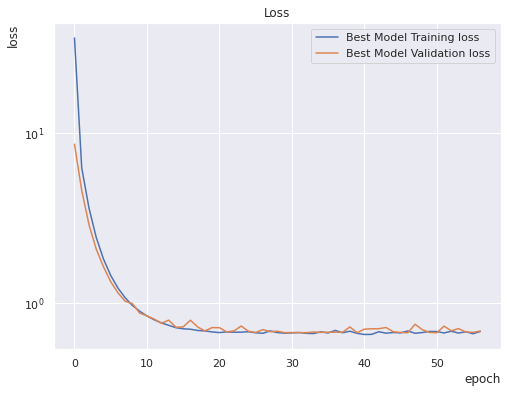

time: 500 ms (started: 2022-04-07 09:31:56 +00:00)


In [189]:
# Defining our function to see the evolution of validation error:
plt.plot(hist_best['epoch'], hist_best['loss'], '-', label='Best Model Training loss')
plt.plot(hist_best['epoch'], hist_best['val_loss'], '-', label='Best Model Validation loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')

For SGD - in 103 epochs
loss: 0.3738
root_mean_squared_error: 0.6114 
mean_squared_error: 0.3738
mean_absolute_error: 0.4679
val_loss: 0.4596 
val_root_mean_squared_error: 0.6780
val_mean_squared_error: 0.4596 
val_mean_absolute_error: 0.5431


---

For RMSprop - in 103 epochs
loss: 0.3826
root_mean_squared_error: 0.6186
mean_squared_error: 0.3826
mean_absolute_error: 0.4686
val_loss: 0.4582
val_root_mean_squared_error: 0.6769
val_mean_squared_error: 0.4582
val_mean_absolute_error: 0.5440


---

For Adam - in 103 epochs
loss: 0.3554
root_mean_squared_error: 0.5962
mean_squared_error: 0.3554
mean_absolute_error: 0.4516
val_loss: 0.5306
val_root_mean_squared_error: 0.7284
val_mean_squared_error: 0.5306
val_mean_absolute_error: 0.5703



---

For Adadelta - in 103 epochs
loss: 29.0690
root_mean_squared_error: 5.3916
mean_squared_error: 29.0690
mean_absolute_error: 5.3182
val_loss: 29.6041
val_root_mean_squared_error: 5.4410
val_mean_squared_error: 29.6041
val_mean_absolute_error: 5.3712





---
For Adagrad - in 103 epochs
loss: 5.6392
root_mean_squared_error: 2.3747
mean_squared_error: 5.6392
mean_absolute_error: 2.0481
val_loss: 5.8331
val_root_mean_squared_error: 2.4152
val_mean_squared_error: 5.8331
val_mean_absolute_error: 2.1740

We can clearly see that Adam fairs best as an optimizer.


## Iteration 7: Running final optimisations with kernel / weight initializers. 

In [384]:
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
def build_model():
  #Here we will use Sequential API
  model = Sequential()
  model.add(layers.Dense(11, activation='exponential', kernel_regularizer=regularizers.l2(0.2),  kernel_initializer= initializers.GlorotNormal(), input_shape=(X_train_r.shape[1],)))
  model.add(layers.Dense(11, activation='relu'))
  model.add(layers.Dense(1))
  optimizer = ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad']
  opt = keras.optimizers.Adam(learning_rate=0.2)
  model.compile(optimizer=opt, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
  return model
#[-limit, limit], where limit = sqrt(6 / (fan_in + fan_out)) (fan_in is the number of input units in the weight tensor and fan_out is the number of output units
# fan in = 11 fan out = 1 
#limit = sqrt(6 / (fan_in + fan_out)) = sqrt (6/12) = 0.7

time: 26 ms (started: 2022-04-07 11:37:26 +00:00)


In [385]:
#Looking into model structure:
build_model().summary()

Model: "sequential_144"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_447 (Dense)           (None, 11)                132       
                                                                 
 dense_448 (Dense)           (None, 11)                132       
                                                                 
 dense_449 (Dense)           (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
time: 213 ms (started: 2022-04-07 11:37:29 +00:00)


In [386]:
#Lists for storing scores
trainingScores = []
cvScores = []
myEarly_stopping = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#DataFrame is a 2-dimensional labeled data structure. You can think of it like a spreadsheet.
#Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame.
#It is  also known as Subset Selection.
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train_r.index,columns=[0,1])

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_r)),y_train_r.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. Data is divided as 902/225.
  X_train_fold_r, X_cv_fold_r = X_train_r.iloc[train_index,:], X_train_r.iloc[cv_index,:]
  y_train_fold_r, y_cv_fold_r = y_train_r.iloc[train_index], y_train_r.iloc[cv_index]

  #Fitting the model according to given data:
  #Into the fit method, we will pass in the input matrix X and the target y (labels).

  #Building the Keras model:
  model = build_model()
  model.save("best_model_final.h5")

  #Training step: Trains the model in silent mode (verbose = 0)
  model_best = model.fit(X_train_fold_r, y_train_fold_r, epochs=num_epochs, batch_size=batch_size, validation_data=(X_cv_fold_r, y_cv_fold_r), callbacks=[myCheckpoint,myEarly_stopping], verbose=1)


Epoch 1/100
103/103 [==============================] - 2s 7ms/step - loss: 19315972096.0000 - root_mean_squared_error: 138981.9062 - mean_squared_error: 19315972096.0000 - mean_absolute_error: 4353.8052 - val_loss: 55.5837 - val_root_mean_squared_error: 2.5519 - val_mean_squared_error: 6.5120 - val_mean_absolute_error: 2.4365
Epoch 2/100
103/103 [==============================] - 0s 4ms/step - loss: 56.0539 - root_mean_squared_error: 2.6558 - mean_squared_error: 7.0532 - mean_absolute_error: 2.5290 - val_loss: 55.4830 - val_root_mean_squared_error: 2.5501 - val_mean_squared_error: 6.5032 - val_mean_absolute_error: 2.4347
Epoch 3/100
103/103 [==============================] - 0s 4ms/step - loss: 56.0235 - root_mean_squared_error: 2.6541 - mean_squared_error: 7.0442 - mean_absolute_error: 2.5272 - val_loss: 55.4726 - val_root_mean_squared_error: 2.5482 - val_mean_squared_error: 6.4935 - val_mean_absolute_error: 2.4327
Epoch 4/100
103/103 [==============================] - 0s 4ms/step - l

In [387]:
hist_best = pd.DataFrame(model_best.history)
h.sample(5)
hist_best['epoch'] = model_best.epoch

time: 5.45 ms (started: 2022-04-07 11:40:03 +00:00)


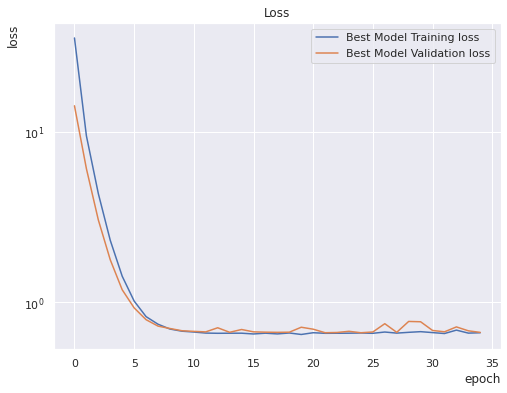

time: 536 ms (started: 2022-04-07 11:40:03 +00:00)


In [388]:
# Defining our function to see the evolution of validation error:
plt.plot(hist_best['epoch'], hist_best['loss'], '-', label='Best Model Training loss')
plt.plot(hist_best['epoch'], hist_best['val_loss'], '-', label='Best Model Validation loss')
plt.title('Loss')
plt.legend(loc=0)
plt.xlabel('epoch', horizontalalignment='right', x=1.0)
plt.ylabel('loss', horizontalalignment='right', y=1.0)
plt.yscale('log')

RandomNormal - Initializer that generates tensors with a normal distribution.
**not great fit**
RandomUniform - Initializer that generates tensors with a uniform distribution.
**good but erratic fit**
TruncatedNormal - Initializer that generates a truncated normal distribution.
Zeros - Initializer that generates tensors initialized to 0.
**not great fit**
Ones - Initializer that generates tensors initialized to 1.
**no fit**
GlorotNormal - Draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor.
**great fit**
GlorotUniform - Draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / (fan_in + fan_out)) (fan_in is the number of input units in the weight tensor and fan_out is the number of output units).
**not great fit**
HeNormal - It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.
**not great fit**
HeUniform - Draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / fan_in) (fan_in is the number of input units in the weight tensor).
**average fit**


**So, we go ahead with Glorot Normal as weight initializer.**

## Final Thoughts and Conclusion

In [389]:
#Calling back the best model:
model = keras.models.load_model("best_model_final.h5")

time: 55.6 ms (started: 2022-04-07 11:40:04 +00:00)


In [390]:
# Calling trained model for predictions:
Y_test_predictions = pd.Series(model.predict(X_test_r).flatten(),index=X_test_r.index)

time: 111 ms (started: 2022-04-07 11:40:04 +00:00)


Text(0, 0.5, 'Count')

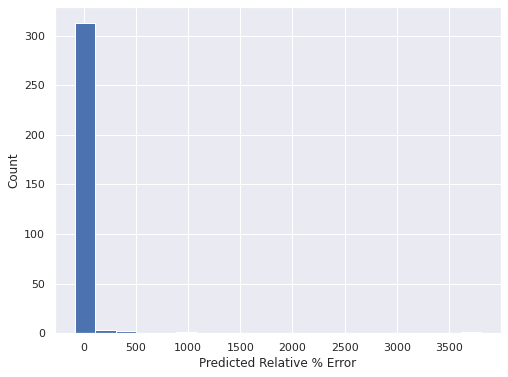

time: 377 ms (started: 2022-04-07 11:40:04 +00:00)


In [391]:
# Calculating the error variations:
error_nn = (Y_test_predictions - y_test_r)/y_test_r*100
plt.hist(error_nn, bins=20)
plt.xlabel('Predicted Relative % Error')
plt.ylabel('Count')

In [392]:
#Calculating the mean absolute percentage error:
abs_error_nn = abs(Y_test_predictions - y_test_r)/y_test_r*100
np.average(error_nn)

-21.29296171004396

time: 7.32 ms (started: 2022-04-07 11:40:04 +00:00)


In [393]:
from sklearn.metrics import mean_squared_error
#Calculating the MSE for the predictions
print(np.sqrt(mean_squared_error(y_test_r,Y_test_predictions)))

13.694768598579786
time: 2.05 ms (started: 2022-04-07 11:40:04 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


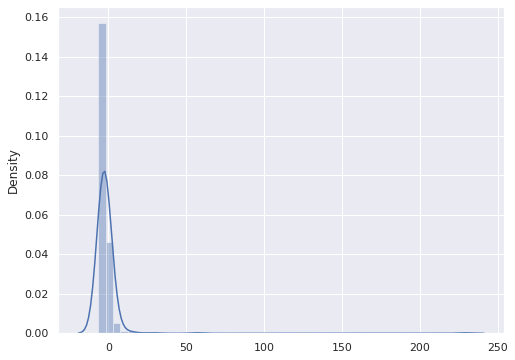

time: 461 ms (started: 2022-04-07 11:40:04 +00:00)


In [394]:
sns.distplot(Y_test_predictions - y_test_r)

Taking a deeper look into the predictive model based on variables / features with highest correlation and using statistical models to estimate a simple relationship between two noisy sets of observations of the red wine dataset. White wine datasets observations will be analogous. 

We take a look at the coefficients of the features in the red wine dataset once again to set ground rules at the observation and prediction analysis later. 


                        **Coefficient**
                        
fixed acidity            0.035152

volatile acidity        -0.170422

citric acid             -0.029168

residual sugar           0.002002

chlorides               -0.096649

free sulfur dioxide      0.060625

total sulfur dioxide    -0.121289

density                 -0.013793

pH                      -0.060345

sulphates                0.134217

alcohol                  0.307571

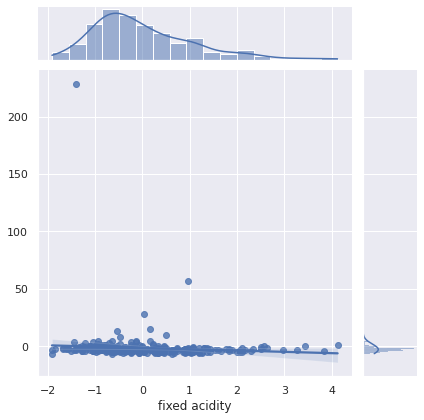

time: 1.82 s (started: 2022-04-07 11:40:05 +00:00)


In [395]:
sns.jointplot(y=Y_test_predictions - y_test_r , x=X_test_r['fixed acidity'], data=Y_test_predictions - y_test_r, kind="reg")

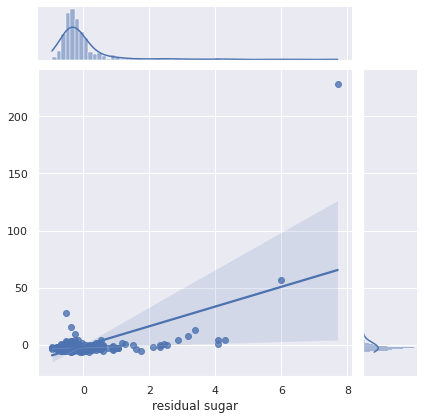

time: 2.68 s (started: 2022-04-07 11:40:07 +00:00)


In [396]:
sns.jointplot(y=Y_test_predictions - y_test_r , x=X_test_r['residual sugar'], data=Y_test_predictions - y_test_r, kind="reg")

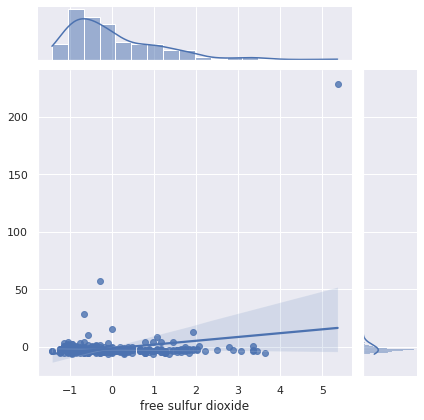

time: 1.84 s (started: 2022-04-07 11:40:09 +00:00)


In [397]:
sns.jointplot(y=Y_test_predictions - y_test_r , x=X_test_r['free sulfur dioxide'], data=Y_test_predictions - y_test_r, kind="reg")

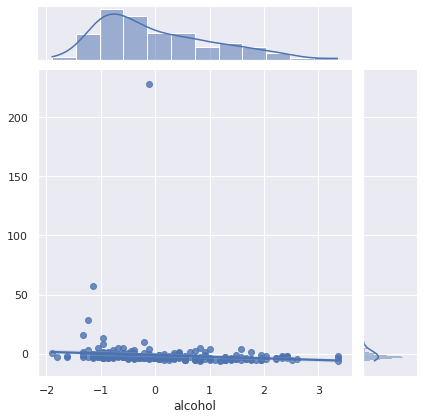

time: 1.82 s (started: 2022-04-07 11:40:11 +00:00)


In [398]:
sns.jointplot(y=Y_test_predictions - y_test_r , x=X_test_r['alcohol'], data=Y_test_predictions - y_test_r, kind="reg")

**Insights and Analysis Breakdown**

So we started our analysis with processing 
